In [11]:
import torch

# CUDAが使えるかどうかを確認
cuda_available = torch.cuda.is_available()

if cuda_available:
    print(f"CUDA is available! GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")
     

CUDA is available! GPU: NVIDIA GeForce RTX 3080 Ti Laptop GPU


In [2]:
import torch
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"CUDA Device Count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"Current CUDA Device: {torch.cuda.current_device()}")
    print(f"Device Name: {torch.cuda.get_device_name()}")

PyTorch Version: 2.4.1+cu124
CUDA Available: True
CUDA Device Count: 1
Current CUDA Device: 0
Device Name: Quadro RTX 5000


# **1枚画像**

In [ ]:
from ultralytics import RTDETR
from ultralytics import YOLO
import wget
import cv2
import matplotlib.pyplot as plt

# モデルが未定義ならロードする
model = YOLO(r"C:\Users\CorneAI\FacePhoto_instance\models\1-295best_1000epochs_yolo11multi.pt")
#model = RTDETR(r"C:\Users\CorneAI\FacePhoto_instance\models\1-295_538epochs_rtdetr-l.pt")


# try:
#     model  # 変数modelが定義されているか確認
# except NameError:
#     print("modelが未定義のため、ロードを実行します。")
#     #model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")
#     model = YOLO(r"C:\Users\ykita\FacePhoto_instance\runs\detect\train9\weights\best.pt")


# 推論を実行: YOLOの推論
image_path = r'C:\Users\CorneAI\FacePhoto_instance\data\images\valid\1-20150121-38-142903_6e60b2355e174936406b708cf171e424300de779d4b8ae8e3aebb1a9de9905e6.jpg'
results = model(image_path, save=False)

for r in results:
    boxes = r.boxes  # YOLOv8の場合

    # YOLO形式出力
    for box in boxes:
        cls_id = int(box.cls[0])  # クラスID
        x_center, y_center, width, height = box.xywhn[0]

        # YOLO形式: class x_center y_center width height
        # 小数点以下6桁で出力したい場合
        print(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    #検出結果を画像に描画して表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # 結果の保存
    #cv2.imwrite('result.jpg', r.plot())


0: 640x640 (no detections), 90.9ms
Speed: 0.0ms preprocess, 90.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


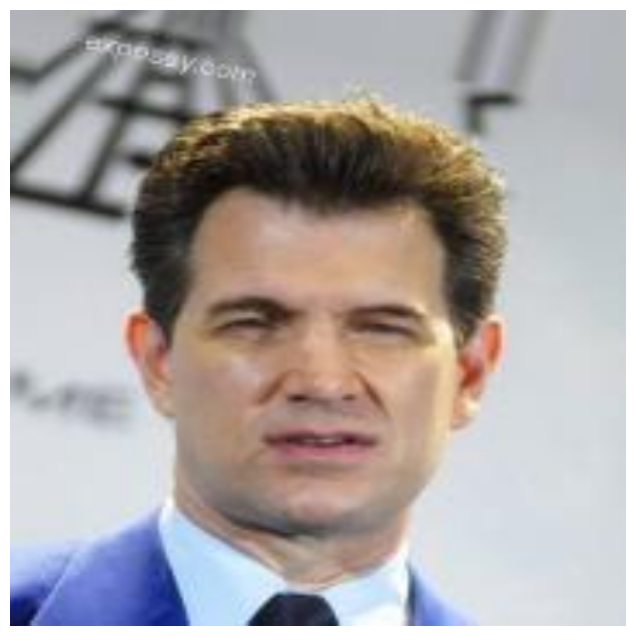

In [10]:
from ultralytics import RTDETR
import cv2
import matplotlib.pyplot as plt

# モデルのロード
model = RTDETR(r"C:\Users\CorneAI\FacePhoto_instance\models\1-295_538epochs_rtdetr-l.pt")

# 画像の読み込みとリサイズ
image_path = r'C:\Users\CorneAI\FacePhoto_instance\Cereba\000015.jpg'
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (640, 640))  # 640x640にリサイズ

# リサイズした画像で推論を実行
results = model(resized_image, save=False)

for r in results:
    boxes = r.boxes
    # YOLO形式出力
    for box in boxes:
        cls_id = int(box.cls[0])
        x_center, y_center, width, height = box.xywhn[0]
        print(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
    
    # 検出結果を画像に描画して表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [2]:
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import os

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model_path = r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt"
    model = RTDETR(model_path)

# 推論を実行
image_path = r'C:\Users\ykita\FacePhoto_instance\201-295\Image\293-20200311-6-095803_287b73c1d0b04ca725de2651547efd9a530231320625fb361bef3708dc3df9ee.jpg'
results = model(image_path, save=False)

# 保存先のテキストファイルパスを指定
save_txt_path = r'C:\Users\ykita\FacePhoto_instance\result_yolo.txt'

# YOLO形式の推論結果をテキストファイルに書き込み
with open(save_txt_path, 'w') as f:
    for r in results:
        boxes = r.boxes  # YOLOv8系の出力
        for box in boxes:
            cls_id = int(box.cls[0])  
            x_center, y_center, width, height = box.xywhn[0]
            # YOLO形式: class x_center y_center width height （小数点以下6桁）
            line = f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
            f.write(line)

print(f"YOLO形式の推論結果をテキストファイルに保存しました: {save_txt_path}")



image 1/1 C:\Users\ykita\FacePhoto_instance\201-295\Image\293-20200311-6-095803_287b73c1d0b04ca725de2651547efd9a530231320625fb361bef3708dc3df9ee.jpg: 640x640 1 Right_eye, 1 Left_eye, 879.9ms
Speed: 7.0ms preprocess, 879.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
YOLO形式の推論結果をテキストファイルに保存しました: C:\Users\ykita\FacePhoto_instance\result_yolo.txt


# **複数画像**

階層構造
```
archive.zip/
   ├── data.yaml  # configuration file
   ├── train.txt  # list of train subset image paths
   │
   ├── images/
   │   ├── train/  # directory with images for train subset
   │   │    ├── image1.jpg
   │   │    ├── image2.jpg
   │   │    ├── image3.jpg
   │   │    └── ...
   ├── labels/
   │   ├── train/  # directory with annotations for train subset
   │   │    ├── image1.txt
   │   │    ├── image2.txt
   │   │    ├── image3.txt
   │   │    └── ...

```

***.txt (ラベル)
```
0 0.260745 0.535950 0.218015 0.030600
1 0.760795 0.533850 0.213035 0.043800
```

daya.yaml
```
names:
  0: Right_eye
  1: Left_eye
path: .
train: train.txt
```

train.txt
```
data/images/train/***.jpg
data/images/train/***.jpg
...(pathの羅列。拡張子を合わせる)
```
※ラベルや画像と対応を合わせること



In [ ]:
import os
import glob
import shutil
from tqdm import tqdm
from ultralytics import RTDETR
from ultralytics import YOLO

def create_yolo_dataset(orig_image_dir, output_dir, model_path):
    """
    YOLOデータセットの構造を作成する
    
    Args:
        orig_image_dir: 元の画像が存在するディレクトリ
        output_dir: 出力先のディレクトリ
        model_path: RTDETRモデルのパス
    """
    # 進捗バーの設定
    progress = tqdm(
        total=4,  
        desc="データセット作成",
        bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]'
    )

    # 必要なディレクトリを作成
    os.makedirs(os.path.join(output_dir, "labels", "train"), exist_ok=True)
    progress.update(1)
    
    # data.yamlの作成
    yaml_content = """names:
  0: Right_eye
  1: Left_eye
path: .
train: train.txt"""
    
    with open(os.path.join(output_dir, "data.yaml"), 'w', encoding='utf-8') as f:
        f.write(yaml_content)
    progress.update(1)
    
    # モデルのロード
    try:
        model = YOLO(model_path)
    except Exception as e:
        print(f"モデルのロードに失敗: {e}")
        return
    
    # 画像ファイルのリストを取得
    image_files = []
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.tif', '*.tiff']
    
    for ext in extensions:
        image_files.extend(glob.glob(os.path.join(orig_image_dir, ext)))
    total_files = len(image_files)
    print(f"\n合計 {total_files} 個のファイルが見つかりました")
    
    # 推論とラベル生成の進捗バー
    inference_progress = tqdm(
        total=total_files,
        desc="推論とラベル生成",
        bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]'
    )
    
    # train.txtの作成とラベルファイルの生成
    with open(os.path.join(output_dir, "train.txt"), 'w', encoding='utf-8') as f:
        for image_path in image_files:
            # 元の拡張子を保持
            basename = os.path.basename(image_path)
            name_without_ext = os.path.splitext(basename)[0]
            
            # 推論を実行
            results = model(image_path, save=False)
            
            # ラベルファイルのパス（train/配下に.txt）
            label_path = os.path.join(output_dir, "labels", "train", f"{name_without_ext}.txt")
            
            # YOLO形式の推論結果をテキストファイルに書き込み
            with open(label_path, 'w', encoding='utf-8') as lf:
                for r in results:
                    boxes = r.boxes
                    for box in boxes:
                        cls_id = int(box.cls[0])
                        x_center, y_center, width, height = box.xywhn[0]
                        line = f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
                        lf.write(line)
            
            # train.txtにYOLOフォーマットのパスを書き込み
            yolo_path = f"data/images/train/{basename}"
            f.write(f"{yolo_path}\n")
            inference_progress.update(1)
    
    inference_progress.close()
    progress.update(1)
    
    # ZIP圧縮
    print("\nZIP圧縮を開始します...")
    zip_path = output_dir + ".zip"
    total = sum(len(files) for _, _, files in os.walk(output_dir))
    
    with tqdm(total=total, desc="ZIP圧縮", bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]') as pbar:
        for root, _, files in os.walk(output_dir):
            for file in files:
                pbar.update(1)
        shutil.make_archive(os.path.splitext(zip_path)[0], 'zip', output_dir)
    
    progress.update(1)
    progress.close()
    print(f"\nフォルダを {zip_path} に圧縮しました。")

# 使用例
if __name__ == "__main__":
    orig_image_dir = r"C:\Users\CorneAI\FacePhoto_instance\Cereba-hq_1-9655"
    output_dir = r"C:\Users\CorneAI\FacePhoto_instance\inference\Cereba-hq_1-9655\archive"
    model_path = r"C:\Users\CorneAI\FacePhoto_instance\models\1-295best_1000epochs_yolo11multi.pt"
    
    create_yolo_dataset(orig_image_dir, output_dir, model_path)

In [18]:
import os
import glob
from ultralytics import RTDETR
from tqdm import tqdm  # tqdmライブラリをインポート

# 1) 画像のフォルダを指定する
orig_image_dir = r"C:\Users\ykita\FacePhoto_instance\inference\201-295\image"
# 2) 出力先のフォルダを指定する。フォルダがなければ作成する
dst_parent_dir= r"C:\Users\ykita\FacePhoto_instance\inference\201-295\archive" #####
dst_label_dir = os.path.join(dst_parent_dir, "labels", "train")
os.makedirs(dst_label_dir, exist_ok=True)

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model_path = r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt"
    model = RTDETR(model_path)

# 処理対象とする画像の拡張子
image_extensions = [
    '.jpg', '.jpeg', '.JPG', '.JPEG',
    '.png', '.PNG',
    '.tif', '.tiff', '.TIF', '.TIFF'
]

# 指定フォルダ配下の該当画像ファイルをすべて取得
image_files = []
for ext in image_extensions:
    image_files.extend(glob.glob(os.path.join(orig_image_dir, f'*{ext}')))

# tqdmで進捗状況を表示しながらループ
for image_path in tqdm(image_files, desc='推論中', unit='枚'):
    # 推論を実行
    results = model(image_path, save=False)

    # 画像と同じファイル名（拡張子を除く）でテキストファイル出力
    basename = os.path.splitext(os.path.basename(image_path))[0]
    save_txt_path = os.path.join(dst_label_dir, f"{basename}.txt")

    # YOLO形式の推論結果をテキストファイルに書き込み
    with open(save_txt_path, 'w', encoding='utf-8') as f:
        for r in results:
            boxes = r.boxes  # YOLOv8系の出力
            for box in boxes:
                cls_id = int(box.cls[0])
                x_center, y_center, width, height = box.xywhn[0]
                # YOLO形式: class x_center y_center width height（小数点以下6桁）
                line = f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
                f.write(line)

print("すべての画像に対する推論が完了し、YOLO形式でラベルを出力しました。")


推論中:   0%|          | 0/1390 [00:00<?, ?枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_024df9c564e854ac63c356338fae68d7e8ebd20fafde2856d07f854576d25bec.JPG: 640x640 1 Right_eye, 1 Left_eye, 1269.3ms
Speed: 42.0ms preprocess, 1269.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


推論中:   0%|          | 1/1390 [00:01<32:57,  1.42s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_11ecdb1214665a16b19b0289b20c71d2c5a5a325f974312963bd044ddd10932f.JPG: 640x640 1 Right_eye, 1 Left_eye, 784.6ms
Speed: 7.1ms preprocess, 784.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   0%|          | 2/1390 [00:02<24:56,  1.08s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_50a5a27bf14844c0973f0c274e935b2766ef37d438492d264e490a1e2dcaf11b.JPG: 640x640 1 Right_eye, 1 Left_eye, 758.5ms
Speed: 7.1ms preprocess, 758.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   0%|          | 3/1390 [00:03<22:05,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_5775015e20cdb44f407ce9d908414403051f7b938d0f5ad519811a243418f9df.JPG: 640x640 1 Right_eye, 1 Left_eye, 749.5ms
Speed: 7.7ms preprocess, 749.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   0%|          | 4/1390 [00:03<20:50,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_7a191e64370164f70f9a201e7392ea3630707c93f7cbc5b724279b7f1811136b.JPG: 640x640 1 Right_eye, 1 Left_eye, 756.5ms
Speed: 10.1ms preprocess, 756.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   0%|          | 5/1390 [00:04<20:03,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_9f5db5050c8e588fd55bb35d4b116533f3c157f6eeb9369a51e3b004ffc96f00.JPG: 640x640 2 Left_eyes, 744.4ms
Speed: 7.6ms preprocess, 744.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   0%|          | 6/1390 [00:05<19:27,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_aad77ff1d9e3857a248a9e77b19c567776cd17c1605eb41bde3391ff46733fbe.JPG: 640x640 1 Right_eye, 1 Left_eye, 757.3ms
Speed: 6.1ms preprocess, 757.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 7/1390 [00:06<19:13,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_ae7df7fa888a812f77940366dc0ee3ca7960eedd8e09f05e7e7db1a1a8edbf87.JPG: 640x640 1 Right_eye, 1 Left_eye, 751.3ms
Speed: 5.6ms preprocess, 751.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 8/1390 [00:07<18:57,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_afcc6f5ceeb58e835c5c8b0eaad7e2dc831d84416bdb548db95b9df00761b4c6.JPG: 640x640 1 Right_eye, 1 Left_eye, 751.6ms
Speed: 8.6ms preprocess, 751.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 9/1390 [00:07<18:50,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20080129-9-113451_cd22e2f6687375e46aaa926d7c2df4ec20e829d4728ba0bbbb81b62e28e3145c.JPG: 640x640 1 Right_eye, 1 Left_eye, 816.9ms
Speed: 8.2ms preprocess, 816.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 10/1390 [00:08<19:11,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\202-20110908-67-000000_3474eb6af187c2eb6e67a075c6ca7d8582e3053d9aadd0bcffa191d07cd14e8e.jpg: 640x640 2 Right_eyes, 1023.0ms
Speed: 8.3ms preprocess, 1023.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 11/1390 [00:09<20:49,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\202-20110916-67-000000_607d107cfc96d9137aa5fdf3960a8046d746e90323bf22c97d24b73ca24e76d6.jpg: 640x640 1 Right_eye, 1 Left_eye, 959.5ms
Speed: 10.6ms preprocess, 959.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 12/1390 [00:11<22:35,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\203-20181114-1-104445_3ac43ba46182948796e96015d2ba3afb3a5651b05a6ab7d571079ebcd4ad370b.jpg: 640x640 1 Right_eye, 1 Left_eye, 1037.5ms
Speed: 14.2ms preprocess, 1037.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 13/1390 [00:12<24:30,  1.07s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120823-59-095005_bb9680608ade3628a781b349770762db12e3d707e110fb640e4d4e9b182e8f5e.jpg: 640x640 1 Right_eye, 1 Left_eye, 983.4ms
Speed: 6.0ms preprocess, 983.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 14/1390 [00:13<25:27,  1.11s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_1445850d9e02c3c7c3578477d71043e854e041c9f676b1ee94c45ac934d3d23c.jpg: 640x640 1 Right_eye, 1 Left_eye, 969.7ms
Speed: 7.5ms preprocess, 969.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 15/1390 [00:14<26:04,  1.14s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_1ede8a659af9b5c4cbf930f0ac282d86f088781ed471d444fe8e995c7a71d721.jpg: 640x640 2 Left_eyes, 931.1ms
Speed: 12.0ms preprocess, 931.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 16/1390 [00:15<26:03,  1.14s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_429511617d3fbe993694a39a01d0e090fbb22290467d4d2e2389076111a9b478.jpg: 640x640 1 Right_eye, 1 Left_eye, 922.3ms
Speed: 7.1ms preprocess, 922.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|          | 17/1390 [00:16<25:53,  1.13s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_5110b4f5b339b0463da88b97be1cc28aae981c4d2ae17007035899d1fc9fac4a.jpg: 640x640 1 Right_eye, 1 Left_eye, 973.2ms
Speed: 9.6ms preprocess, 973.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|▏         | 18/1390 [00:18<26:20,  1.15s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_5417d937e94e2aa1c252d9a4f9fe38604d6551499f3ea0e60aaddb80cb001082.jpg: 640x640 1 Right_eye, 1 Left_eye, 820.3ms
Speed: 11.5ms preprocess, 820.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|▏         | 19/1390 [00:19<25:32,  1.12s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_556a54779616eae2bd980c59cde8c3c3fdcdd5ce25b9ae6b7652d77ee00bfe64.jpg: 640x640 1 Right_eye, 1 Left_eye, 934.4ms
Speed: 11.3ms preprocess, 934.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   1%|▏         | 20/1390 [00:20<25:38,  1.12s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_7436be9ffad3f6a18d9da24376a47fd0755336c42b0ac3f88cab90be9d568e6b.jpg: 640x640 1 Right_eye, 1 Left_eye, 943.2ms
Speed: 7.6ms preprocess, 943.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 21/1390 [00:21<26:24,  1.16s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_9467370d31b329335821e21ae141bf56ab560f0744c3ab18a593b5767906dc12.jpg: 640x640 2 Right_eyes, 1 Left_eye, 785.6ms
Speed: 7.1ms preprocess, 785.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 22/1390 [00:22<25:15,  1.11s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_b2faa4af78651e56eede786e0565a7f105a7e8406c42997cf5d3c45cbe6f5773.jpg: 640x640 1 Right_eye, 1 Left_eye, 763.7ms
Speed: 8.1ms preprocess, 763.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 23/1390 [00:23<24:22,  1.07s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_e1ed45c495418b43857bac1bf6d3c731676534823cdd31ecc22aa18932c59669.jpg: 640x640 1 Right_eye, 1 Left_eye, 774.2ms
Speed: 7.5ms preprocess, 774.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 24/1390 [00:24<23:45,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20121018-59-113652_ad00884a9ea863eb2ad97b1c81ba5fb7e17956f23e46d761c4e990c731258dae.jpg: 640x640 1 Right_eye, 1 Left_eye, 781.5ms
Speed: 6.1ms preprocess, 781.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 25/1390 [00:25<23:19,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\205-20130717-0-102938_98fc798e352707c2183d114c754ebb9001ccd45d06057484b41d1839fd99ad77.jpg: 640x640 1 Right_eye, 1 Left_eye, 778.7ms
Speed: 7.1ms preprocess, 778.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 26/1390 [00:26<22:15,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170222-41-104248_6a8bf220ed15b183685305d20bdb79f4a12a8516daaf9210df3e784052ae56f6.jpg: 640x640 2 Left_eyes, 979.1ms
Speed: 12.3ms preprocess, 979.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 27/1390 [00:27<22:57,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170222-41-104248_f5eeeff6e0503e1a62962242c1cb202b2fbb5d007d6169ec205fe17e5a1430f6.jpg: 640x640 1 Right_eye, 1 Left_eye, 946.1ms
Speed: 9.1ms preprocess, 946.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 28/1390 [00:28<23:16,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170308-41-110317_05f18822d85e77bc85a2a97a97fd3d2d711b62db3c09665de13579512c7765de.jpg: 640x640 1 Right_eye, 1 Left_eye, 780.9ms
Speed: 9.7ms preprocess, 780.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 29/1390 [00:29<22:07,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170308-41-110317_082eb4a3e1e81bdf4b5c2b28d583b9d78d4af6c27b8008d1cfc65e08f1e8d658.jpg: 640x640 1 Right_eye, 1 Left_eye, 780.0ms
Speed: 7.5ms preprocess, 780.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 30/1390 [00:30<21:19,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170308-41-110317_6ce4f9c66f653c75725493c81613d0792221048dec1282ce4ffd526194b74595.jpg: 640x640 1 Right_eye, 2 Left_eyes, 954.4ms
Speed: 10.1ms preprocess, 954.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 31/1390 [00:31<21:54,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170308-41-141035_b6b81256f005dca6949a34f725cbe39ad5465671f32533962e200ab02e2b595e.jpg: 640x640 1 Right_eye, 1 Left_eye, 966.9ms
Speed: 7.7ms preprocess, 966.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 32/1390 [00:32<22:24,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170308-41-141035_c18ab23f5650ebb577754a93a46f5a14867b2622d22dca3d851a40ced8d064e8.jpg: 640x640 1 Right_eye, 1 Left_eye, 1031.4ms
Speed: 6.5ms preprocess, 1031.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 33/1390 [00:33<23:13,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170719-41-131937_186fece0b4bf9c8d951cc7876b38998d46f5b80e3ee5d27601579efc845028e3.jpg: 640x640 1 Right_eye, 1 Left_eye, 842.5ms
Speed: 5.8ms preprocess, 842.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   2%|▏         | 34/1390 [00:34<22:27,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\207-20120726-71-113947_63d7786bf09e9fd187213afd8f4a9bf4f6d2c34debc63f34a787364d056d76c1.jpg: 640x640 1 Right_eye, 1 Left_eye, 931.4ms
Speed: 11.5ms preprocess, 931.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 35/1390 [00:35<23:23,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\207-20121122-71-114614_124b58d81e3e3affd461e53ddc3d2dce08e62b1b374d6f56d5f4996186e0d159.jpg: 640x640 1 Right_eye, 2 Left_eyes, 801.4ms
Speed: 8.6ms preprocess, 801.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 36/1390 [00:36<23:11,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-110017_46b2222712656e5917d5a8398b1566498344648a8a9cd939e34730506aa2d177.jpg: 640x640 1 Right_eye, 1 Left_eye, 952.0ms
Speed: 8.1ms preprocess, 952.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 37/1390 [00:37<23:05,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-110017_49f1b92ac1f275f96287a2f1064a813aa7823e7e4f3a2c1cdef6697e30ba82e2.jpg: 640x640 1 Right_eye, 1 Left_eye, 834.0ms
Speed: 4.0ms preprocess, 834.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 38/1390 [00:38<22:20,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-110017_5b15e4fee069de9ae8ef831012d9d38d10beb7b2305e4fae34fb7e3e9f33c0a2.jpg: 640x640 1 Right_eye, 1 Left_eye, 802.1ms
Speed: 10.0ms preprocess, 802.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 39/1390 [00:39<21:32,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_2a28f835ba096a7cdab954b9c2911ad4a457c3689005d971692304d86687d241.jpg: 640x640 2 Left_eyes, 815.9ms
Speed: 7.6ms preprocess, 815.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 40/1390 [00:40<21:03,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_6ba19f9ecb4788f8994f97b116304d7cb286ae7702fa74a5277009e92b48821b.jpg: 640x640 1 Right_eye, 1 Left_eye, 791.9ms
Speed: 8.6ms preprocess, 791.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 41/1390 [00:41<20:32,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_766637013b819c52f519491b971ef1db67e7e139aec23540ddad7333ba2f9930.jpg: 640x640 1 Right_eye, 1 Left_eye, 981.1ms
Speed: 6.1ms preprocess, 981.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 42/1390 [00:42<21:25,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_88aacbd638c82ae84b3324a89ecf9f68dc2a255dead5cc16384324c299858ae3.jpg: 640x640 1 Right_eye, 2 Left_eyes, 908.3ms
Speed: 6.2ms preprocess, 908.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 43/1390 [00:43<21:32,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_c15ff66468a71becff74f0a812297e26ac4c26468bc097dfd3ee8b5282f5ae1f.jpg: 640x640 1 Right_eye, 1 Left_eye, 850.0ms
Speed: 6.1ms preprocess, 850.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 44/1390 [00:43<21:16,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_d0f1a14c6883d8ac2106959d10da31c83c374b6722aefeb152783331b1eba211.jpg: 640x640 2 Left_eyes, 767.9ms
Speed: 9.1ms preprocess, 767.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 45/1390 [00:44<20:30,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_e5eff653afe42c531d11a26ba17533cf95c6212c4feaa7e7bb0816deb0e478c2.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.5ms
Speed: 6.4ms preprocess, 725.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 46/1390 [00:45<19:41,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_ec0b571343a4943fb5ab7eb05153591b6dffa2d1e82ffe3c2935bf946a3f0043.jpg: 640x640 1 Right_eye, 2 Left_eyes, 726.3ms
Speed: 5.1ms preprocess, 726.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 47/1390 [00:46<19:03,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_fa4302b9409ab6b2d07bfb2040b4e4c597d9ad0317c40d90c3689fd98a359bfc.jpg: 640x640 1 Right_eye, 1 Left_eye, 866.0ms
Speed: 6.1ms preprocess, 866.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   3%|▎         | 48/1390 [00:47<19:31,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_014c345ec75e08fd5e3af8041a745338ebe9d53e06523f33948c9eb1ff7e0e92.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.4ms
Speed: 5.4ms preprocess, 720.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▎         | 49/1390 [00:48<19:00,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_04e2d7afefa163ecc6aaf5b69286fcc461a9e80ef611c43abe9be547b4643937.jpg: 640x640 3 Right_eyes, 1 Left_eye, 704.7ms
Speed: 6.1ms preprocess, 704.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▎         | 50/1390 [00:48<18:25,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_05f1a832521617358c4304dee5bf0d4a31616ed87cb22e00bb5963542f595246.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.2ms
Speed: 5.5ms preprocess, 720.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▎         | 51/1390 [00:49<18:09,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_1e59db913b23521d22ce7cfe52fd963bddb4730cca9f4ffacdb73bf1a41fd5c2.jpg: 640x640 2 Left_eyes, 707.5ms
Speed: 6.1ms preprocess, 707.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▎         | 52/1390 [00:50<17:54,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_2b11502e29472312e45862853b35ff1070196353921d1ac433ed9e163bc8691d.jpg: 640x640 1 Right_eye, 1 Left_eye, 747.3ms
Speed: 5.6ms preprocess, 747.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▍         | 53/1390 [00:51<17:56,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_3eb5d82e7293bcab7f73c5be986e30620ee8ec79d459ec61f5e06fab14533ff7.jpg: 640x640 1 Right_eye, 1 Left_eye, 772.1ms
Speed: 5.7ms preprocess, 772.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▍         | 54/1390 [00:52<18:13,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_5c8e3b695f7184965b8d580c0452588beddbf080d6d80c08ab3ed3e3e087e1ea.jpg: 640x640 3 Right_eyes, 1 Left_eye, 748.0ms
Speed: 7.3ms preprocess, 748.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▍         | 55/1390 [00:52<18:09,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_74b098cf225e39691f32614ebeb18d62656852105bf0260b26fe4c436bf8ecb7.jpg: 640x640 2 Left_eyes, 723.9ms
Speed: 6.3ms preprocess, 723.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▍         | 56/1390 [00:53<17:55,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_9804be9571f80504de5ae6e4a98a268885921a07fb1124682801fcdf4c066aae.jpg: 640x640 2 Left_eyes, 705.0ms
Speed: 6.5ms preprocess, 705.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▍         | 57/1390 [00:54<17:43,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_d5de0e290f5b8f7ae0f92b51463bda63c8ec1aa3fbfeaa78216f5e4a42664495.jpg: 640x640 3 Left_eyes, 712.7ms
Speed: 5.0ms preprocess, 712.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▍         | 58/1390 [00:55<17:32,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_e2b89c52bcfdca5daeec6065504dad0947d18c1038d03ddb71d43991af115368.jpg: 640x640 2 Left_eyes, 707.8ms
Speed: 6.6ms preprocess, 707.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▍         | 59/1390 [00:56<17:26,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_e6aadf83f9986309209ce0a1d2119d71b7d944724719d881120980549299e566.jpg: 640x640 1 Right_eye, 3 Left_eyes, 705.7ms
Speed: 4.3ms preprocess, 705.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▍         | 60/1390 [00:56<17:20,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_f7cded9a806459f235e706aca11ccc00cf0e386281562f632c974cfde3fa3178.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.4ms
Speed: 5.0ms preprocess, 715.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▍         | 61/1390 [00:57<17:25,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170831-76-133629_be516d5fcb1676f57e27dd34dcf69b59d1f631df0e99fb2b4523a89e6f920c10.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.8ms
Speed: 4.6ms preprocess, 712.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   4%|▍         | 62/1390 [00:58<17:22,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170831-76-133629_d3be1e0385d8df30cfda70348a9a6d3847692c3521886ef92fa0f7f0b63fb360.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.1ms
Speed: 4.0ms preprocess, 712.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▍         | 63/1390 [00:59<17:13,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170928-76-134136_c7d87cf7d78f2ea088e5af1373cf637713971856c4711d08e93029dad7c86017.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.6ms
Speed: 7.0ms preprocess, 725.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▍         | 64/1390 [00:59<17:16,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171018-76-135145_1590096e4fff9e1003137d616f4b0a61498279f3b785dabfdafb5bcef720bada.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.6ms
Speed: 6.0ms preprocess, 719.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▍         | 65/1390 [01:00<17:30,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171018-76-135145_467c8188feade8ad0d5e77a620b4c31f53fc26595bb8c21a044dec33bf0e55dc.jpg: 640x640 1 Right_eye, 1 Left_eye, 734.9ms
Speed: 4.5ms preprocess, 734.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▍         | 66/1390 [01:01<17:40,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171018-76-135751_80a7fe3db5a4a8f112acc0a0a2007d4827ae7c17ce486199a05a8ecdab0b03e7.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.7ms
Speed: 6.1ms preprocess, 720.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▍         | 67/1390 [01:02<17:42,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171018-76-140322_ddeb8e0ba152289e85ba4c5df3b579fa9c4f33e19ab036def2d225d757f8ba89.jpg: 640x640 1 Right_eye, 1 Left_eye, 701.2ms
Speed: 5.7ms preprocess, 701.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▍         | 68/1390 [01:03<17:37,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171018-76-140322_f9f9498fd2a1246968bbc319f7accdc8b6917b4dff5b17ddae06a96dda58a761.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.2ms
Speed: 6.1ms preprocess, 720.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▍         | 69/1390 [01:03<17:41,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171129-76-155251_9535ebb92f2043991656a8f3d89a9d49a65d1ac074d25687c56a056078d6e83a.jpg: 640x640 1 Right_eye, 1 Left_eye, 717.8ms
Speed: 5.0ms preprocess, 717.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▌         | 70/1390 [01:04<17:31,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_008c389e801e5defb5694f06567c2311095da59549db28eee108317d02ee5a41.jpg: 640x640 1 Right_eye, 1 Left_eye, 931.4ms
Speed: 5.1ms preprocess, 931.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▌         | 71/1390 [01:05<18:52,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_0eb9512cf2af8702d9244f1701e89f1e13538ab3d06dfd0cb21a6d5716547743.jpg: 640x640 2 Left_eyes, 828.2ms
Speed: 8.7ms preprocess, 828.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▌         | 72/1390 [01:06<19:08,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_647dd67d1f7d270b80b7c5f6f9e70e5cf0c581cb676ef615751370b16af5d5f4.jpg: 640x640 1 Right_eye, 1 Left_eye, 732.8ms
Speed: 7.7ms preprocess, 732.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▌         | 73/1390 [01:07<18:36,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_94fb25b64cf346e434a9de720ce529a2a34441295be2f4c0395c3fd4e0544bec.jpg: 640x640 1 Right_eye, 1 Left_eye, 729.2ms
Speed: 5.2ms preprocess, 729.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▌         | 74/1390 [01:08<18:15,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_ae47f698f9e9255031397216da99da85567c62e03ec722697a24864adcdca7e5.jpg: 640x640 1 Right_eye, 1 Left_eye, 886.5ms
Speed: 7.0ms preprocess, 886.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▌         | 75/1390 [01:09<19:00,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_b3136f21adb2b3100d6b482e32df67f4a2c926a0670f0eee654dcf5c63239f2b.jpg: 640x640 1 Right_eye, 1 Left_eye, 950.9ms
Speed: 9.2ms preprocess, 950.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   5%|▌         | 76/1390 [01:10<20:07,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_c2a3d3c65ee5709af5794ef67bf7e9de87cdcf127828f75966232578046a75e2.jpg: 640x640 1 Right_eye, 1 Left_eye, 800.0ms
Speed: 7.1ms preprocess, 800.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▌         | 77/1390 [01:11<19:48,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_c440a7326af0d9b2d3c9aa170e7684aabc28891a92df0d4bf8ee0c807480460b.jpg: 640x640 2 Left_eyes, 765.0ms
Speed: 5.0ms preprocess, 765.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▌         | 78/1390 [01:11<19:20,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_daf8c856aab84098ac89925f1fd2a94f7a3379eef8e7797fcd2d1eb7b9949e6d.jpg: 640x640 1 Right_eye, 1 Left_eye, 870.8ms
Speed: 6.1ms preprocess, 870.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▌         | 79/1390 [01:12<19:41,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-150345_1cb2fe3dfa9dcc77e559f7db4e042fa0803a1ba6d47a9a9075ef3e9f663b06a6.jpg: 640x640 1 Right_eye, 1 Left_eye, 757.8ms
Speed: 6.1ms preprocess, 757.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▌         | 80/1390 [01:13<19:12,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180222-76-135523_96329248c51b18267f010b7acc6494b53bd95f150ab5ead013c5dbfebfd7c715.jpg: 640x640 1 Right_eye, 1 Left_eye, 750.2ms
Speed: 8.2ms preprocess, 750.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▌         | 81/1390 [01:14<18:47,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180222-76-135523_d63f22ada48f6af594f26e5eef5d5739ef747681c5ab477e50291b1f2fdc5e44.jpg: 640x640 1 Right_eye, 1 Left_eye, 746.2ms
Speed: 6.5ms preprocess, 746.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▌         | 82/1390 [01:15<18:29,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180322-76-115453_db293e1ed974a4e3424d27e0812f4031a8b1444afde0cebbc0d4a70619f8fdf5.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.6ms
Speed: 6.6ms preprocess, 715.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▌         | 83/1390 [01:16<18:04,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180510-76-105914_b1eb5f07996e825df653c99413c08f1daa6409cd1766746c3b94e8c992e6b56a.jpg: 640x640 2 Left_eyes, 713.6ms
Speed: 6.1ms preprocess, 713.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▌         | 84/1390 [01:16<17:53,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180823-77-105619_2c58cf58e0e5e05a39e752d0b887f5d0f0a853db497e5911130c26fd8e2fc06f.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.2ms
Speed: 7.1ms preprocess, 716.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▌         | 85/1390 [01:17<17:44,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180823-77-105619_3bb55a936a62fbb388420006abfff8c45ab8f068fb47adf5df51655444d90867.jpg: 640x640 1 Right_eye, 1 Left_eye, 704.1ms
Speed: 6.0ms preprocess, 704.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▌         | 86/1390 [01:18<17:39,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20190110-77-115506_db2eb066cdaee43bf93de25e9f07ccf54be62d9690992e94ca508dc95a34e10d.jpg: 640x640 1 Right_eye, 1 Left_eye, 718.0ms
Speed: 6.1ms preprocess, 718.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▋         | 87/1390 [01:19<17:36,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_0b48e1ad4eb95d92f906dbe10bd368237d22e7c8690419142f85fa3340bfe9a8.jpg: 640x640 1 Right_eye, 1 Left_eye, 755.1ms
Speed: 6.3ms preprocess, 755.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▋         | 88/1390 [01:20<17:46,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_4467b14a4b32da2ad5d5b91d5b40ea8e47e4a5a4bebd515555958ef9d8a16f0d.jpg: 640x640 1 Right_eye, 1 Left_eye, 742.7ms
Speed: 6.0ms preprocess, 742.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▋         | 89/1390 [01:20<17:39,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_48fa4a09dd8c812af61501d6918037f136057cd946f777fb1f95be2e4ded51b8.jpg: 640x640 1 Right_eye, 2 Left_eyes, 723.4ms
Speed: 6.6ms preprocess, 723.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   6%|▋         | 90/1390 [01:21<17:27,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_568bced5b8a94b71f9e34b7c30ded2ecf7ef7558ee3c94e88bb417da4605ec05.jpg: 640x640 1 Right_eye, 2 Left_eyes, 725.4ms
Speed: 5.6ms preprocess, 725.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 91/1390 [01:22<17:23,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_5e666bb29641e6a542be74a94df8ffcb2846f7a83250d4c4bcb363110b321685.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.1ms
Speed: 6.3ms preprocess, 709.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 92/1390 [01:23<17:19,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_7d797fba43de2ae321f990a7dbc572217a3d64780a6f4b64f256e692bc673106.jpg: 640x640 1 Right_eye, 1 Left_eye, 706.1ms
Speed: 7.1ms preprocess, 706.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 93/1390 [01:24<17:06,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_8f89feea483d8d7d850d028fd6736cd498a0536f942ddb03362ff3af2756c276.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.5ms
Speed: 7.8ms preprocess, 712.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 94/1390 [01:24<17:05,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_b5f66bc7a70638af867d3eb76fbb7a36c824e7b3dd56725cb77d8dc7061cd22a.jpg: 640x640 1 Right_eye, 1 Left_eye, 726.3ms
Speed: 5.0ms preprocess, 726.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 95/1390 [01:25<17:06,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_d7ea4f644a41b486c17976926344a267148410099fa4de35e0c4936b9ffef46f.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.7ms
Speed: 8.0ms preprocess, 725.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 96/1390 [01:26<17:07,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\210-20130612-75-125110_9e39fd7a2ba5875049ddd668b14eaf11f388edc174496f3810962e36591b9116.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.6ms
Speed: 6.0ms preprocess, 719.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 97/1390 [01:27<17:45,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\211-20170220-33-125321_3fe7c48d9355efa29505d8f9ea788955c49df268240e921255cd4c9de8574ff1.jpg: 640x640 1 Right_eye, 1 Left_eye, 699.4ms
Speed: 5.6ms preprocess, 699.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 98/1390 [01:28<17:23,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\212-20170301-82-110358_3c5ea838abac9353417d40d30b6eef5bff483bfc3ceee326f07a3be6042f059b.jpg: 640x640 1 Right_eye, 2 Left_eyes, 708.6ms
Speed: 7.1ms preprocess, 708.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 99/1390 [01:28<17:13,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\212-20170301-82-110358_44c507c3d5e75be338bafe28cb157ab7fc14bfa230332ce0e0cd2b44bac0e907.jpg: 640x640 (no detections), 692.4ms
Speed: 5.3ms preprocess, 692.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 100/1390 [01:29<17:08,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\212-20170301-82-110358_d8a5776a367ecd156848d2f74f54ef5eead471b8d1a68e22569cf2b3f02c97bc.jpg: 640x640 (no detections), 685.8ms
Speed: 5.0ms preprocess, 685.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 101/1390 [01:30<16:58,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20180926-6-110535_e4cc657ae77b4c8a1d380185614d99e5213918e21023f751e42873809e7ba4c3.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.0ms
Speed: 9.8ms preprocess, 719.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 102/1390 [01:31<17:36,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20180926-6-110535_eb3cf134a04281fd749c2d6b3bbc69e3fddd75981b67904192c648a47d3c9e74.jpg: 640x640 1 Right_eye, 1 Left_eye, 706.3ms
Speed: 6.0ms preprocess, 706.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 103/1390 [01:32<18:01,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20190918-7-104931_7a7d19918ab16765ccbc6d497c0b1d55d4681c7a78fe731c69a171268842cafe.jpg: 640x640 1 Right_eye, 1 Left_eye, 705.1ms
Speed: 7.1ms preprocess, 705.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   7%|▋         | 104/1390 [01:33<18:21,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20190918-7-104931_9cf441b20356b92ccb3aaf7f0abceb70548a2b9a6b114da7b2e38b23afa904dc.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.6ms
Speed: 6.6ms preprocess, 721.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 105/1390 [01:34<18:38,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20191120-7-111334_03d16fe24124a56fe30746233f9c2cc11a2904ac3ff6e630a18ef97653ebb24a.jpg: 640x640 2 Right_eyes, 1 Left_eye, 693.4ms
Speed: 6.1ms preprocess, 693.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 106/1390 [01:34<18:12,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20200401-8-102021_3d5d949ef2db2c3dc9f152f1bd2ef68cbf55db2fe0b3b448736c384bfcffd75e.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.2ms
Speed: 4.0ms preprocess, 711.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 107/1390 [01:35<17:51,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\214-20040518-72-121349_33c1bade863e137047b6b10ca873592bb28f93b88d23512e6fec004c8b12892b.JPG: 640x640 1 Right_eye, 1 Left_eye, 708.5ms
Speed: 4.0ms preprocess, 708.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 108/1390 [01:36<17:26,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\214-20040518-72-121349_5e0726a9783f8aad5053902cf423d4a6ca0aebbda07159a1f9643ed405cb7b5b.JPG: 640x640 1 Right_eye, 1 Left_eye, 693.1ms
Speed: 5.3ms preprocess, 693.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 109/1390 [01:37<17:00,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_5e9f616278fe0724540158461dd8cd050e9bbce89c974094eeef39310cd047be.jpg: 640x640 1 Right_eye, 1 Left_eye, 705.1ms
Speed: 5.2ms preprocess, 705.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 110/1390 [01:38<16:46,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_619e1827c97d677c4783c2aa39e61831a7270385e4f1254a29b92ee8ccde2225.jpg: 640x640 1 Right_eye, 1 Left_eye, 714.7ms
Speed: 4.5ms preprocess, 714.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 111/1390 [01:38<16:44,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_64b5a9653aecef5f5d80bf7ad222a99b1526c851faff93f7a275ed018f5c49e9.jpg: 640x640 1 Right_eye, 1 Left_eye, 704.2ms
Speed: 6.6ms preprocess, 704.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 112/1390 [01:39<16:39,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_74a68ac04e008b0e90f5a9718ce8e3d1466211400c3d3e85ddb84d8220911ed6.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.3ms
Speed: 5.1ms preprocess, 707.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 113/1390 [01:40<16:33,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_8f7752e1cd5c00ce5757eadcfd834d8f19823db15f27959490824ba567d620d4.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.7ms
Speed: 5.2ms preprocess, 709.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 114/1390 [01:41<16:33,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_994e514e2e6b1ce668b2c5aae8ec3aef4c8fd6c9b1d759e95224d61ae406bb39.jpg: 640x640 2 Right_eyes, 1 Left_eye, 717.8ms
Speed: 4.6ms preprocess, 717.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 115/1390 [01:41<16:35,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_cfcaba0bf8972023571532cacf187cd505c9a4136ee8753ca5108e97f78a47f6.jpg: 640x640 1 Right_eye, 1 Left_eye, 746.9ms
Speed: 5.1ms preprocess, 746.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 116/1390 [01:42<16:48,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_d0c8dd6ef01be9e39c1d36011364774341d0c1f8dc862c8193a13639fa7ee582.jpg: 640x640 1 Right_eye, 1 Left_eye, 710.1ms
Speed: 5.6ms preprocess, 710.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 117/1390 [01:43<16:37,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_fbaf8470287bd9952c34a3299cdb657b37bb99454eba47aaaf63987250be654d.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.4ms
Speed: 4.0ms preprocess, 711.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   8%|▊         | 118/1390 [01:44<16:33,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\216-20141126-65-114715_634d3e651f2b04712cd2a79eb2ccf6c5c1f705a872783268cb05cf36db4d17a2.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.2ms
Speed: 4.0ms preprocess, 707.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▊         | 119/1390 [01:45<16:33,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\216-20150107-65-122856_50cf3941b81c3b8ef7136d54ab5f9c9dee18869b1775926f9680721ceec13810.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.1ms
Speed: 4.8ms preprocess, 719.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▊         | 120/1390 [01:45<16:29,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\216-20150408-65-115424_6ad67ffece46b6ce5b6c3cc29236a5eb511a8e101da648770cf062db55198f2d.jpg: 640x640 1 Right_eye, 1 Left_eye, 698.2ms
Speed: 5.0ms preprocess, 698.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▊         | 121/1390 [01:46<16:24,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\216-20151014-65-103733_98395421749461f6542d806c15bbff2f25cef2d6313585b17b624bdd6aa013f5.jpg: 640x640 2 Right_eyes, 1 Left_eye, 707.6ms
Speed: 7.5ms preprocess, 707.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 122/1390 [01:47<16:39,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170608-45-112632_acd78e722463775c708b2e567095b38e2a19c3444adf2b89aa76cabd956c9373.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.7ms
Speed: 7.0ms preprocess, 709.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 123/1390 [01:48<16:32,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170608-45-121324_f31ebd7b71eef86d102de0b2a74a39d66db3abdbf7978ebf4089b64ca7820e7e.jpg: 640x640 1 Right_eye, 1 Left_eye, 722.4ms
Speed: 6.6ms preprocess, 722.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 124/1390 [01:48<16:34,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_079525f7dd821f99bdf52ea6275ec017474e3f9e9c0036adc8f722fbbe72ff1c.jpg: 640x640 1 Right_eye, 1 Left_eye, 713.2ms
Speed: 4.6ms preprocess, 713.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 125/1390 [01:49<16:34,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_0e5f59ca59e5a34933b1aa382d21265d8f86c263ca7c9656d6e5e88812b8b2ab.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.3ms
Speed: 5.1ms preprocess, 711.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 126/1390 [01:50<16:27,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_1123bfd2f6150e843ee33cdf55e0dc580a72943dc4dde3a1da2c3cae929d7533.jpg: 640x640 1 Right_eye, 1 Left_eye, 718.4ms
Speed: 6.6ms preprocess, 718.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 127/1390 [01:51<16:29,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_170e778e57167c31d258043cba07a40e0d5af1ae5fbf0ed33d75b82f2a9d8cae.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.6ms
Speed: 6.6ms preprocess, 709.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 128/1390 [01:52<16:33,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_17a7bc760e4365fbd412db8aa85626eeb2bbb83807e27f0f40e76f800753841b.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.5ms
Speed: 6.6ms preprocess, 715.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 129/1390 [01:52<16:31,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_58b02b5fd464d829e86cdee56f508051c380a465c610801d62e7781ab252001e.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.1ms
Speed: 4.5ms preprocess, 716.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 130/1390 [01:53<16:25,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_782df4c9b72fa6ea939a0330873f49e321676ce1811e356745536f35e1efb5d4.jpg: 640x640 1 Right_eye, 1 Left_eye, 690.3ms
Speed: 6.6ms preprocess, 690.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 131/1390 [01:54<16:12,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_7f9f75c2f26e7a7258c80237b21170c330a5ca0b8d7c9bce3566d2b6f77e57bb.jpg: 640x640 1 Right_eye, 1 Left_eye, 706.6ms
Speed: 5.4ms preprocess, 706.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:   9%|▉         | 132/1390 [01:55<16:17,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_84c54bceaa3f93320adc21e893209199139b5492e87873f34b4b671f9f2a90f4.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.5ms
Speed: 5.4ms preprocess, 711.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|▉         | 133/1390 [01:55<16:12,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170803-45-133910_22a0f4e1ad192c0c2fd6388e93e710c6257d7f1e6aa068f05149ea0ed0bb5518.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.7ms
Speed: 5.0ms preprocess, 712.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|▉         | 134/1390 [01:56<16:13,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170907-45-134448_c0aea732e2c5d327830dd3418ad0bbb04f3b37fe529f3bcdd361eeed0a4eebf9.jpg: 640x640 1 Right_eye, 1 Left_eye, 728.9ms
Speed: 5.1ms preprocess, 728.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|▉         | 135/1390 [01:57<16:23,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20180104-45-144635_c71655c9de88bc366a9271c638db4de1f5d1762b42bf6b2db623ec6bd678aea0.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.8ms
Speed: 6.4ms preprocess, 716.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|▉         | 136/1390 [01:58<16:27,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\218-20180530-2-103253_595fb7e70530a3701855b3724092f070f5058c3b2a6d1da7f0fd5fd318c6260b.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.0ms
Speed: 5.1ms preprocess, 711.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|▉         | 137/1390 [01:59<16:18,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\218-20180530-2-103253_dd7010b896022c16ede0d996d5a1b63e4c10f49a22a3bc39fd4e6e1a0e44524d.jpg: 640x640 1 Right_eye, 1 Left_eye, 734.4ms
Speed: 5.0ms preprocess, 734.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|▉         | 138/1390 [01:59<16:21,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\218-20180926-2-105447_0e06461edcd25832bb7f169f034f3e06241398f4bb5c049db7372b8665b749b3.jpg: 640x640 1 Right_eye, 2 Left_eyes, 709.0ms
Speed: 6.1ms preprocess, 709.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|█         | 139/1390 [02:00<16:25,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\218-20180926-2-105447_213cf9b2e8afb7477bef4b3ba274d53f338a5a41caa043562ee5d098c442e730.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.1ms
Speed: 6.0ms preprocess, 719.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|█         | 140/1390 [02:01<16:34,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20130801-19-104717_a41d03d3a9f1225ab0b2698f357e0eb13ad82b9394c717b4f48a19786b1cea9a.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.4ms
Speed: 6.5ms preprocess, 711.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|█         | 141/1390 [02:02<16:24,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_4d06c1b09def89afc043e6286b522bfa6d14881bfaeacf16202a67995f63d829.jpg: 640x640 1 Right_eye, 1 Left_eye, 701.8ms
Speed: 6.2ms preprocess, 701.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|█         | 142/1390 [02:03<16:23,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_719becdd8e524a70882e2bdddc6f55a3d3240e3aec5141b8bb0ce848a31b53ad.jpg: 640x640 1 Right_eye, 1 Left_eye, 699.3ms
Speed: 6.0ms preprocess, 699.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|█         | 143/1390 [02:03<16:14,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_b276508ffe58d67f512a9bd1f2ee9da3b8dedc6b66b714b74856005b25b0f4ee.jpg: 640x640 1 Right_eye, 1 Left_eye, 717.0ms
Speed: 5.5ms preprocess, 717.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|█         | 144/1390 [02:04<16:12,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_ca959e78e052025bc3d557166dd19deebbf9943164bae7528bf27dad2274aae4.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.4ms
Speed: 5.6ms preprocess, 721.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  10%|█         | 145/1390 [02:05<16:11,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_cfcff1aad77480a433860dc44ed9d7ae77bbee626c5e788ecc465efc54b732d2.jpg: 640x640 1 Right_eye, 1 Left_eye, 784.8ms
Speed: 5.5ms preprocess, 784.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 146/1390 [02:06<16:37,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_e29766be0c0046616bfe5115279e505c09bbc4f48a45e0620ed6526b1081fe51.jpg: 640x640 1 Right_eye, 1 Left_eye, 713.2ms
Speed: 6.1ms preprocess, 713.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 147/1390 [02:07<16:30,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_e9e7ad5b28947c000ae5b9aaa6948c720679e0adb92f49677dad842e1164e6c8.jpg: 640x640 1 Right_eye, 1 Left_eye, 700.2ms
Speed: 5.0ms preprocess, 700.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 148/1390 [02:07<16:25,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_ea9d8df046a17000964e1c4b0387ae7a7e5b8733944cbf359412b23088a54b39.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.1ms
Speed: 8.1ms preprocess, 712.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 149/1390 [02:08<16:18,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_ec060c4c1aa9433cf05fcd45a49c6045af4dcf919fa5a205cb3abeceb9b99f0e.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.2ms
Speed: 5.0ms preprocess, 716.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 150/1390 [02:09<16:17,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_fdfdf54d18de90b338ac52e4c9af3641c2209404fe6b820f10d7803b75b4644f.jpg: 640x640 1 Right_eye, 1 Left_eye, 717.1ms
Speed: 6.1ms preprocess, 717.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 151/1390 [02:10<16:11,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\220-20041214-1-085110_6c408bac9932e3e0e10253e45595ab72eeacaa3ac6607fa59f68a2b59c51cdaf.JPG: 640x640 1 Right_eye, 2 Left_eyes, 702.6ms
Speed: 6.0ms preprocess, 702.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 152/1390 [02:10<16:02,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20170329-59-150239_8f4d077f378d56926758c14f5b0963ba392117d6e08af779e81272790ad13849.jpg: 640x640 1 Right_eye, 1 Left_eye, 702.3ms
Speed: 5.6ms preprocess, 702.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 153/1390 [02:11<16:01,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20170426-59-150948_891c7f06da170f573580b5d1261f7b7e203f7a43c15eebbdb9624f26c667d6c1.jpg: 640x640 1 Right_eye, 1 Left_eye, 706.5ms
Speed: 6.1ms preprocess, 706.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 154/1390 [02:12<15:57,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20190612-62-115930_e3b9979defca07a3c1a371c188b284711663893f850924d585fc729e0a3b045a.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.0ms
Speed: 5.3ms preprocess, 707.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 155/1390 [02:13<16:55,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20191003-62-090704_940ed636281764d93ba6ac9a92ec7db024b5173c991ba9e1e495d1d0d002246d.jpg: 640x640 1 Right_eye, 1 Left_eye, 699.4ms
Speed: 6.1ms preprocess, 699.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█         | 156/1390 [02:14<16:46,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20191031-62-092331_a6e5ef6b00b8a1aff689752b4a5bd917b38e87e3e01a42f070cc4733a66c6a0b.jpg: 640x640 2 Right_eyes, 709.5ms
Speed: 6.8ms preprocess, 709.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█▏        | 157/1390 [02:14<16:39,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20191204-62-105858_8f882394863d96081f041503b660f9e17f5116765227a2da0dd07fa906fd3600.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.8ms
Speed: 9.9ms preprocess, 707.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█▏        | 158/1390 [02:15<16:38,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20200109-62-093330_a5a865c2c88b1847b197a156105f8058d509e3b321342415899d450dec1a9978.jpg: 640x640 1 Right_eye, 1 Left_eye, 695.2ms
Speed: 9.5ms preprocess, 695.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  11%|█▏        | 159/1390 [02:16<17:40,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20200409-63-091700_9b7e69d886990cd2653ff23b5a85f9fc1ffa030593d67fe8f9391bee4932df2e.jpg: 640x640 1 Right_eye, 2 Left_eyes, 705.8ms
Speed: 7.2ms preprocess, 705.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 160/1390 [02:17<17:17,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20200702-63-095122_3863b3c1744fed5181787db87fb7d217f2ed57d4165c0676f59c329de374e8d6.jpg: 640x640 2 Right_eyes, 2 Left_eyes, 710.3ms
Speed: 6.7ms preprocess, 710.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 161/1390 [02:18<17:00,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110119-41-110842_0fa02e0f2f06567f1ca5e702031bcf433c8d5733b31bc2eabc3d01a36f1ffa6c.jpg: 640x640 1 Right_eye, 1 Left_eye, 710.5ms
Speed: 6.6ms preprocess, 710.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 162/1390 [02:19<16:33,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110119-41-110842_738cf9a84f1920e9a1dd81f55b810bc44b53bbd23295fbe6833f4a3e7ea82652.jpg: 640x640 1 Right_eye, 2 Left_eyes, 715.7ms
Speed: 6.1ms preprocess, 715.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 163/1390 [02:19<16:19,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110119-41-110842_a7329c6470649198ba1b69110ac62ef4c7864bae32cf893dce5d3c84d08ded4d.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.4ms
Speed: 4.1ms preprocess, 711.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 164/1390 [02:20<16:05,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110223-41-163551_71fe1f5a5dd6de0c48665ebdf5461eb6bee5f3c380ae782599a63b2060a01bbe.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.4ms
Speed: 6.1ms preprocess, 719.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 165/1390 [02:21<15:53,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110223-41-163551_83414923df7b0ac5e5d469ac4057ae89ee537f93925155ad2dc4e82a01d46816.jpg: 640x640 1 Right_eye, 1 Left_eye, 701.5ms
Speed: 7.1ms preprocess, 701.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 166/1390 [02:22<15:46,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110223-41-163551_9fab3ba60a17b3b19edc0b74a88494b30af499fa379fffa29374bc77f9f6e0fe.jpg: 640x640 2 Left_eyes, 714.8ms
Speed: 6.5ms preprocess, 714.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 167/1390 [02:22<15:38,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_37df22ca854191e2b52cfcdfcf1bc12d99395b8f993be3425ba9537a1f82f2b5.jpg: 640x640 1 Right_eye, 2 Left_eyes, 715.6ms
Speed: 8.2ms preprocess, 715.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 168/1390 [02:23<16:24,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_5fdc63a18d8e20c4fb57e1c6919e4d4a46e57800701aff2875c4c0a4f8a01bfb.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.9ms
Speed: 6.6ms preprocess, 711.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 169/1390 [02:24<16:56,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_6806f06bedb6b2d2a3de332caed0ca441efef5c323a5ded69184d507c8798c75.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.7ms
Speed: 9.1ms preprocess, 707.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 170/1390 [02:25<17:22,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_6d7c60e44b34493a02c3a6247632b891d28756a411d25d91a2621563621144f7.jpg: 640x640 1 Right_eye, 1 Left_eye, 775.2ms
Speed: 7.1ms preprocess, 775.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 171/1390 [02:26<18:02,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_6df1fdd7af44bbbdf7c351aca1c7cd44454206a7a198a0e90233761ae9472691.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.0ms
Speed: 9.2ms preprocess, 711.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 172/1390 [02:27<18:12,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_8bc1ce1e201451ab3429ea3336ebac01d52fec72803c3167af13b9ab7a134f9c.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.4ms
Speed: 6.1ms preprocess, 715.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  12%|█▏        | 173/1390 [02:28<18:11,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_8d3ae3c5110cf554262c039ee9f5494c34d08b232f1931873edbd7ebabef32c9.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.1ms
Speed: 6.0ms preprocess, 720.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 174/1390 [02:29<18:06,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_b8c2927415059a8297d68377a7a8707b70de9f712816651b0ae3899cc272b642.jpg: 640x640 1 Right_eye, 1 Left_eye, 723.8ms
Speed: 6.1ms preprocess, 723.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 175/1390 [02:30<18:10,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_c9cc94c258f7a483e6a437dcf6b2b50a5ee79195a9dd9c5857a31dbbe42acce3.jpg: 640x640 1 Right_eye, 2 Left_eyes, 719.9ms
Speed: 5.0ms preprocess, 719.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 176/1390 [02:31<18:10,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_e4f0920daa6630340a6c061e154779ac50dd8fc140d01614772833548dc6c6a5.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.3ms
Speed: 6.2ms preprocess, 711.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 177/1390 [02:32<18:07,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\224-20131023-0-104232_810d60c94c435d196a9e734468ff4de329a4b7b85512521cbb3729f58e249c3a.jpg: 640x640 1 Right_eye, 1 Left_eye, 702.1ms
Speed: 7.0ms preprocess, 702.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 178/1390 [02:32<17:20,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\224-20131023-0-104232_f5a2b8bf9a9d192b56d7b4275d224f920b7602f73af3254ec43f2a2ba9fd156c.jpg: 640x640 1 Right_eye, 1 Left_eye, 704.2ms
Speed: 5.1ms preprocess, 704.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 179/1390 [02:33<16:43,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20130829-12-114307_0ac7f2ba4cdc9b8ede55b668dfd8bf496f47dbb27c8f0c5ffc2bd2946c3062c8.jpg: 640x640 1 Right_eye, 2 Left_eyes, 688.4ms
Speed: 6.2ms preprocess, 688.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 180/1390 [02:34<16:19,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20130829-12-114307_a1706cbf00b9343703a1eb6832ab5f0264310b31384992ae22649af2fa9913b6.jpg: 640x640 1 Right_eye, 1 Left_eye, 713.4ms
Speed: 5.6ms preprocess, 713.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 181/1390 [02:35<16:04,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_1bc82a5ccaf1ae9bce3fe69b78555272b931b9d4526588451c7a396e891cac21.jpg: 640x640 (no detections), 693.1ms
Speed: 5.5ms preprocess, 693.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 182/1390 [02:35<15:42,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_2a231d3bc3e06ba59ba394eb626bf112ec870f8f1de7e2a1ff883e325153d802.jpg: 640x640 (no detections), 689.4ms
Speed: 4.0ms preprocess, 689.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 183/1390 [02:36<15:28,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_377586522c7e4edfb887a3541e6c1653dbd09200a00ff519c91c67ab73385083.jpg: 640x640 2 Right_eyes, 692.4ms
Speed: 6.2ms preprocess, 692.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 184/1390 [02:37<15:13,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_50b8b51e96af0169238dda48968f76969b303ff07b91602e70f846f0d82d7bb9.jpg: 640x640 (no detections), 697.6ms
Speed: 6.1ms preprocess, 697.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 185/1390 [02:38<15:04,  1.33枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_6334cd74f3c4f4cb1415d0a530ddfca6fd1476426d9db9ed4be85bb817094dc9.jpg: 640x640 (no detections), 687.2ms
Speed: 5.7ms preprocess, 687.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 186/1390 [02:38<14:57,  1.34枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_a57eaff6b4192ea69bd7fa7558eecc92f5511d098e2230c9d9eb3f7ad6e31842.jpg: 640x640 (no detections), 706.2ms
Speed: 5.1ms preprocess, 706.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  13%|█▎        | 187/1390 [02:39<14:55,  1.34枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_b72cafa3a3b0de76a3bdab70089f4eafd7f31da8a818e67cbc04186769e432ed.jpg: 640x640 (no detections), 691.5ms
Speed: 5.6ms preprocess, 691.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▎        | 188/1390 [02:40<14:50,  1.35枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-155201_61342c3751ec13035779cf3a1186ff6367b31c7cd5864aee77d4a8a75a94e00f.jpg: 640x640 1 Right_eye, 689.4ms
Speed: 7.6ms preprocess, 689.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▎        | 189/1390 [02:40<14:46,  1.36枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-155201_91fea7fd3a68fd90e1bce66d3c1609a8c3744a867a7d08a18508e8ba8134a017.jpg: 640x640 1 Right_eye, 700.2ms
Speed: 5.0ms preprocess, 700.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▎        | 190/1390 [02:41<14:49,  1.35枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-155201_9e75f2a8ddb200aad767c9ffc27fbe30084067afe42ddf1714b9400e8ff22e14.jpg: 640x640 (no detections), 696.7ms
Speed: 6.3ms preprocess, 696.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▎        | 191/1390 [02:42<14:51,  1.34枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-155201_b60ebcf2ebd5b506ae66962e2d42e1e1bb2e4ce5ee9f6798fde2b5123c9e37cb.jpg: 640x640 (no detections), 720.9ms
Speed: 5.6ms preprocess, 720.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▍        | 192/1390 [02:43<14:54,  1.34枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-104601_87a8f757491316053ff7a4e338dbc149f79682a92266098bee6028b2683ae46d.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.0ms
Speed: 7.1ms preprocess, 716.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▍        | 193/1390 [02:44<15:10,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-104601_e9973a1c008ad0052d9842d17cf50b3b03f921872df4c09840b0fc7db71ce386.jpg: 640x640 2 Right_eyes, 1 Left_eye, 704.2ms
Speed: 4.0ms preprocess, 704.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▍        | 194/1390 [02:44<15:13,  1.31枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-105136_3383d66eb04bb60660953a90616314aad5a904ab1f8a632b8fe9ff0a4ed38606.jpg: 640x640 1 Right_eye, 1 Left_eye, 703.5ms
Speed: 5.1ms preprocess, 703.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▍        | 195/1390 [02:45<15:17,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-110752_7615279eb739c39f056a9a1621304e5350c436f00096d7abb3d3b293bfc01014.jpg: 640x640 (no detections), 680.4ms
Speed: 5.6ms preprocess, 680.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▍        | 196/1390 [02:46<15:08,  1.31枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-110905_41f8fb48b15415fcb26a8d722a2e968d677853feb14d7c664bb18d4a41eefe33.jpg: 640x640 1 Left_eye, 710.8ms
Speed: 6.0ms preprocess, 710.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▍        | 197/1390 [02:47<15:04,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-110905_42fcb0b120f9926a0b13084ef157c469f62291d39a1f4a95e8285f4998ef7c33.jpg: 640x640 1 Left_eye, 699.9ms
Speed: 4.5ms preprocess, 699.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▍        | 198/1390 [02:47<14:59,  1.33枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140326-12-101142_d639f66097c7f8663d9db45f46ec4ff6c3e6685b910b3632340c1359bb1d94c5.jpg: 640x640 (no detections), 685.0ms
Speed: 4.7ms preprocess, 685.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▍        | 199/1390 [02:48<14:50,  1.34枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140326-12-101142_ebc2d82e88ad9cb997e71153a1947ea5a7564a83dd7bf037a56443161f815ab5.jpg: 640x640 1 Right_eye, 687.9ms
Speed: 6.1ms preprocess, 687.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▍        | 200/1390 [02:49<14:49,  1.34枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140326-12-101216_285c71ca852e2a1d26cb671a71acd545d770f171a7ee53c9f3dc1d62cb0fad75.jpg: 640x640 1 Right_eye, 1 Left_eye, 695.2ms
Speed: 6.5ms preprocess, 695.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  14%|█▍        | 201/1390 [02:50<14:51,  1.33枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140326-12-101216_d7cf67fbb8b9cc46b352346a157fbb2ba0432c104b9b607d47dc77444b86b55a.jpg: 640x640 (no detections), 720.7ms
Speed: 6.1ms preprocess, 720.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▍        | 202/1390 [02:50<15:03,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\226-20010321-6-172906_ad4c81a4375ae0d792acecb98a102e2804f85b9a81afd2a1c3a74a797cf3d96e.JPG: 640x640 1 Left_eye, 695.3ms
Speed: 5.5ms preprocess, 695.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▍        | 203/1390 [02:51<15:02,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\226-20010321-6-172906_ea0273b9e2940661dda820d06bd130bcd7892970d723ab8897b91640f2b2bb3b.JPG: 640x640 1 Right_eye, 1 Left_eye, 707.9ms
Speed: 5.6ms preprocess, 707.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▍        | 204/1390 [02:52<15:00,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\227-20170621-72-103349_15d1b38784f628d101f21e087d9c50b790515c316ffe1b99ce4ca6292bd8131a.jpg: 640x640 2 Left_eyes, 706.8ms
Speed: 7.0ms preprocess, 706.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▍        | 205/1390 [02:53<15:10,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\227-20170621-72-103349_433c67b812658c933dfbe7f5d87058776a6470a2c6d8442c925c26a92d7307a8.jpg: 640x640 1 Right_eye, 1 Left_eye, 697.5ms
Speed: 8.7ms preprocess, 697.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▍        | 206/1390 [02:53<15:23,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\227-20170621-72-103349_4a7225cd6a145dca7241aa2e79e6b70cdcf1539aca266e98dead662c5941c551.jpg: 640x640 2 Left_eyes, 725.7ms
Speed: 7.1ms preprocess, 725.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▍        | 207/1390 [02:54<15:37,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170421-7-123708_0391e70e60bd03be0671796ae6de36e74a03467b9078d20585c0221c1080e948.jpg: 640x640 1 Right_eye, 1 Left_eye, 740.4ms
Speed: 6.6ms preprocess, 740.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▍        | 208/1390 [02:55<15:40,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170421-7-123708_3f3c0acc4ac407c88d4d01f95895d61743689ade81935e3527360c8701e98cf0.jpg: 640x640 (no detections), 744.9ms
Speed: 7.1ms preprocess, 744.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▌        | 209/1390 [02:56<15:48,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170508-7-100104_9d1b94c44c06fed7b4a46f4ef279dc8364bd181e82be415e96a6a94580ca0cee.jpg: 640x640 1 Right_eye, 1 Left_eye, 761.4ms
Speed: 6.4ms preprocess, 761.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▌        | 210/1390 [02:57<15:59,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170602-7-095204_934622afa0b15aa1d7894c625b14f0a7d6ff9b1b3d2de70986dedf580e8e4fa9.jpg: 640x640 1 Right_eye, 1 Left_eye, 755.3ms
Speed: 6.7ms preprocess, 755.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▌        | 211/1390 [02:58<16:00,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170602-7-095204_efc462ae62532b852ce2d92b2f601abea8b1ee4cb619c2a64744cbe409d74090.jpg: 640x640 1 Right_eye, 1 Left_eye, 752.0ms
Speed: 6.1ms preprocess, 752.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▌        | 212/1390 [02:58<15:58,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170602-7-095755_57928685922f406f2d26a1cd92ba8144dcdbad5ebe025c630635429b8b6990da.jpg: 640x640 2 Right_eyes, 691.9ms
Speed: 6.6ms preprocess, 691.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▌        | 213/1390 [02:59<15:43,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\229-20151224-56-132622_6ec095ddee4dc7ca199f16cabd5345d7ff1f6fc90d3c9f456aba01e5b4275189.jpg: 640x640 1 Right_eye, 1 Left_eye, 700.2ms
Speed: 7.1ms preprocess, 700.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▌        | 214/1390 [03:00<15:32,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\229-20190410-59-141656_c11ad79d2a1696279f2680d779b89a4919d1cc9d1cd9f8d784c5bae0939de543.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.1ms
Speed: 6.6ms preprocess, 711.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  15%|█▌        | 215/1390 [03:01<15:33,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\229-20190821-59-141851_8ebb3eaf19cfb619b1c01e95c9af49f9b81b2dfc6c461d0e78317109bc056cc4.jpg: 640x640 2 Right_eyes, 683.7ms
Speed: 4.0ms preprocess, 683.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▌        | 216/1390 [03:01<15:33,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\229-20190821-59-141851_dad27a3f5a9e3fa3fff6dc872825f1336ec583ee6addc1b84117c8eb4324ea82.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.7ms
Speed: 6.1ms preprocess, 719.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▌        | 217/1390 [03:02<15:40,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\230-20031209-29-121349_7abbd9650de82c0c08e58fb903a0de9d95981deea7fdd99f051a529d9b47de14.JPG: 640x640 2 Right_eyes, 725.0ms
Speed: 5.1ms preprocess, 725.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▌        | 218/1390 [03:03<15:36,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_23e2122071642c706581f31ca80ac7606c63efb1531b6121a3e69b8be5b22a41.jpg: 640x640 1 Right_eye, 1 Left_eye, 708.8ms
Speed: 5.6ms preprocess, 708.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▌        | 219/1390 [03:04<15:23,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_4fdff2a5731ba6eafe1f1902925b2c0db078f1c0af6863150c4bddcd7ec810c0.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.3ms
Speed: 4.1ms preprocess, 707.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▌        | 220/1390 [03:05<15:15,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_54df93c3282f0c4750be19a50b7bf69641ac3c9d0916d50869b2e7d27e734b0e.jpg: 640x640 1 Right_eye, 1 Left_eye, 714.2ms
Speed: 6.1ms preprocess, 714.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▌        | 221/1390 [03:05<15:14,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_5e15b0f376d469cb8b43d845ab631adfb7e454dfad50c468cb30d7eca3777a64.jpg: 640x640 2 Right_eyes, 2 Left_eyes, 701.2ms
Speed: 6.5ms preprocess, 701.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▌        | 222/1390 [03:06<15:10,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_77e8ca7a2265d46d3e9e86f54c31f44d79e4617e77b3c61f9eaaa81a7726cd88.jpg: 640x640 2 Right_eyes, 1 Left_eye, 730.1ms
Speed: 6.2ms preprocess, 730.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▌        | 223/1390 [03:07<15:16,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_87d6a44ebca62b7811463d82c4a2308a378a714e279336b1955605e79186f9b6.jpg: 640x640 1 Right_eye, 1 Left_eye, 701.8ms
Speed: 5.6ms preprocess, 701.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▌        | 224/1390 [03:08<15:07,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_8b5cfff2803f00e852856a1d8b718b9b6ced8f3e2d6cd1ef2670f1beab752fa2.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.0ms
Speed: 5.0ms preprocess, 712.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▌        | 225/1390 [03:09<15:07,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_b1362a3d78e6f9f7d2cc94f47b0b5b24f9c45c86e26fd03e23a8420d225cebb5.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.1ms
Speed: 5.7ms preprocess, 712.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▋        | 226/1390 [03:09<15:09,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_c9d3bb5e25b32ca30499301444cfe92898baf6135434a3a7a49088dd807e77c5.jpg: 640x640 1 Right_eye, 1 Left_eye, 692.9ms
Speed: 6.0ms preprocess, 692.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▋        | 227/1390 [03:10<14:58,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\232-20020205-53-140304_6712e09da699fd1e095e90a2301a7b56dce7a348e229ba5e8e5b8bf1144aabcf.JPG: 640x640 1 Right_eye, 1 Left_eye, 789.6ms
Speed: 5.6ms preprocess, 789.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▋        | 228/1390 [03:11<15:23,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\232-20020319-53-145054_090c29659073615a534aa1e73be5ae8d819470bb3ed20f8163e7488639b9ebe2.JPG: 640x640 2 Right_eyes, 724.2ms
Speed: 4.0ms preprocess, 724.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  16%|█▋        | 229/1390 [03:12<15:15,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\232-20021210-53-135329_dca211d21bba08628ccb2b121c0f5b1a74b8b2daf15b7e26909fa354119f6d64.JPG: 640x640 1 Right_eye, 1 Left_eye, 750.0ms
Speed: 5.8ms preprocess, 750.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 230/1390 [03:12<15:24,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\233-20190419-78-092955_13309dde2ebb03c1fce76df9f20c20d583bc3449c9817311491714dffde900e0.jpg: 640x640 1 Left_eye, 707.0ms
Speed: 6.2ms preprocess, 707.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 231/1390 [03:13<15:26,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_41764d36f6e6ebfea18468c25a698ec7efa486db4d2d7e99cec615275869ba16.jpg: 640x640 1 Right_eye, 1 Left_eye, 705.9ms
Speed: 8.7ms preprocess, 705.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 232/1390 [03:14<15:54,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_52a9be04d3ec4d5f64b99f70416c72951bcbc74fd1537ae27808c1d87147b316.jpg: 640x640 1 Right_eye, 2 Left_eyes, 711.3ms
Speed: 6.6ms preprocess, 711.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 233/1390 [03:15<16:19,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_626c1ac88c44df86eaf714e06d8712cd5d5223b25e15b967e56086d4c2b38625.jpg: 640x640 1 Right_eye, 1 Left_eye, 698.3ms
Speed: 7.1ms preprocess, 698.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 234/1390 [03:16<16:33,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_688931d9424d9b53e3feef870b942aaad866f723058cba9881b90dca24151783.jpg: 640x640 1 Right_eye, 1 Left_eye, 703.8ms
Speed: 7.0ms preprocess, 703.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 235/1390 [03:17<16:43,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_87324a447776ac818e482f1066aa757d77ef62b0ef3f556b8720577311f33144.jpg: 640x640 1 Right_eye, 1 Left_eye, 710.0ms
Speed: 6.0ms preprocess, 710.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 236/1390 [03:18<16:53,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_9e523d6f727c61fff4b52bd8a8c2dfbc2c8344586bf69f0de87137988bf4d674.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.4ms
Speed: 6.0ms preprocess, 707.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 237/1390 [03:19<16:59,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_a6640c0e14097c1f56402e04707dbdcd5f5feef1c2d367fc9dae0bca04d2f17b.jpg: 640x640 1 Right_eye, 1 Left_eye, 701.8ms
Speed: 5.5ms preprocess, 701.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 238/1390 [03:20<17:00,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_cefb219f305bab78f570dc65d85a439c72704c446fed0b4dcba174886048f8a1.jpg: 640x640 1 Right_eye, 1 Left_eye, 713.2ms
Speed: 7.6ms preprocess, 713.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 239/1390 [03:20<17:06,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_f90e83d3defaaa503e68750f92aaf1c23b7c85a666428118a81c2f69ee272547.jpg: 640x640 2 Right_eyes, 1 Left_eye, 710.7ms
Speed: 6.4ms preprocess, 710.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 240/1390 [03:21<17:06,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\235-20120607-84-123336_793b451a733b1ac55f947521ef90cf653b0350026167e3135d6fbb281645ecf4.jpg: 640x640 1 Right_eye, 1 Left_eye, 708.9ms
Speed: 7.6ms preprocess, 708.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 241/1390 [03:22<17:11,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\235-20120607-84-123336_a67bd998bc661238bbf8adba9e6bae3b57c27132016285123bbbd0590a46621b.jpg: 640x640 1 Right_eye, 1 Left_eye, 703.1ms
Speed: 6.1ms preprocess, 703.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 242/1390 [03:23<17:00,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\235-20120628-84-143547_4be54acad4286ed96d0804ffacf38f69ffa0a4a2fdc32b4a8da0c1bdce61834a.jpg: 640x640 1 Right_eye, 1 Left_eye, 702.4ms
Speed: 5.2ms preprocess, 702.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  17%|█▋        | 243/1390 [03:24<16:55,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_2ab3a6e3c7ed7940b0917afe242958556e1374639773d601e6ca412741b33cda.JPG: 640x640 2 Right_eyes, 1 Left_eye, 717.1ms
Speed: 7.1ms preprocess, 717.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 244/1390 [03:25<16:18,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_3f0ab6cf70d749d1e1f5e617f47978058f9fb733d346c2c058ee9874675bcb9e.JPG: 640x640 2 Left_eyes, 713.6ms
Speed: 6.7ms preprocess, 713.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 245/1390 [03:26<15:46,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_62f7f18d26b5381d3ceef0e5471f1ef7b67367308b5cc01c1d4260922c91548f.JPG: 640x640 1 Right_eye, 1 Left_eye, 706.9ms
Speed: 6.0ms preprocess, 706.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 246/1390 [03:26<15:23,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_961d4cf0623dc7f4649ec3144ac7951667cd1bb338545ba057c8af059ebc0e24.JPG: 640x640 1 Right_eye, 1 Left_eye, 722.6ms
Speed: 4.6ms preprocess, 722.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 247/1390 [03:27<15:14,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_b1a2319bf1e901d53dd49f5d8e98b3b4f7dd3ad2f29574b276bbe74024c90f4d.JPG: 640x640 1 Right_eye, 1 Left_eye, 718.6ms
Speed: 5.0ms preprocess, 718.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 248/1390 [03:28<15:02,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_cca063274acb5de790228d7bc59595264488b717b580ba776f889c3fb673a051.JPG: 640x640 1 Right_eye, 1 Left_eye, 724.0ms
Speed: 5.6ms preprocess, 724.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 249/1390 [03:29<14:58,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_da4eab2b3165b49a845e4d5e2466920cd57b09b585d5b1848589c2b28d860795.JPG: 640x640 2 Left_eyes, 709.3ms
Speed: 4.0ms preprocess, 709.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 250/1390 [03:29<14:51,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_e9ff095e20703175d24eed7af256291eee796adf93f804ae8b467bb0b74bf482.JPG: 640x640 2 Left_eyes, 717.1ms
Speed: 5.0ms preprocess, 717.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 251/1390 [03:30<14:44,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_f5f9c48d0db4b266db93e457e68c7290e596f6b5cfe26ce12ee7e95b0e26c2d6.JPG: 640x640 1 Right_eye, 1 Left_eye, 743.9ms
Speed: 7.1ms preprocess, 743.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 252/1390 [03:31<14:53,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_f716ee6384e3515eaf30fa1bd8d7cb4ea141584d350b2ade04057740e3b3613d.JPG: 640x640 1 Right_eye, 1 Left_eye, 749.1ms
Speed: 6.0ms preprocess, 749.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 253/1390 [03:32<15:00,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050816-11-152214_217a17ffa3ed8026a2203127632b488e66fe2daff0eb87aaa697b654f1b73e2c.JPG: 640x640 1 Right_eye, 1 Left_eye, 928.4ms
Speed: 6.6ms preprocess, 928.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 254/1390 [03:33<16:06,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050816-11-152214_b729e29bc294939130533aa1a81c3a1be1dc5ab9c2753876a91355b352179c93.JPG: 640x640 1 Right_eye, 1 Left_eye, 911.7ms
Speed: 12.2ms preprocess, 911.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 255/1390 [03:34<16:51,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050816-11-152214_e42894fc010a0c9dcabd56f1e5adb6914d1985a4795af2dff0158de644db9b11.JPG: 640x640 1 Right_eye, 2 Left_eyes, 808.8ms
Speed: 8.1ms preprocess, 808.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 256/1390 [03:35<16:41,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050830-11-134613_5b330cb1936bda0f1fdaaeca936e5ca911c3f768e89f5a10e0d67e412b5e8950.JPG: 640x640 1 Right_eye, 1 Left_eye, 1038.4ms
Speed: 8.0ms preprocess, 1038.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


推論中:  18%|█▊        | 257/1390 [03:36<17:55,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\237-20151211-51-120720_72aac322a288819d44d401406ca98b14f7e83e45f7b7a12c153096ea91de2d8d.jpg: 640x640 1 Right_eye, 1 Left_eye, 1083.9ms
Speed: 13.7ms preprocess, 1083.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▊        | 258/1390 [03:37<19:09,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20091124-4-112031_d957ed4076b0ac6454c59d03fc0dbebc4b27edb8f0b0187ce144592f255baf9d.jpg: 640x640 1 Right_eye, 1 Left_eye, 875.6ms
Speed: 10.3ms preprocess, 875.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▊        | 259/1390 [03:38<18:43,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20091124-4-112418_14d501a85a3957d51d2d99c25859409ce43f19bfe1b2b268f57ae917cac69af3.jpg: 640x640 1 Right_eye, 1 Left_eye, 831.1ms
Speed: 10.6ms preprocess, 831.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▊        | 260/1390 [03:39<18:14,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-155851_115102a8a9ed9f501cc4b1c48b24406ac3eaea8b03c7e83a335c76db862643c2.jpg: 640x640 1 Right_eye, 1 Left_eye, 848.4ms
Speed: 7.5ms preprocess, 848.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 261/1390 [03:40<17:55,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-155851_5f3d983e4cb5dcdf5a4d44f239fca4a23480ee2783a5f3e03ac7a22a67674a35.jpg: 640x640 1 Right_eye, 1 Left_eye, 790.6ms
Speed: 7.6ms preprocess, 790.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 262/1390 [03:41<17:15,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-155851_85c2a49a7c1b14c8de0383910f236d2ffa43f36c59f631196df75d576de97c2b.jpg: 640x640 1 Right_eye, 1 Left_eye, 865.3ms
Speed: 5.0ms preprocess, 865.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 263/1390 [03:41<17:13,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-155851_b0ca2e43eb000eea87a24760ae96099d33687946c85c2806863807551d9d0723.jpg: 640x640 1 Right_eye, 1 Left_eye, 778.0ms
Speed: 7.0ms preprocess, 778.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 264/1390 [03:42<16:41,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-155851_c06c28b76726e34842023036ad7ab18c7c9032cc76422f4bfa4d96b81d44dce9.jpg: 640x640 1 Right_eye, 1 Left_eye, 1021.0ms
Speed: 6.0ms preprocess, 1021.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 265/1390 [03:43<17:40,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_3125d2898612135f6efe27af5df5b8cec72d9b4fe071edf3efd06024fe7fedfa.jpg: 640x640 2 Left_eyes, 856.3ms
Speed: 8.1ms preprocess, 856.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 266/1390 [03:44<17:27,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_7c54beed22ec77de34aa507714fb804e34a800ad19a912177bd74e55d02b7068.jpg: 640x640 1 Right_eye, 1 Left_eye, 986.2ms
Speed: 8.1ms preprocess, 986.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 267/1390 [03:45<18:02,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_909adc109f89a832cb3c7aa055f89f33e030167e8915fef28b4ba7f192cd2b92.jpg: 640x640 1 Right_eye, 1 Left_eye, 783.8ms
Speed: 6.5ms preprocess, 783.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 268/1390 [03:46<17:23,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_977e1a36fc6c203f52f14623030551106445bb334fa4d5b140eda1caec97028f.jpg: 640x640 1 Right_eye, 1 Left_eye, 885.2ms
Speed: 13.8ms preprocess, 885.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 269/1390 [03:47<17:26,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_a2323c51d1614f462cab844de09d776ab32481544b3657fd1529aaea07841504.jpg: 640x640 1 Right_eye, 1 Left_eye, 882.0ms
Speed: 5.0ms preprocess, 882.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 270/1390 [03:48<17:25,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_f17c2edfbe049fe0db3dc5badcf35074369c0a7e46433b38e36bfccde4dcde60.jpg: 640x640 1 Right_eye, 1 Left_eye, 1268.3ms
Speed: 7.0ms preprocess, 1268.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  19%|█▉        | 271/1390 [03:49<19:38,  1.05s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_fb27b8a1c132ccea9f94e3dcc6adef7e96f44bbe8db059fc4a608dff382bedbc.jpg: 640x640 1 Right_eye, 1 Left_eye, 1109.9ms
Speed: 6.5ms preprocess, 1109.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|█▉        | 272/1390 [03:50<20:11,  1.08s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110608-4-000000_11c3cdd44f611c2eb76e525c180a36d63206033e1684ef17f73717381394e50b.jpg: 640x640 1 Right_eye, 1 Left_eye, 965.2ms
Speed: 9.1ms preprocess, 965.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|█▉        | 273/1390 [03:52<20:45,  1.11s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110608-4-000000_19f1bca597fc3d47ff246322079d5fe6b0f447c46c9cb058f57f2f7c0177b4ef.jpg: 640x640 (no detections), 1127.8ms
Speed: 6.1ms preprocess, 1127.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|█▉        | 274/1390 [03:53<21:02,  1.13s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20120307-5-122644_d50da1a4424ae2c531c3c25b2751852ee25d13d0ff0b5f82c4f1a249f197e7d2.jpg: 640x640 1 Right_eye, 1 Left_eye, 1028.0ms
Speed: 10.3ms preprocess, 1028.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|█▉        | 275/1390 [03:54<21:39,  1.17s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\239-20030218-39-150320_7585c180a28e8976bac6d8315cb0308cab407e13231478053a3c9083caa7d3b8.JPG: 640x640 1 Right_eye, 1 Left_eye, 985.9ms
Speed: 6.1ms preprocess, 985.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|█▉        | 276/1390 [03:55<21:01,  1.13s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\239-20030423-39-140411_69df76b69827c5a16715d21ea1806c057dc9079706836495103f8c5e44590e1e.JPG: 640x640 1 Right_eye, 1 Left_eye, 940.8ms
Speed: 7.0ms preprocess, 940.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|█▉        | 277/1390 [03:56<20:20,  1.10s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20140129-22-103753_9efaaef48811df9da06452a2b54d2e235531b09c82fed0076c62388a410ae3b7.jpg: 640x640 1 Right_eye, 1 Left_eye, 856.6ms
Speed: 8.0ms preprocess, 856.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|██        | 278/1390 [03:57<19:24,  1.05s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20140129-22-103753_d43ca3498572f32a1f94b9a32b1dd95121792cb169f85448e7fdc3e2b0007175.jpg: 640x640 1 Right_eye, 1 Left_eye, 991.3ms
Speed: 10.0ms preprocess, 991.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|██        | 279/1390 [03:58<19:31,  1.05s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_03fac9d8b7a83b239e44e4cb4123816be0f7c28ed54cd4c5aa37e66c4b2eb5e1.jpg: 640x640 1 Right_eye, 1 Left_eye, 1070.9ms
Speed: 9.1ms preprocess, 1070.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|██        | 280/1390 [03:59<20:02,  1.08s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_150f78ae6a782ccf23d3d6aa9ba221f4866d04f426ca0a3fb9f361450254917a.jpg: 640x640 1 Right_eye, 1 Left_eye, 898.1ms
Speed: 11.0ms preprocess, 898.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|██        | 281/1390 [04:00<19:25,  1.05s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_1757ded09f5450ed6a0a11a7d36741e8c902264e80a597bc22e80e7cbc6bd0db.jpg: 640x640 1 Right_eye, 1 Left_eye, 874.9ms
Speed: 5.2ms preprocess, 874.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|██        | 282/1390 [04:01<18:51,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_1b7efcce7e374834f4d3a63703c19cd2cbe9d7bd74152516ff446b338171a45a.jpg: 640x640 1 Right_eye, 1 Left_eye, 773.2ms
Speed: 6.9ms preprocess, 773.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|██        | 283/1390 [04:02<17:51,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_aa57bfdb879171d5c1d4b55feb9c6a75129a8132aafa8dd874014149708acb44.jpg: 640x640 2 Left_eyes, 754.8ms
Speed: 7.3ms preprocess, 754.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  20%|██        | 284/1390 [04:03<17:02,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_b3c3293b90adfddddee20505bdd8971a330d54aced224692d4727801e3e5a0bb.jpg: 640x640 2 Right_eyes, 1 Left_eye, 749.0ms
Speed: 5.5ms preprocess, 749.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 285/1390 [04:04<16:26,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_bf6d3eecf146f82503a793067fb634bebd947591ae00a94d3bf6fc055adc8fd0.jpg: 640x640 1 Right_eye, 1 Left_eye, 799.5ms
Speed: 5.5ms preprocess, 799.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 286/1390 [04:05<16:17,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_f1366ccfe00bdaf85001d1badde4eb9f9652030cbe1346df3d30346073dd861f.jpg: 640x640 1 Right_eye, 1 Left_eye, 999.4ms
Speed: 7.7ms preprocess, 999.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 287/1390 [04:06<17:20,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_fcc6ad5763d738063b718c323ddeddf1dc841c85a3463cba2d5285dbe75cdc50.jpg: 640x640 1 Right_eye, 1 Left_eye, 981.6ms
Speed: 11.0ms preprocess, 981.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 288/1390 [04:07<18:00,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150527-23-091059_3e1cc0feab3020ae8b5c0a9313caeb0206f9c8bba15352ba62d35b6f2be0dfb6.jpg: 640x640 1 Right_eye, 1 Left_eye, 851.6ms
Speed: 7.0ms preprocess, 851.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 289/1390 [04:08<17:41,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150527-23-091059_c65485d45298a4caf7818529e466dc12b8898fc66a2618d7c2db2447d35f72be.jpg: 640x640 1 Right_eye, 1 Left_eye, 944.6ms
Speed: 6.1ms preprocess, 944.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 290/1390 [04:09<17:55,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20151028-23-095212_4ee0a6b0f881d7d65182963054156262819ba40db12f5abf7680a7afeb229dfa.jpg: 640x640 1 Right_eye, 1 Left_eye, 956.4ms
Speed: 7.0ms preprocess, 956.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 291/1390 [04:10<18:12,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_0236f9985bad59057b65940a7e499c583d910beeedd5e55278f31dd6d33d159c.JPG: 640x640 1 Right_eye, 1 Left_eye, 995.5ms
Speed: 7.6ms preprocess, 995.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 292/1390 [04:11<18:31,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_197a6495507c75bb5da1f9528c71cab801ca1d757c6073de02d8da2a664f32c1.JPG: 640x640 1 Right_eye, 1 Left_eye, 927.0ms
Speed: 11.5ms preprocess, 927.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 293/1390 [04:12<18:25,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_6bcebb736643a37a3d04e2bfb573f3df3e7c75187f28755132ecd72c35865fb0.JPG: 640x640 1 Right_eye, 1 Left_eye, 919.0ms
Speed: 5.1ms preprocess, 919.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 294/1390 [04:13<18:12,  1.00枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_af5a1b610a9498ecf4b5880c0d983024956840a0cd87afbfb4c24e1ab8c3d67a.JPG: 640x640 1 Right_eye, 1 Left_eye, 915.0ms
Speed: 6.1ms preprocess, 915.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██        | 295/1390 [04:14<18:04,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_ca6af8d18f15ccb7f5c9e1e767b00d49ab49f92606cec29db42b07a7eb4d2279.JPG: 640x640 2 Left_eyes, 925.5ms
Speed: 66.9ms preprocess, 925.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██▏       | 296/1390 [04:15<18:21,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_d35c1bf69f7ecd8cc5bf0dbcd00815b3405779656d2090be4d72e2d6a8af01eb.JPG: 640x640 1 Right_eye, 1 Left_eye, 800.2ms
Speed: 10.1ms preprocess, 800.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██▏       | 297/1390 [04:16<17:33,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_e5bb935a2fc34fbd544eefa7b939b6b95d661243aed3025006ad2f9065d6b420.JPG: 640x640 2 Left_eyes, 910.8ms
Speed: 9.1ms preprocess, 910.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  21%|██▏       | 298/1390 [04:17<17:36,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154252_27fbfc6b460b8cb634fe7bf699173e3c802e195961de2e833d9ffd630419ea47.JPG: 640x640 2 Left_eyes, 846.4ms
Speed: 6.4ms preprocess, 846.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 299/1390 [04:17<17:13,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154252_6515b6866252c2f57753788562769a5e4ab29652de2d4f02dc989e243cad2984.JPG: 640x640 1 Right_eye, 1 Left_eye, 815.0ms
Speed: 6.6ms preprocess, 815.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 300/1390 [04:18<16:47,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060912-1-102300_0269cccaea3d6e0625c405f76e28a96cb5178ef3c6d6e703dafd7edf132bf3d2.JPG: 640x640 2 Right_eyes, 1 Left_eye, 787.5ms
Speed: 6.7ms preprocess, 787.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 301/1390 [04:19<16:19,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060912-1-102300_20e9af717ceada86b3bdf1d389afd267d51376af697e797b1c24f7a210ad4f57.JPG: 640x640 1 Right_eye, 1 Left_eye, 776.1ms
Speed: 5.4ms preprocess, 776.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 302/1390 [04:20<15:54,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_155840c3b378e488132573a9258eca67c9eeaebe237d5a52c983b09cd0a660ee.JPG: 640x640 1 Right_eye, 1 Left_eye, 752.4ms
Speed: 8.1ms preprocess, 752.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 303/1390 [04:21<15:33,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_224db126d69dedf237333094e41c58471f5de315da0ee10bcebb472c318c7a0d.JPG: 640x640 1 Right_eye, 1 Left_eye, 740.1ms
Speed: 5.1ms preprocess, 740.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 304/1390 [04:22<15:11,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_649eadda406cf4733080e8e837a831d8087b21c53dd94300f2d03129a5f2d670.JPG: 640x640 1 Right_eye, 1 Left_eye, 831.4ms
Speed: 6.2ms preprocess, 831.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 305/1390 [04:22<15:24,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_a2834157fda5d74d44c76aa2b98384316f35c12554ac00b421b90f41fb045ea4.JPG: 640x640 1 Right_eye, 1 Left_eye, 782.5ms
Speed: 6.1ms preprocess, 782.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 306/1390 [04:23<15:20,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_ae0a40809294c7a9adbc1b9646c4c77500c4ce9a62c5d8d3d64e951085dc0959.JPG: 640x640 1 Right_eye, 1 Left_eye, 774.6ms
Speed: 6.1ms preprocess, 774.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 307/1390 [04:24<15:12,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_d75f77ae04fc71c6744c3a27d7980fa5ca5923037e23a24679e866b4b0127041.JPG: 640x640 2 Left_eyes, 801.0ms
Speed: 7.6ms preprocess, 801.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 308/1390 [04:25<15:16,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115728_28af92b2a05604045166d9e3847246337ca01dd8fe1b5353838647594d65a803.JPG: 640x640 1 Right_eye, 1 Left_eye, 752.2ms
Speed: 6.0ms preprocess, 752.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 309/1390 [04:26<15:00,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115728_36ee3b884c14a12f48fd0e14946bbf106e843fa2041dff9aa5f9d1ef957b3e2d.JPG: 640x640 1 Right_eye, 1 Left_eye, 891.2ms
Speed: 5.1ms preprocess, 891.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 310/1390 [04:27<15:34,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115728_da3a6c35baa20da767f12bb1225d463d548ee0431084af6a7089f454115c4d38.JPG: 640x640 1 Right_eye, 1 Left_eye, 860.8ms
Speed: 7.5ms preprocess, 860.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 311/1390 [04:28<15:50,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115728_f469bcc1e293703365ab32c727575838ad1b8410194113cc81b49e27d25a889a.JPG: 640x640 1 Right_eye, 1 Left_eye, 762.5ms
Speed: 9.7ms preprocess, 762.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  22%|██▏       | 312/1390 [04:29<15:28,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20120516-7-105129_8bad162af36f6e6fbd09f0c2b1a311402b2f77d63700de4e80e888d033ab076c.jpg: 640x640 1 Right_eye, 2 Left_eyes, 706.4ms
Speed: 7.1ms preprocess, 706.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 313/1390 [04:29<15:34,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20120516-7-105129_ed6740bdd361bc2f34de4e4ca37e7bcb0fdb0c0ff9af3e5bd778a4fb8dec1a2a.jpg: 640x640 2 Right_eyes, 1 Left_eye, 702.8ms
Speed: 5.8ms preprocess, 702.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 314/1390 [04:30<15:38,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20131211-9-104646_3ab0285ad9b4b861dd5fa69156ecde44eb50cd6e58d19c7db400249dfa224a95.jpg: 640x640 2 Right_eyes, 1 Left_eye, 723.5ms
Speed: 4.0ms preprocess, 723.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 315/1390 [04:31<15:12,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20131211-9-113218_88a03705c54c1f1655608de107a505e04a8fb1263f5acc1fb73901e11755347f.jpg: 640x640 1 Right_eye, 1 Left_eye, 731.8ms
Speed: 5.0ms preprocess, 731.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 316/1390 [04:32<14:54,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20131211-9-113323_a477b7f892e23676b7c7e23cbe5b98596d0cb77dcfe0ea1dff22562183540821.jpg: 640x640 3 Right_eyes, 1 Left_eye, 871.6ms
Speed: 4.5ms preprocess, 871.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 317/1390 [04:33<15:24,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20131211-9-113323_eca38a6a3ab202cd640e271e79cd25662caeb4865ecdc674140e3b37af7f1348.jpg: 640x640 1 Right_eye, 987.0ms
Speed: 13.7ms preprocess, 987.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 318/1390 [04:34<16:30,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20150812-10-103330_1e0d0335164eda22a314f5c062ac7c59f170102e7d47afc7556f049c03495352.jpg: 640x640 1 Right_eye, 1 Left_eye, 928.1ms
Speed: 6.2ms preprocess, 928.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 319/1390 [04:35<16:54,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20150812-10-103330_b7fa9d978a04819d2eeed66aa71ce3e2c65c38ba35185454e8413c64e5b29e25.jpg: 640x640 1 Right_eye, 1 Left_eye, 868.0ms
Speed: 10.2ms preprocess, 868.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 320/1390 [04:36<16:52,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20160810-11-103210_0c29007ce3690ccb63dc26b783f47ec628c5aa815ec5a977ef3c6bcc74bca915.jpg: 640x640 2 Left_eyes, 880.7ms
Speed: 6.1ms preprocess, 880.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 321/1390 [04:37<17:05,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20170816-12-104029_10930559718408f2eb4c85ce8cfd1f66f96a3acb9c9487702f909e361b4d0951.jpg: 640x640 1 Right_eye, 1 Left_eye, 787.5ms
Speed: 9.9ms preprocess, 787.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 322/1390 [04:38<16:32,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20170816-12-115517_abc364bb17616f3f812449206b7a4e762a8870a8e1c4aec88097a23ef6e1a63e.jpg: 640x640 (no detections), 772.5ms
Speed: 6.1ms preprocess, 772.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 323/1390 [04:38<15:49,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20180815-13-104635_710fda72fae046bf498a08277b2457c9710d02ec386af4c2ec022a367db76e94.jpg: 640x640 2 Left_eyes, 1042.9ms
Speed: 9.2ms preprocess, 1042.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 324/1390 [04:40<17:15,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20180815-13-104635_a08dee463d3f08b08009fd85cc49d6fe06d63b09b6619fa1915e5e68a2204bce.jpg: 640x640 1 Right_eye, 1 Left_eye, 877.3ms
Speed: 5.6ms preprocess, 877.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 325/1390 [04:41<17:18,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\242-20190731-10-101340_308565cae25b45d3675f8b39676badff8795476ea15bfce9d6bc17e63e5f78a9.jpg: 640x640 1 Right_eye, 1 Left_eye, 737.9ms
Speed: 7.0ms preprocess, 737.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  23%|██▎       | 326/1390 [04:42<17:07,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\242-20190731-10-101340_89296d5f142503857ffcf01a343933d40d0c56716d5cadbf3183fc47ff0a7bb3.jpg: 640x640 1 Right_eye, 802.4ms
Speed: 7.1ms preprocess, 802.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▎       | 327/1390 [04:43<17:15,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\242-20190911-10-144115_4f1c26d93b950311b6f61ecc93cd1fe179de905801afc7242adf63c80cbd8621.jpg: 640x640 1 Right_eye, 1 Left_eye, 744.2ms
Speed: 8.3ms preprocess, 744.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▎       | 328/1390 [04:43<16:36,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\242-20191002-10-121809_7a65da6eaea9531ea6f5a29d9c51b95cc47fbd3b42eb9bfdac05da738226668d.jpg: 640x640 1 Right_eye, 1 Left_eye, 778.9ms
Speed: 7.1ms preprocess, 778.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▎       | 329/1390 [04:44<16:47,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\242-20200212-10-161556_25b25f97837add771d31fc1450748865ea706dfed64d60cf76ff996cfe2d6f92.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.7ms
Speed: 5.3ms preprocess, 725.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▎       | 330/1390 [04:45<17:14,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\243-20170802-12-102400_bcb6bbd60eb5a53b5520cadea0cf42ade78503e69c133b54a5dc906f09a1c03c.jpg: 640x640 1 Right_eye, 1 Left_eye, 1096.0ms
Speed: 8.9ms preprocess, 1096.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▍       | 331/1390 [04:47<18:16,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\243-20181018-13-123251_34d9310d1aa3674db41a497a36ccbfe372483d0a46cc03ae639c092d02dc0c47.jpg: 640x640 1 Right_eye, 1 Left_eye, 813.6ms
Speed: 7.6ms preprocess, 813.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▍       | 332/1390 [04:48<18:04,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170531-78-113936_34c97b99973f8776e154720c643cdd9889b566b68f306e1062b08d6f7f918edb.jpg: 640x640 1 Right_eye, 1 Left_eye, 929.9ms
Speed: 5.0ms preprocess, 929.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▍       | 333/1390 [04:49<17:57,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170531-78-113936_da8e22e4ebe09624dabc07e7d19d2c9544ba574d392efeb0e7984d456bd90ea5.jpg: 640x640 1 Right_eye, 1 Left_eye, 845.7ms
Speed: 7.7ms preprocess, 845.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▍       | 334/1390 [04:50<17:31,  1.00枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_05162ee85e07609e2fc19a4e99da52c5be611b48c67e9e0d670dd2204c497034.jpg: 640x640 1 Right_eye, 1 Left_eye, 845.1ms
Speed: 10.2ms preprocess, 845.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▍       | 335/1390 [04:50<17:07,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_20e82e90c0e214663aebf86e2cc4afbe6925bf1afc4efbda91dc625a96d736a7.jpg: 640x640 1 Right_eye, 1 Left_eye, 913.1ms
Speed: 6.1ms preprocess, 913.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▍       | 336/1390 [04:51<17:08,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_2d27451c3047e437890ee0f2be1c04459f9c9b13beeec46f6c87d0086eec6d30.jpg: 640x640 1 Right_eye, 1 Left_eye, 862.5ms
Speed: 10.0ms preprocess, 862.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▍       | 337/1390 [04:52<16:57,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_3d4dae7c368c2fec5da5de7154762c24d444291d06fb3e9bab349f17d21f38b6.jpg: 640x640 1 Right_eye, 1 Left_eye, 795.5ms
Speed: 7.3ms preprocess, 795.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▍       | 338/1390 [04:53<16:22,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_7fd230230abceaf409f207e3a79be4709bcbd20136e4f78029479722c03f1676.jpg: 640x640 1 Right_eye, 1 Left_eye, 872.2ms
Speed: 6.1ms preprocess, 872.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▍       | 339/1390 [04:54<16:23,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_95d2f89d662b2694ba680fdad3f54f9e9379648babbf75f5c9ba1ebf0f3c90fc.jpg: 640x640 1 Right_eye, 1 Left_eye, 982.8ms
Speed: 8.3ms preprocess, 982.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  24%|██▍       | 340/1390 [04:55<17:04,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_a1e0e638fadd2e3106780b83563712098d2ad9ec1caa3af0b60354446d38e526.jpg: 640x640 1 Right_eye, 1 Left_eye, 773.2ms
Speed: 8.7ms preprocess, 773.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▍       | 341/1390 [04:56<16:24,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\245-20111130-41-000000_38bdb9329b65fb13ec3b2683208a4c0e44ffd9bf3f3f879689f83488d531e01a.jpg: 640x640 1 Right_eye, 1 Left_eye, 773.7ms
Speed: 6.6ms preprocess, 773.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▍       | 342/1390 [04:57<16:30,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\246-20091217-79-140854_8f06d4d08e8086ad515ebc3443a0cdb9e96aaee65a252873021634b2e822d9fd.jpg: 640x640 1 Left_eye, 752.4ms
Speed: 6.6ms preprocess, 752.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▍       | 343/1390 [04:58<15:52,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145138_2647ec97742d845d38d6e2ee2fbe07f25ce99f3fec9486ffe6913ee20bfb2e55.JPG: 640x640 1 Right_eye, 1 Left_eye, 794.9ms
Speed: 6.1ms preprocess, 794.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▍       | 344/1390 [04:59<15:31,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145138_72578105fb9cd97401424ca5ca232fa51d7556e37552fcf941f48a4939f19e88.JPG: 640x640 2 Left_eyes, 790.5ms
Speed: 5.1ms preprocess, 790.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▍       | 345/1390 [05:00<15:17,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145138_890a1c8b3e4612c1706c1a377ec64d55b33a87a5589156e82bba976ed68f0cc3.JPG: 640x640 1 Right_eye, 1 Left_eye, 1088.9ms
Speed: 8.1ms preprocess, 1088.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▍       | 346/1390 [05:01<16:42,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145138_d661278c2815a5fdd65ff67d9485a216b9fd309bf16ce66088aa9a899b5501f8.JPG: 640x640 2 Left_eyes, 919.7ms
Speed: 7.0ms preprocess, 919.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▍       | 347/1390 [05:02<16:49,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145138_f99fe1ee855f296cb301237d587c5da0f563ebbd9edd8233a041486ca81c690f.JPG: 640x640 1 Right_eye, 1 Left_eye, 866.0ms
Speed: 8.0ms preprocess, 866.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▌       | 348/1390 [05:03<16:34,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145147_153afa5b9308e555fd5c14aad9a781d8acc7f5db4be31a5db33d8377002c82dd.JPG: 640x640 1 Right_eye, 1 Left_eye, 908.0ms
Speed: 6.5ms preprocess, 908.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▌       | 349/1390 [05:04<16:35,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145147_594d69892f02193ecc2eebcf81246690f4710d883778d0c58d319c6e66152956.JPG: 640x640 1 Right_eye, 1 Left_eye, 943.0ms
Speed: 6.0ms preprocess, 943.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▌       | 350/1390 [05:05<16:56,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145147_db1290229cf9d1c6d5b718d97577226153c908c25940cf138f9457c6056799fa.JPG: 640x640 2 Left_eyes, 865.8ms
Speed: 8.1ms preprocess, 865.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▌       | 351/1390 [05:06<16:43,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145147_e7d209a8dc4df8c768a44456a8e8d0ea399f7725050a8ee8b0421daf4adf23ef.JPG: 640x640 1 Right_eye, 1 Left_eye, 937.0ms
Speed: 7.6ms preprocess, 937.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▌       | 352/1390 [05:07<16:51,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\248-20121105-80-111828_ba824278b2a949fc382357b308f2ff183b5db1398283208f7cc02dcc0b6c3148.jpg: 640x640 1 Right_eye, 1 Left_eye, 952.2ms
Speed: 12.2ms preprocess, 952.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▌       | 353/1390 [05:08<17:49,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\249-20000705-79-095636_2cb0959468f3b3b5921534883a5d3d81f6df4f189bbbf498db885a5d43d85a82.JPG: 640x640 (no detections), 923.6ms
Speed: 17.3ms preprocess, 923.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  25%|██▌       | 354/1390 [05:09<17:39,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\249-20000705-79-095636_703f57a91e5bacaa5916e16f9a33b61196af3e770ab03dc7c6031a401c3e8d34.JPG: 640x640 (no detections), 919.8ms
Speed: 7.6ms preprocess, 919.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▌       | 355/1390 [05:10<17:28,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20090210-19-111629_3649a3622ca90c1d71fe6dfb1dafcb48154fdc22e6c076fab7100a3a20dbe70d.JPG: 640x640 1 Right_eye, 1 Left_eye, 942.3ms
Speed: 7.0ms preprocess, 942.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▌       | 356/1390 [05:11<17:23,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20090331-19-142354_268d0ee89323d2834041e9132a2ddc5c741179bc5d2de2fc63c0f00130aa771f.JPG: 640x640 1 Right_eye, 1 Left_eye, 878.7ms
Speed: 13.0ms preprocess, 878.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▌       | 357/1390 [05:12<17:07,  1.00枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20090616-19-151811_7d8c0cda1955dfebe5a74285c210db63c17e384bd32239bb7e770cae90477bdd.JPG: 640x640 1 Right_eye, 1 Left_eye, 917.2ms
Speed: 8.0ms preprocess, 917.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▌       | 358/1390 [05:13<17:04,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20090721-19-140418_765000c5d0d3346a92b7520974f7b2919a4e64abce2b9120084e19e54053a50a.JPG: 640x640 1 Right_eye, 1 Left_eye, 886.9ms
Speed: 11.2ms preprocess, 886.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▌       | 359/1390 [05:14<16:49,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20091027-19-130450_e287cb7f40e21b7afea8fb4d4320a381ca30eff4197967d985c8c9caffad60b8.jpg: 640x640 1 Right_eye, 1 Left_eye, 897.8ms
Speed: 5.1ms preprocess, 897.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▌       | 360/1390 [05:15<16:45,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20100316-19-141431_56738d9311ad5f113391d2772c94fdbf785b4021f596f2dbd7093be3b7ddc948.jpg: 640x640 1 Right_eye, 1 Left_eye, 899.2ms
Speed: 9.0ms preprocess, 899.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▌       | 361/1390 [05:16<16:33,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20180919-61-101940_1ae9207a7aa258d66077b50eb2203194fd5ceaac45a685712044033d10a5d111.jpg: 640x640 1 Right_eye, 1 Left_eye, 1019.4ms
Speed: 10.2ms preprocess, 1019.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▌       | 362/1390 [05:17<17:56,  1.05s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20180919-61-101940_95cd9084303202d5fe49bbeeab8724945b5687f7f09fe53ab91ae49f6ee4b237.jpg: 640x640 1 Right_eye, 1 Left_eye, 886.2ms
Speed: 10.2ms preprocess, 886.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▌       | 363/1390 [05:18<18:26,  1.08s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20180919-61-101940_cf6b51c28be4f832def56bc6a03255152fc639f606757ee047cec47e9980a97d.jpg: 640x640 1 Right_eye, 1 Left_eye, 918.6ms
Speed: 8.4ms preprocess, 918.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▌       | 364/1390 [05:19<18:38,  1.09s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20181107-61-090525_8052117ae60472dc612f6f03a1d0aa38eff74e8f43c70b9c094fce1504a077e5.jpg: 640x640 1 Right_eye, 1 Left_eye, 988.5ms
Speed: 10.7ms preprocess, 988.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▋       | 365/1390 [05:20<19:10,  1.12s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20181205-61-094225_66f84e1078cb6a54ac5aa79dc4977d02362a210e0a9ed3e2e053af671dd14b49.jpg: 640x640 1 Right_eye, 1 Left_eye, 845.5ms
Speed: 6.2ms preprocess, 845.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▋       | 366/1390 [05:21<18:54,  1.11s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20181205-61-094225_d275cb28202bc1b567b2a06d77dd4e7b32d5776aaad4eba35c6ab69807907fde.jpg: 640x640 1 Right_eye, 1 Left_eye, 769.0ms
Speed: 8.1ms preprocess, 769.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▋       | 367/1390 [05:22<18:06,  1.06s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20181219-61-103006_15c19726997d44ad78bf4a9ad9f691c7ec891cdb4def13e3096ea81f7f9f7caf.jpg: 640x640 1 Right_eye, 1 Left_eye, 770.5ms
Speed: 5.6ms preprocess, 770.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  26%|██▋       | 368/1390 [05:23<17:40,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20181219-61-103006_6d97cba811dcf69397f4cec2ecc10318a365b5b4452fcbaf59de396d91b09091.jpg: 640x640 1 Right_eye, 2 Left_eyes, 803.1ms
Speed: 6.1ms preprocess, 803.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 369/1390 [05:24<17:34,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20190118-61-103722_78caa682fce5e33b8416fc9e7f57c5a7cd0df0aa8271b6436815c6a8fc620bf2.jpg: 640x640 1 Right_eye, 1 Left_eye, 799.5ms
Speed: 7.9ms preprocess, 799.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 370/1390 [05:25<17:27,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20190118-61-103722_eb1f66392333c42d5790cc7a35bc02079351a417a28f5b4434a8db47c1966fbb.jpg: 640x640 1 Right_eye, 1 Left_eye, 760.8ms
Speed: 8.5ms preprocess, 760.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 371/1390 [05:26<17:03,  1.00s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20190419-61-103851_10f7cbfd982ef9bd792413a24f1fadb6e2048dbc1f4cf1857daab5f734bc3466.jpg: 640x640 1 Right_eye, 1 Left_eye, 985.8ms
Speed: 5.3ms preprocess, 985.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 372/1390 [05:27<17:30,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20190419-61-103851_1cd1d994b8580182bbebf9ea7726593ef88617ce6c45b184a1d92cff2804a8aa.jpg: 640x640 1 Right_eye, 1 Left_eye, 759.8ms
Speed: 8.1ms preprocess, 759.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 373/1390 [05:28<16:40,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20190419-61-103851_fc4c47f1b7d730d7ab6545881bc5cee5ca0c499492fb3f732591408cfb374b61.jpg: 640x640 1 Right_eye, 1 Left_eye, 744.0ms
Speed: 5.1ms preprocess, 744.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 374/1390 [05:29<15:57,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\252-20180418-14-120825_2854e8d83b057f127b84b2543560d0c534a20a690562245059ea891f5ac2277a.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.1ms
Speed: 5.6ms preprocess, 725.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 375/1390 [05:30<15:19,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\252-20180801-14-091036_d2b9522e5198d55d90ec3036d4358cc2d815c9f1e245290870ff735b089bc88a.jpg: 640x640 1 Right_eye, 1 Left_eye, 730.9ms
Speed: 7.1ms preprocess, 730.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 376/1390 [05:31<15:23,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\252-20181226-14-091114_414567f227e4d45670480fac6d3552152b99c4a12652be88af61ce7be6ab3c5f.jpg: 640x640 1 Right_eye, 1 Left_eye, 896.2ms
Speed: 8.0ms preprocess, 896.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 377/1390 [05:32<16:21,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\252-20181226-14-091114_b5898c1fa18cd3ee58813056ca723fbe25b40a8f8192588e861bbb09d45d0b86.jpg: 640x640 1 Right_eye, 1 Left_eye, 837.9ms
Speed: 5.3ms preprocess, 837.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 378/1390 [05:33<16:37,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060620-73-121606_2ead3a72a606b1672d309ff588ba776fc8c0cbf572e0701054ee0c40704df119.JPG: 640x640 1 Right_eye, 1 Left_eye, 756.7ms
Speed: 8.7ms preprocess, 756.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 379/1390 [05:34<15:46,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_188f31eb9386320f76d37c16f41a5844d2eb02de8688818f22329ba720b94bc7.JPG: 640x640 1 Right_eye, 1 Left_eye, 737.8ms
Speed: 6.0ms preprocess, 737.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 380/1390 [05:35<15:00,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_1e5577211d0c0d2989c193ba72585c2e4be6737d73fdff3c482b93cdf5c66bd4.JPG: 640x640 1 Right_eye, 1 Left_eye, 734.4ms
Speed: 4.5ms preprocess, 734.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 381/1390 [05:35<14:30,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_4645fcf98970c9ecf64239f4cd086f1e342f6f971c3a8b391b7d03d13095e8d2.JPG: 640x640 1 Right_eye, 1 Left_eye, 776.6ms
Speed: 6.6ms preprocess, 776.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  27%|██▋       | 382/1390 [05:36<14:21,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_79c5aa88f00186ee568c161f4782b2602edc63644f35eba9b6fa8c5bc79ff8fa.JPG: 640x640 1 Right_eye, 1 Left_eye, 777.4ms
Speed: 6.0ms preprocess, 777.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 383/1390 [05:37<14:13,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_a8d2d99b80f22d43c8a00ab1caa56bed9064798e54e9c5bfb23253e1545f093b.JPG: 640x640 1 Right_eye, 1 Left_eye, 789.6ms
Speed: 5.6ms preprocess, 789.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 384/1390 [05:38<14:10,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_c2929d2bfc050880428568d819df719f67ffd25701c9ab73e15ab36b50ba02b8.JPG: 640x640 1 Right_eye, 1 Left_eye, 977.5ms
Speed: 6.9ms preprocess, 977.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 385/1390 [05:39<15:07,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_dd5fb65e4aa23d844ac69091e149e87f2196ed9427550a03706b3b565f36e31a.JPG: 640x640 1 Right_eye, 1 Left_eye, 730.9ms
Speed: 7.1ms preprocess, 730.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 386/1390 [05:40<14:37,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_ec7dbca2dc1de0ccaf7064234846bb3a7c8ced0791335ff3be4d95f8b11fdc65.JPG: 640x640 2 Right_eyes, 1 Left_eye, 762.6ms
Speed: 5.1ms preprocess, 762.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 387/1390 [05:40<14:19,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_fe060eb4b214c7df2721cc536e068f196220c53429c8721186d24533a4b105d7.JPG: 640x640 1 Right_eye, 1 Left_eye, 758.5ms
Speed: 5.0ms preprocess, 758.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 388/1390 [05:41<14:05,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\254-20140122-5-092858_a0fda658b5f1c8f5c990fecc8b86a6d6bf8099077aa477e6a09d223855936483.jpg: 640x640 1 Right_eye, 1 Left_eye, 774.0ms
Speed: 6.2ms preprocess, 774.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 389/1390 [05:42<14:01,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\254-20141126-6-093101_82d7243c8c138f264632173908b59b7c9d1282c8419a4fe8f0032b239792a9e4.jpg: 640x640 1 Right_eye, 1 Left_eye, 750.1ms
Speed: 6.3ms preprocess, 750.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 390/1390 [05:43<13:52,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\254-20150325-6-100010_586c4d9a7ae06f0d7b8dd58830c089ce6eea080ce84af1c0894291f3f6b157e4.jpg: 640x640 1 Right_eye, 1 Left_eye, 753.4ms
Speed: 6.9ms preprocess, 753.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 391/1390 [05:44<13:49,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\255-20170323-68-103608_43cf0c8d2e7520011e2d20d64e865f5c96c0bfe3681dd134f215c5cbe50817c8.jpg: 640x640 1 Right_eye, 1 Left_eye, 841.5ms
Speed: 7.2ms preprocess, 841.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 392/1390 [05:45<14:14,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20111019-55-000000_5381b09c5d00676cb127272f7af2eecef607f30c6e9ed5e7686b57c5ef08b5a2.jpg: 640x640 1 Right_eye, 1 Left_eye, 744.3ms
Speed: 9.6ms preprocess, 744.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 393/1390 [05:46<14:43,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20111111-55-000000_5ee3db6e241e8b32dd88c1c31b68d3171c264dfdb3eb4d4d559b19ec89320eb7.jpg: 640x640 1 Right_eye, 1 Left_eye, 786.9ms
Speed: 8.6ms preprocess, 786.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 394/1390 [05:47<15:12,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20111111-55-000000_93ab64b31200a19116b0cb41590221435cacb5b428fe4e7cff937f08b75ac3a2.jpg: 640x640 1 Right_eye, 1 Left_eye, 762.9ms
Speed: 6.4ms preprocess, 762.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 395/1390 [05:48<15:28,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20111214-55-000000_251e74d51b60eb738b9c8a7dd11f5bef2f2f0230dcb9c04cf623fb5f57bce5e0.jpg: 640x640 1 Right_eye, 1 Left_eye, 744.6ms
Speed: 9.6ms preprocess, 744.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  28%|██▊       | 396/1390 [05:49<15:29,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20120118-55-095932_19d2aabc5c77b37ac0c8cc10399afbe1105c9374d41376604218f7310c8fe2f5.jpg: 640x640 1 Right_eye, 1 Left_eye, 796.0ms
Speed: 7.1ms preprocess, 796.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▊       | 397/1390 [05:50<15:43,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20120118-55-095932_460e5d9d15f1c0fec803e44f087153e84a816d23c8ce2c769c7a74810de6b4f5.jpg: 640x640 1 Right_eye, 1 Left_eye, 779.2ms
Speed: 9.3ms preprocess, 779.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▊       | 398/1390 [05:51<16:01,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20120425-55-100640_7f51743e3287b1a26752d8997ba6ca26b7e4f0b13efcf017eb138bd5c2c7451e.jpg: 640x640 1 Right_eye, 1 Left_eye, 769.7ms
Speed: 6.1ms preprocess, 769.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▊       | 399/1390 [05:51<15:56,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20120822-55-130105_c3293327a84f8c214a18c2983e5fb3d0f8da47201a603ff3ba9719f4029f8271.jpg: 640x640 1 Right_eye, 1 Left_eye, 795.6ms
Speed: 6.3ms preprocess, 795.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 400/1390 [05:52<16:08,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20161026-7-113735_6ffb8c237faf816f31a1f99e2da49fd8901aaa8bff2f32edab4506b36d46aa6c.jpg: 640x640 1 Right_eye, 1 Left_eye, 837.0ms
Speed: 7.7ms preprocess, 837.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 401/1390 [05:53<15:58,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20161026-7-113735_8c949641ac1ef7fe617b03c8000415d3a27a7eb17788ebabc75c60308c6575bc.jpg: 640x640 1 Right_eye, 1 Left_eye, 804.8ms
Speed: 5.0ms preprocess, 804.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 402/1390 [05:54<15:39,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20161026-7-113735_cc9cb00958fe4eb37d2c04bca33c5708f9af8dff549bc5d92e8c75b53dfe0c02.jpg: 640x640 1 Right_eye, 1 Left_eye, 754.6ms
Speed: 6.2ms preprocess, 754.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 403/1390 [05:55<15:07,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170726-7-092220_f1b37977463b9ef33a32aa52fe0ddc9a3d1c35c0c048731a540c89f497be9c5a.jpg: 640x640 1 Right_eye, 1 Left_eye, 778.7ms
Speed: 6.1ms preprocess, 778.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 404/1390 [05:56<14:56,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170726-7-092220_fe2a670f2cac705ef4bca9f5e3a439cd9cb3cfd54594f8d69651a70eb9eaa047.jpg: 640x640 1 Right_eye, 1 Left_eye, 754.3ms
Speed: 6.5ms preprocess, 754.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 405/1390 [05:57<14:42,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170809-7-121322_d2b8e51977f6036ef97c5fb9f180f7f8840dcd5399388bee802284cc3be4e3ab.jpg: 640x640 2 Left_eyes, 733.8ms
Speed: 7.7ms preprocess, 733.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 406/1390 [05:58<14:26,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170913-7-153730_22e6bde0fa7e46812cf909278f5277e11cbe7ebe4337902aaa83dd449464964a.jpg: 640x640 1 Right_eye, 1 Left_eye, 740.1ms
Speed: 6.0ms preprocess, 740.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 407/1390 [05:59<14:03,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170913-7-153730_9065abf4fa34d38a18ffb245b44e2e989161c2db808a44dcbf564112114f7022.jpg: 640x640 1 Right_eye, 1 Left_eye, 732.5ms
Speed: 6.7ms preprocess, 732.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 408/1390 [05:59<13:47,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170913-7-153730_de19dd93efccad1119e56df474de8b7a17277df66117cdc41b1f421f77430b86.jpg: 640x640 1 Right_eye, 1 Left_eye, 740.7ms
Speed: 7.1ms preprocess, 740.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 409/1390 [06:00<13:36,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20171227-8-160724_0e563eaafe270851fd53f73fb249be3de3840aa5a629b32b6d9c378bf23df8f8.jpg: 640x640 1 Right_eye, 1 Left_eye, 738.5ms
Speed: 5.6ms preprocess, 738.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  29%|██▉       | 410/1390 [06:01<13:26,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20171227-8-160724_acbb687a21c2b306cf4fafad6acc5aec4a83bc070d105b63000291ac066e2f1f.jpg: 640x640 1 Right_eye, 1 Left_eye, 741.7ms
Speed: 4.1ms preprocess, 741.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|██▉       | 411/1390 [06:02<13:23,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20171227-8-160724_ad3acf4fad80542f06bc6aed4eaf48266f90ff9ff1f8193a085572cd7b34feba.jpg: 640x640 1 Right_eye, 1 Left_eye, 740.2ms
Speed: 5.6ms preprocess, 740.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|██▉       | 412/1390 [06:03<13:19,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20180207-8-090631_9941a20f1d3a39d37b56b8ba6afabec8d1babe1e63288eb444bc335d237193f9.jpg: 640x640 1 Right_eye, 1 Left_eye, 728.3ms
Speed: 4.0ms preprocess, 728.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|██▉       | 413/1390 [06:03<13:09,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20180207-8-090631_a0e2c005cde34360e08ba57ace02133f0b84b1fd2350fdb88aec9ac6e2bf9425.jpg: 640x640 1 Right_eye, 1 Left_eye, 733.7ms
Speed: 6.4ms preprocess, 733.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|██▉       | 414/1390 [06:04<13:10,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20180228-8-084934_767cb14e1c17208b8a2b1d7da0d28f073cfb3c44285f57545763c03e018ba7b5.jpg: 640x640 1 Right_eye, 1 Left_eye, 777.1ms
Speed: 7.0ms preprocess, 777.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|██▉       | 415/1390 [06:05<13:18,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20180530-8-084730_7386f4047e236ed8099fcfcd4e1c7bc3f573a94b56c910623031e862cf8f0dd3.jpg: 640x640 1 Right_eye, 1 Left_eye, 794.2ms
Speed: 6.2ms preprocess, 794.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|██▉       | 416/1390 [06:06<13:40,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\258-20160713-78-104438_f0f846de3e9c521957e5407b404264c9ca310a480e6389d4af114f1af50fb258.jpg: 640x640 1 Right_eye, 1 Left_eye, 796.1ms
Speed: 5.9ms preprocess, 796.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|███       | 417/1390 [06:07<13:59,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\258-20160908-79-141404_9b633115a67f969a83929fdb900f17e363c3d44b9fc0a4e18744d337f9706a68.jpg: 640x640 1 Right_eye, 1 Left_eye, 779.6ms
Speed: 6.1ms preprocess, 779.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|███       | 418/1390 [06:08<13:58,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\259-20151210-68-094043_5c28940a9981b11fe98f49534d7ccc0444bf8a67f10f88df7d4fe1bc31823015.jpg: 640x640 1 Right_eye, 1 Left_eye, 812.7ms
Speed: 7.8ms preprocess, 812.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|███       | 419/1390 [06:09<14:03,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20010801-52-124800_0cc9fb7399b96149480314171879453864872c9d9bbaa80c48798d335207d189.JPG: 640x640 1 Right_eye, 1 Left_eye, 756.2ms
Speed: 7.2ms preprocess, 756.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|███       | 420/1390 [06:09<13:49,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20010801-52-124800_3e4a32c7904e25782fc039a61383663b2464225f6e0cac8bead1380f4874478d.JPG: 640x640 2 Right_eyes, 1 Left_eye, 806.4ms
Speed: 6.0ms preprocess, 806.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|███       | 421/1390 [06:10<13:52,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20010801-52-124800_877f534823a4d7fd206471d662948a874853229a90874e2ccad4389728ce864a.JPG: 640x640 1 Right_eye, 1 Left_eye, 759.5ms
Speed: 6.6ms preprocess, 759.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|███       | 422/1390 [06:11<13:41,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20010801-52-124800_9dde4319edeab1440b54ed3764e90d5e75ce25e2233f7d2e8478400baa2f0002.JPG: 640x640 1 Right_eye, 1 Left_eye, 926.0ms
Speed: 6.5ms preprocess, 926.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  30%|███       | 423/1390 [06:12<14:18,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20010801-52-124800_ddebae502abfea8080687965ff197fd15b5a68e519b186b3e49270397e966267.JPG: 640x640 1 Right_eye, 1 Left_eye, 826.2ms
Speed: 8.3ms preprocess, 826.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 424/1390 [06:13<14:15,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20011009-52-101540_b7cbc4bab5e47c891230f14a61609d4eb175774596443bd6e300bf2e687fbae8.JPG: 640x640 1 Right_eye, 1 Left_eye, 784.8ms
Speed: 6.3ms preprocess, 784.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 425/1390 [06:14<14:02,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20020702-52-085125_2702f7d2606570f71e82118a62cb941fd2fb6997048ef46860485b3e25f86600.JPG: 640x640 1 Right_eye, 1 Left_eye, 729.5ms
Speed: 6.1ms preprocess, 729.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 426/1390 [06:15<13:39,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20030909-54-091634_52a71da49cbc53af3f6f8f7483146abb24e9811b5258f294f0dbb4b6f6d202e0.JPG: 640x640 1 Right_eye, 1 Left_eye, 726.4ms
Speed: 8.6ms preprocess, 726.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 427/1390 [06:15<13:22,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_03d68c23808534e1f8945e330bd5e31a4e9518272899a70618334fd0db1f64c0.JPG: 640x640 1 Right_eye, 1 Left_eye, 735.6ms
Speed: 4.6ms preprocess, 735.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 428/1390 [06:16<13:08,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_07c523421e567e1690b4df11d63be632f16a4c6cd0f91f0f94c3960c6ba7531a.JPG: 640x640 1 Right_eye, 1 Left_eye, 721.7ms
Speed: 4.6ms preprocess, 721.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 429/1390 [06:17<12:53,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_21016ccf09e983e9ce20b2d2abd135bfe05725bcaadcbae6b7a34fd2130c500f.JPG: 640x640 1 Right_eye, 1 Left_eye, 728.8ms
Speed: 6.6ms preprocess, 728.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 430/1390 [06:18<12:50,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_260e30821c65be798da01dad5a28f3362ecb8ce36df9101515e90a62d8069e66.JPG: 640x640 1 Right_eye, 1 Left_eye, 774.1ms
Speed: 6.6ms preprocess, 774.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 431/1390 [06:19<12:56,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_67e794aa4a63d282f7ad121f959373df4e0d067a8d01730abb0b8ee1d8594e5c.JPG: 640x640 1 Right_eye, 1 Left_eye, 837.3ms
Speed: 6.7ms preprocess, 837.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 432/1390 [06:20<13:19,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_6beedd94888e69dcd5209d2bb67ced22967cd1cebed069e50e46c1f57da88b3b.JPG: 640x640 1 Right_eye, 1 Left_eye, 736.8ms
Speed: 7.6ms preprocess, 736.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 433/1390 [06:20<13:09,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_92de1dba391daeed7fce177a07d8fcce97ecf3fa8fe59f53cb044bb8708ccaff.JPG: 640x640 2 Right_eyes, 1 Left_eye, 856.1ms
Speed: 7.6ms preprocess, 856.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███       | 434/1390 [06:21<13:36,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_cfc699fe759ed8e14adce1bcfd87ab15f9d902c995c432a45e40d1e9c527bf0c.JPG: 640x640 1 Right_eye, 1 Left_eye, 887.8ms
Speed: 7.6ms preprocess, 887.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███▏      | 435/1390 [06:22<14:01,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_d47815900591ba48d7aee5bebb1b4147e32ba9e1abda2c4ebc41d12901f4693b.JPG: 640x640 1 Right_eye, 1 Left_eye, 937.4ms
Speed: 6.0ms preprocess, 937.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███▏      | 436/1390 [06:23<14:35,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\261-20030603-67-083711_f969ba262723d0f847f808129b70b4e6b0718f694e6632fda51e81e46c357fc0.JPG: 640x640 1 Right_eye, 1 Left_eye, 914.1ms
Speed: 9.0ms preprocess, 914.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  31%|███▏      | 437/1390 [06:24<14:50,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\261-20030819-67-124659_466ed63791167ebb0b6f073ae4c50f5a33779064cce00fd507ba3d05b9705278.JPG: 640x640 1 Right_eye, 1 Left_eye, 864.4ms
Speed: 10.4ms preprocess, 864.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 438/1390 [06:25<14:53,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\262-20140422-60-095207_b07cd5a97678a6593fa3cd15f69887b2b30eb5dc03090197cf947f8993cecdd5.jpg: 640x640 1 Right_eye, 1 Left_eye, 920.9ms
Speed: 10.2ms preprocess, 920.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 439/1390 [06:26<15:08,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20110330-8-000000_4be4d8ad835e21445bb5d79cafd358b16de944e47538ae18146df3817ba96b45.jpg: 640x640 1 Right_eye, 1 Left_eye, 761.7ms
Speed: 10.2ms preprocess, 761.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 440/1390 [06:27<14:26,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20110330-8-000000_880028957daefbebadd2a1627c773aa4d40bc33cbc801300cc94db6b6c5c1263.jpg: 640x640 1 Right_eye, 1 Left_eye, 732.9ms
Speed: 6.1ms preprocess, 732.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 441/1390 [06:28<13:49,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20110826-8-000000_528f005bf3ae2d286a6fe96898bf13c6b2d9a4e2556b39e2ba760abc4f700497.jpg: 640x640 2 Right_eyes, 1 Left_eye, 739.2ms
Speed: 7.6ms preprocess, 739.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 442/1390 [06:29<14:04,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20120824-9-121722_1196dd17af40823284635eec4f2906378c6d3183d21b5c19a45ed0813100ae30.jpg: 640x640 1 Left_eye, 721.6ms
Speed: 7.0ms preprocess, 721.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 443/1390 [06:30<14:13,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20120824-9-121722_4fb1f92ad2084db6e38a3791f95ef04bb9daabad17304a51fa24ff409480f37d.jpg: 640x640 1 Right_eye, 1 Left_eye, 769.4ms
Speed: 7.6ms preprocess, 769.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 444/1390 [06:31<14:31,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20120824-9-121722_90d57aad47f250caca4ed144b0e808271b7ab14421a8e6c00f6b70334e4e2282.jpg: 640x640 2 Right_eyes, 1 Left_eye, 770.2ms
Speed: 6.1ms preprocess, 770.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 445/1390 [06:31<14:46,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20120824-9-121722_c7dfdc4fc001ede0f06ad184a00b2247ec7e7915f4cc4a369ddd616ac803d713.jpg: 640x640 1 Right_eye, 1 Left_eye, 718.6ms
Speed: 5.1ms preprocess, 718.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 446/1390 [06:32<14:37,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20120824-9-122342_8605af3241cbd02f364d2cea5aa8bb1b7a1909bc272305a7f2889cc3cb5cfe50.jpg: 640x640 1 Right_eye, 1 Left_eye, 849.8ms
Speed: 7.1ms preprocess, 849.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 447/1390 [06:33<15:08,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20060307-72-141422_7e8cd60fa46fe07f0c08f2c9868e14fd719e0f97162a119aef664148c28311e0.JPG: 640x640 1 Right_eye, 1 Left_eye, 1098.4ms
Speed: 10.2ms preprocess, 1098.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 448/1390 [06:35<16:01,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_12923dfa519c8242bf5eca3bff8bd644c66c36a3ecf6fc19a9873b188a099180.JPG: 640x640 1 Right_eye, 1 Left_eye, 909.1ms
Speed: 5.5ms preprocess, 909.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 449/1390 [06:36<15:43,  1.00s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_25a08d949ba05980a7f3ce77993b490b82d21713beadb4ba312d44fe97fa6490.JPG: 640x640 1 Right_eye, 1 Left_eye, 781.4ms
Speed: 6.1ms preprocess, 781.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 450/1390 [06:36<15:00,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_314d0f2149b30af873e700275db71efdc675b09d85d823c456f7db859d1ef4f5.JPG: 640x640 1 Right_eye, 1 Left_eye, 822.7ms
Speed: 8.1ms preprocess, 822.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  32%|███▏      | 451/1390 [06:37<14:38,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_4f1eef61617c5c3bb5e363573cf13eab751a9f206f7e1db588ebe659e3f4e0a5.JPG: 640x640 1 Right_eye, 1 Left_eye, 728.2ms
Speed: 5.3ms preprocess, 728.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 452/1390 [06:38<13:52,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_534eda43d5a5c62da2677c8e33ed1b45c57a7a26dc24498446c4f07c9842d7d2.JPG: 640x640 2 Left_eyes, 808.3ms
Speed: 5.0ms preprocess, 808.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 453/1390 [06:39<13:43,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_8174198ae0407e5f56f726653010fd2a79d5ef734a8af853a9c9526faab76049.JPG: 640x640 1 Right_eye, 1 Left_eye, 757.7ms
Speed: 5.1ms preprocess, 757.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 454/1390 [06:40<13:25,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_a35e815f340f014b81786802eec92b2865ddc3180c404f3e4cc51382d929ea41.JPG: 640x640 1 Right_eye, 1 Left_eye, 932.1ms
Speed: 7.3ms preprocess, 932.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 455/1390 [06:41<13:59,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_e89c063d07e79796969899cf64aab6644686ecf4f4fd814edbf8905034ad746d.JPG: 640x640 1 Right_eye, 1 Left_eye, 850.8ms
Speed: 6.7ms preprocess, 850.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 456/1390 [06:42<14:00,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151640_0638c8d4f866b283235ede778f2e48e60fe89d0fa687243d9cbe986bd18292a5.JPG: 640x640 1 Right_eye, 1 Left_eye, 912.9ms
Speed: 7.1ms preprocess, 912.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 457/1390 [06:43<14:20,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20080227-5-123528_87a7a354ef593028ab516d0d0a16f63181cb70b147bf6d624b56e31789d3fcbf.JPG: 640x640 1 Right_eye, 1 Left_eye, 880.7ms
Speed: 7.9ms preprocess, 880.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 458/1390 [06:44<14:26,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20080227-5-123528_ac7edf54d4d986f8ee21ac640cc3f98bbf4c35650945e75f97690665914a1f3d.JPG: 640x640 1 Right_eye, 1 Left_eye, 859.4ms
Speed: 6.1ms preprocess, 859.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 459/1390 [06:44<14:21,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_0affdbf63241a87a863ab590299198f07c9c5c7cbc8636384cf4d05ef4f16e2c.JPG: 640x640 1 Right_eye, 1 Left_eye, 786.8ms
Speed: 10.1ms preprocess, 786.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 460/1390 [06:45<14:01,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_3007bc70867f6fbd085f4b6b09e31a46b253e04fa79a390bc3d24606207dc8f1.JPG: 640x640 2 Right_eyes, 1 Left_eye, 878.6ms
Speed: 4.2ms preprocess, 878.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 461/1390 [06:46<14:11,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_56c2eb3ec27cdb48e12bd6591a0a1aefec161931dab741f7464fa61ea09b2177.JPG: 640x640 1 Right_eye, 1 Left_eye, 948.5ms
Speed: 6.1ms preprocess, 948.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 462/1390 [06:47<14:38,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_62605c52162fc2e1b8122c8b5dc10d241411f4f210f649720f0f39e32ee7c503.JPG: 640x640 1 Right_eye, 1 Left_eye, 820.8ms
Speed: 7.6ms preprocess, 820.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 463/1390 [06:48<14:17,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_6ada847ba82739088ccb63f77677a08f50f7161c01825b4ac87cc3808a0a75a4.JPG: 640x640 1 Right_eye, 1 Left_eye, 864.1ms
Speed: 10.7ms preprocess, 864.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 464/1390 [06:49<14:23,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_7de046cafda9f3d9506dea5e4da419095d8cd50d465e5d88e6d73729fcaa2dd8.JPG: 640x640 1 Right_eye, 1 Left_eye, 758.0ms
Speed: 8.9ms preprocess, 758.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  33%|███▎      | 465/1390 [06:50<13:48,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_ca2566461894ea2d81d0f0515791b36135962b5a45cb6f5df3752623dc44bffb.JPG: 640x640 2 Left_eyes, 847.7ms
Speed: 11.4ms preprocess, 847.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▎      | 466/1390 [06:51<13:57,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_d2d60a3a244c4d8c5f2bab5612d66fcaea731565d19b0dd36472ebd94bf3d094.JPG: 640x640 1 Right_eye, 1 Left_eye, 846.6ms
Speed: 7.1ms preprocess, 846.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▎      | 467/1390 [06:52<13:55,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_f0e831ac04356ef2b163f42dfbcf8e1efe9deed0bac67a1b2963c50aa90ac432.JPG: 640x640 1 Right_eye, 1 Left_eye, 842.3ms
Speed: 8.1ms preprocess, 842.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▎      | 468/1390 [06:53<13:54,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20090203-5-133616_319d10ceafa875660c68206b3ab881230e6770b3754445f282dc7e40e591580d.JPG: 640x640 1 Right_eye, 1 Left_eye, 875.5ms
Speed: 43.6ms preprocess, 875.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▎      | 469/1390 [06:54<14:10,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20090203-5-133616_4c4f5f22a2c9be846ca17d1884dd02718d328606024e967959041b384b4280fb.JPG: 640x640 1 Right_eye, 1 Left_eye, 758.5ms
Speed: 6.1ms preprocess, 758.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▍      | 470/1390 [06:54<13:40,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20090203-5-133616_6405e8cf740b80e7ba697abb4dc0a70fc18ce639fa27e4476bc6002ece98485c.JPG: 640x640 1 Right_eye, 1 Left_eye, 775.8ms
Speed: 7.1ms preprocess, 775.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▍      | 471/1390 [06:55<13:25,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20090203-5-133616_7a88ded2d1830e42d35925352b3a75419dc9889410fd76857bc49f0fe9e32e85.JPG: 640x640 1 Right_eye, 1 Left_eye, 762.0ms
Speed: 6.1ms preprocess, 762.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▍      | 472/1390 [06:56<13:07,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20090203-5-133616_b14054ac289e0dabb96dd356b669a6a3f9611a7e54c4bda2d21a37ca8f421a32.JPG: 640x640 1 Right_eye, 1 Left_eye, 744.2ms
Speed: 7.1ms preprocess, 744.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▍      | 473/1390 [06:57<12:52,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20090203-5-133616_bd385adb538beb971da8a7775ad73fc5fde79653e0df75afa76e88e5c2dedcf1.JPG: 640x640 1 Right_eye, 2 Left_eyes, 777.6ms
Speed: 5.6ms preprocess, 777.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▍      | 474/1390 [06:58<12:51,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20090203-5-133616_dae6868b708b90b45db8ed6b7c1d1ee6f40be54feebaf53c6d4a1a6af6c71917.JPG: 640x640 1 Right_eye, 1 Left_eye, 801.8ms
Speed: 8.1ms preprocess, 801.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▍      | 475/1390 [06:59<12:56,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20090203-5-133616_e68b5e31ba24d015b81d44c81499a60bdf5eda97719a8a5d0114e7f64567b5de.JPG: 640x640 2 Right_eyes, 1 Left_eye, 896.0ms
Speed: 8.5ms preprocess, 896.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▍      | 476/1390 [07:00<13:24,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20090203-5-133616_fff0dcb9bc399a41be202acb1da1d2f0110136b552407a92a6fbcabff3614c12.JPG: 640x640 2 Left_eyes, 834.3ms
Speed: 7.6ms preprocess, 834.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▍      | 477/1390 [07:00<13:28,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20090330-80-112255_607208395bc984b52f91570be7ad68a28b186a73f57d81eb7495764ec9173cc9.JPG: 640x640 1 Right_eye, 1 Left_eye, 892.6ms
Speed: 7.7ms preprocess, 892.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▍      | 478/1390 [07:01<13:48,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20091026-80-100503_58dfc017c738157a7f0f8bfb799df590527aa5fa7f63b6f8c143af2cff6c1907.jpg: 640x640 1 Right_eye, 1 Left_eye, 981.4ms
Speed: 7.0ms preprocess, 981.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  34%|███▍      | 479/1390 [07:02<14:23,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20091221-80-104858_00f1827d6d12dec1edd7be3c97fba072875f6c4c7164ab55e33fa1c652b97570.jpg: 640x640 1 Right_eye, 1 Left_eye, 800.4ms
Speed: 5.5ms preprocess, 800.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▍      | 480/1390 [07:03<13:59,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20091221-80-104858_6f811554aeb0af4c0f9a671213a12981e8116fb3fe8a6ea6b90ec156235d596d.jpg: 640x640 1 Right_eye, 1 Left_eye, 841.4ms
Speed: 7.1ms preprocess, 841.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▍      | 481/1390 [07:04<13:58,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20100308-80-114836_3485f293d7acb6069638f11b9d8765454fa9aa1ef4e088f0be6f46718da8febe.jpg: 640x640 1 Left_eye, 807.3ms
Speed: 8.1ms preprocess, 807.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▍      | 482/1390 [07:05<13:42,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20100308-80-114836_3d5910b02b5dc8390ab14a6ac82f3f6f343da8a7ed6b202110abd20bf7633956.jpg: 640x640 1 Right_eye, 1 Left_eye, 850.9ms
Speed: 10.2ms preprocess, 850.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▍      | 483/1390 [07:06<13:42,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20100405-80-103120_9c599377d175c9ca2365f09710a3e80f09c425ce0d74b1ce699477a0f4f74e5a.jpg: 640x640 1 Right_eye, 1 Left_eye, 767.3ms
Speed: 6.1ms preprocess, 767.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▍      | 484/1390 [07:07<13:15,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20100607-80-085532_44f9daf548e1074fdc36ddc5875210c64cd5efbdc46f46436a753d7440dd9e52.jpg: 640x640 1 Right_eye, 1 Left_eye, 874.7ms
Speed: 8.1ms preprocess, 874.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▍      | 485/1390 [07:08<13:26,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20100607-80-085532_66190c3bdba114b0f4bc366fa82f93a1b203d6065c9e3ca1f07663eb7287d82b.jpg: 640x640 1 Right_eye, 1 Left_eye, 781.3ms
Speed: 4.2ms preprocess, 781.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▍      | 486/1390 [07:09<13:12,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20101022-80-153823_e0855da6a50026fd4d23edf703473da1a32c772f241ddad1517f3ea1248af63f.jpg: 640x640 1 Right_eye, 1 Left_eye, 1277.0ms
Speed: 7.1ms preprocess, 1277.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▌      | 487/1390 [07:10<15:13,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20101222-80-092046_a63a3bc80382ef6462217a5cd0d499c26aa36724fe13035ee212f7b248da3e10.jpg: 640x640 2 Left_eyes, 838.1ms
Speed: 8.1ms preprocess, 838.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▌      | 488/1390 [07:11<14:40,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20110302-80-100619_847e438c7fb2a457962c1c33e299106fb2202cc68e9fe26df79ebba8ef428485.jpg: 640x640 1 Right_eye, 1 Left_eye, 884.7ms
Speed: 9.1ms preprocess, 884.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▌      | 489/1390 [07:12<14:27,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20110302-80-100619_fdf5ef1f81695eb558f347f3d53ba52aebafd4a6e566000f625b6e2d1e485abe.jpg: 640x640 1 Right_eye, 1 Left_eye, 876.2ms
Speed: 13.0ms preprocess, 876.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▌      | 490/1390 [07:13<14:20,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20110408-80-000000_f702860872efc658fd14918741dd5e319c965b8a622a38f9235829da38385241.jpg: 640x640 2 Right_eyes, 917.7ms
Speed: 7.0ms preprocess, 917.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▌      | 491/1390 [07:14<14:20,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\266-20110708-80-000000_33e541206ec49c68698acb5c895b0f9d2b872bbe3a54696d1b3350a79c215224.jpg: 640x640 1 Right_eye, 1 Left_eye, 769.1ms
Speed: 6.1ms preprocess, 769.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▌      | 492/1390 [07:15<14:23,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\267-20190529-70-102812_1e8b1e33689756ba9d6630ed81eb6481300df3e701f2154441b54fb6359dae0f.jpg: 640x640 1 Right_eye, 1 Left_eye, 819.3ms
Speed: 5.0ms preprocess, 819.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  35%|███▌      | 493/1390 [07:16<14:43,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\267-20190529-70-102812_2ad4b05c64ecf3a90f4a1a774e875066492bacbf7a92020c1f5f6f4601fcd57b.jpg: 640x640 1 Right_eye, 2 Left_eyes, 884.2ms
Speed: 7.0ms preprocess, 884.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▌      | 494/1390 [07:17<15:06,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\267-20190529-70-102812_7657c5e5db46ea06a6119b54b13bf58690b3f1756c712d4ba2b500366f011b97.jpg: 640x640 1 Right_eye, 1 Left_eye, 806.6ms
Speed: 8.4ms preprocess, 806.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▌      | 495/1390 [07:18<15:00,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\267-20190529-70-102812_7defdddea9cd893e8cf2603d811d29ceb62cd59ab22a181eb60dbaab88551fba.jpg: 640x640 1 Right_eye, 1 Left_eye, 830.2ms
Speed: 9.5ms preprocess, 830.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▌      | 496/1390 [07:19<15:15,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\267-20190529-70-102812_a9b6fa26aed9a0ab56ff14e6523f8e1ee4b47bf9f5cea627c0ad0558a154cf2a.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.2ms
Speed: 5.7ms preprocess, 709.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▌      | 497/1390 [07:20<14:50,  1.00枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\267-20190529-70-102812_cb24f08d1f23635694b2f7a439a273aba22f71f0ab98a7bdf76ea2eb1e6e3bd5.jpg: 640x640 3 Right_eyes, 1 Left_eye, 731.8ms
Speed: 6.5ms preprocess, 731.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▌      | 498/1390 [07:21<14:35,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\267-20190529-70-102812_cba0560e5593c4ab2f151050d863f00c6eb07bb20615fd9554c968bb62061d39.jpg: 640x640 3 Right_eyes, 1 Left_eye, 704.6ms
Speed: 7.1ms preprocess, 704.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▌      | 499/1390 [07:22<14:12,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\267-20190529-70-102812_cd094c5b80f72a2c383f34bba977234446845a0977e300d9451c849c9bd5c05f.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.6ms
Speed: 7.5ms preprocess, 720.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▌      | 500/1390 [07:22<13:59,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\267-20190529-70-102812_dfceea1ccffa0e352d56e8092e7bb57bb5d394d6e4d0f79ddb73713915efa6d7.jpg: 640x640 1 Right_eye, 3 Left_eyes, 739.9ms
Speed: 4.6ms preprocess, 739.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▌      | 501/1390 [07:23<13:55,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\267-20190529-70-102812_f66554cb52cd63119ee5b145b0076cbea3bd534aaf5b68847cd6eea76d2907ea.jpg: 640x640 1 Right_eye, 1 Left_eye, 798.8ms
Speed: 6.1ms preprocess, 798.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▌      | 502/1390 [07:24<14:16,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\268-20150603-1-121418_3039a0bb891994467c4d36edd297c57c89334cbe025775adb83d85e9568676a1.jpg: 640x640 1 Right_eye, 1 Left_eye, 755.4ms
Speed: 5.1ms preprocess, 755.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▌      | 503/1390 [07:25<13:40,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\268-20150603-1-121418_ded857bf4d23abdad96d969f35b39b000c75e6d979cfdfdf9cc39f28081c2303.jpg: 640x640 1 Right_eye, 1 Left_eye, 773.9ms
Speed: 6.6ms preprocess, 773.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▋      | 504/1390 [07:26<13:18,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\269-20021216-60-112011_0fa224997125f8d6eb49158d1742dfbd5c9cf2b05301d1dbe1c0720f9463b79f.JPG: 640x640 1 Right_eye, 876.0ms
Speed: 7.5ms preprocess, 876.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▋      | 505/1390 [07:27<13:27,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\269-20021216-60-112011_3d9a2ace86242d6fb5d4f2519ae93924bd1fb791313f3bfe469b69d6cced2753.JPG: 640x640 1 Right_eye, 1 Left_eye, 885.0ms
Speed: 7.2ms preprocess, 885.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▋      | 506/1390 [07:28<13:36,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\269-20021216-60-112011_4ba8beebaed26829073946da738b839d77d8a7cf25ef6c64374950bd60fc9346.JPG: 640x640 1 Right_eye, 1 Left_eye, 711.1ms
Speed: 6.1ms preprocess, 711.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  36%|███▋      | 507/1390 [07:29<12:54,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\269-20021216-60-112011_797b6bae64290732960a29dca8467bc97f41cd2989119967733c34a540edd372.JPG: 640x640 1 Right_eye, 1 Left_eye, 845.1ms
Speed: 6.1ms preprocess, 845.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 508/1390 [07:30<13:02,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\269-20021216-60-112011_864b528cb5cb8b9e59fce352bd2cd73f7ffcfec5d99b2f676e9d006b9fef372f.JPG: 640x640 1 Right_eye, 1 Left_eye, 783.3ms
Speed: 5.0ms preprocess, 783.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 509/1390 [07:31<12:49,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\269-20021216-60-112011_9528211157b51276b53742863bb71848978dcdd07198561b3f216c1cb66d1244.JPG: 640x640 1 Right_eye, 1 Left_eye, 888.1ms
Speed: 5.0ms preprocess, 888.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 510/1390 [07:31<13:10,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\269-20021216-60-112011_b3c23bcfc2f1eba7f11b2506a478e8f932f44aa59e843df8bb6fae73d28e3ed4.JPG: 640x640 1 Right_eye, 1 Left_eye, 891.1ms
Speed: 9.0ms preprocess, 891.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 511/1390 [07:32<13:23,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\269-20021216-60-112011_e203f5e209f50a19388f6f9ba1c8d13cb4c60187628da4507afb9d6db0c1f7fa.JPG: 640x640 1 Right_eye, 1 Left_eye, 744.0ms
Speed: 6.6ms preprocess, 744.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 512/1390 [07:33<12:50,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\269-20021216-60-112011_e7d3ba535be72c746f0d25c43d3289557bcbfccd7cea274443d3cb5c2b9e99be.JPG: 640x640 1 Right_eye, 1 Left_eye, 755.9ms
Speed: 4.5ms preprocess, 755.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 513/1390 [07:34<12:31,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\269-20021216-60-112011_f5fa282ff1ec473b42d3b0a9d0844988152a737a34b752662c2d80f36736e9ca.JPG: 640x640 1 Right_eye, 1 Left_eye, 704.6ms
Speed: 4.5ms preprocess, 704.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 514/1390 [07:35<12:05,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\270-20170127-56-111124_c81900d4fef54bd5de4639221664449284f5ae3377ee6c588bdd5cacd10bf14c.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.2ms
Speed: 6.7ms preprocess, 721.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 515/1390 [07:36<11:52,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\271-20061114-10-101117_06943e5bf209891973d0aba368cb9967ebecb962f404cabe4e20e4eab9bc8191.JPG: 640x640 1 Right_eye, 1 Left_eye, 774.3ms
Speed: 4.0ms preprocess, 774.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 516/1390 [07:36<11:59,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\272-20021002-5-173322_3401ca07a8247a9a1024e2884a40fe0bf10414499bc68f1d9085b5a6252002a8.JPG: 640x640 1 Right_eye, 1 Left_eye, 827.0ms
Speed: 6.1ms preprocess, 827.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 517/1390 [07:37<12:13,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\272-20021002-5-173322_526fbfe62a3aabcf9411aa9bb06798489c5c67fe5ca2f8048e8de70c4fc5529e.JPG: 640x640 1 Right_eye, 1 Left_eye, 787.6ms
Speed: 6.1ms preprocess, 787.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 518/1390 [07:38<12:15,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\272-20021002-5-173322_7d564740392e6b07583dbf30e882e71e30a85000e6e13cd5f24a9fc71efe064d.JPG: 640x640 1 Right_eye, 1 Left_eye, 783.5ms
Speed: 6.5ms preprocess, 783.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 519/1390 [07:39<12:12,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\272-20021002-5-173322_9b74182455925eed8f901aae4e5b24e8aa0d8f3effd0faec8dc6415a3852cc30.JPG: 640x640 1 Right_eye, 1 Left_eye, 800.7ms
Speed: 10.0ms preprocess, 800.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 520/1390 [07:40<12:20,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\272-20021002-5-173322_a4e32c26bf6cf34f101a488991470b90cd9bf277b7f757448e922a88dfa311c1.JPG: 640x640 1 Right_eye, 1 Left_eye, 743.9ms
Speed: 4.4ms preprocess, 743.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  37%|███▋      | 521/1390 [07:41<12:05,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\272-20021002-5-173322_a8c54835033d860c079455ca226ac1fc611a6d683c7aa5de556f1b90b7c7c687.JPG: 640x640 1 Right_eye, 1 Left_eye, 746.0ms
Speed: 6.6ms preprocess, 746.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 522/1390 [07:41<12:00,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\272-20021002-5-173322_ab21e8a9ef5a74d8a5aaa20fe9803755c539fb5d5f03c194776908798a713fcb.JPG: 640x640 1 Right_eye, 1 Left_eye, 723.0ms
Speed: 7.1ms preprocess, 723.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 523/1390 [07:42<11:44,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\272-20021002-5-173322_b68ee092fb6a3916b143a754285fc6c0ee01ad769aeed47c1c446ff94885c138.JPG: 640x640 1 Right_eye, 1 Left_eye, 774.1ms
Speed: 5.6ms preprocess, 774.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 524/1390 [07:43<11:49,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\272-20021002-5-173322_ddfee67ba6740a87881f01ad084027948641334423602047754b94aaad0764d6.JPG: 640x640 1 Right_eye, 1 Left_eye, 733.1ms
Speed: 7.1ms preprocess, 733.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 525/1390 [07:44<11:41,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\273-20070517-27-160636_0bf8ef3e7dc6280d32d58ba608f93c337ae872073f61c3c973b6b935479ec1dc.JPG: 640x640 1 Right_eye, 1 Left_eye, 713.5ms
Speed: 5.5ms preprocess, 713.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 526/1390 [07:45<11:30,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\273-20070517-27-160636_0ed46a9699d26197d5174cffc251b98a0e0fd97023caeb245a8a75eaab8bf799.JPG: 640x640 1 Right_eye, 1 Left_eye, 732.1ms
Speed: 6.1ms preprocess, 732.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 527/1390 [07:45<11:27,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\273-20070517-27-160636_ebe0f7e8bdda38bdd9fff43018d56dbbe92897e3c1d08bdadf4fb5dba1f96895.JPG: 640x640 1 Right_eye, 1 Left_eye, 754.5ms
Speed: 8.1ms preprocess, 754.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 528/1390 [07:46<11:31,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\274-20030627-85-151218_4ab1aa2526b6205c6969435a0e84f56859933a112a345bf3c0277e975b955f9a.JPG: 640x640 (no detections), 696.9ms
Speed: 7.1ms preprocess, 696.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 529/1390 [07:47<11:16,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\274-20030627-85-151218_e387e3a5c86533f3b22778acb331c7ba0bee11220ab88e1db171bd919be8d991.JPG: 640x640 1 Right_eye, 1 Left_eye, 722.1ms
Speed: 5.5ms preprocess, 722.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 530/1390 [07:48<11:19,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\275-20180509-78-111027_aa8865618e3e4cb246591bea3c54f607a8a92d323329ccd98cc4c119bf97553c.jpg: 640x640 1 Right_eye, 1 Left_eye, 775.4ms
Speed: 25.8ms preprocess, 775.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 531/1390 [07:49<11:40,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\275-20180718-78-113737_c595fd48501ac60a5ecaf3748d643374b191cca62e0cfd1574b1a8f12624ab18.jpg: 640x640 1 Right_eye, 1 Left_eye, 746.8ms
Speed: 6.1ms preprocess, 746.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 532/1390 [07:50<11:48,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\275-20180725-78-161357_44f153b771f1967bb01535c7ff0c4e4335713e49e8173de94aaa3487e7ce4cf5.jpg: 640x640 1 Right_eye, 1 Left_eye, 754.6ms
Speed: 6.0ms preprocess, 754.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 533/1390 [07:50<12:19,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\275-20180725-78-161357_d51ca6f0a59a663bf14670fe001773a3d263ae70b5408583b916315e3824b7c4.jpg: 640x640 1 Right_eye, 1 Left_eye, 764.2ms
Speed: 6.1ms preprocess, 764.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 534/1390 [07:51<12:49,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\275-20180822-78-153212_d518c2bf2998347fa3a93d62a3fe3c86358bf5f8af20bc6d2a30a84b8f327b71.jpg: 640x640 1 Right_eye, 1 Left_eye, 763.0ms
Speed: 7.1ms preprocess, 763.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  38%|███▊      | 535/1390 [07:52<12:38,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\275-20190327-78-160319_abac07acc10652bc65113df42327f55c53303a4e46aa0282808ddbf87cf715a8.jpg: 640x640 1 Right_eye, 1 Left_eye, 753.3ms
Speed: 8.9ms preprocess, 753.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▊      | 536/1390 [07:53<13:00,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\276-20190131-78-083833_27ae29435d608477cc28f5941d43abdaecf854ce6d87f5badc61aa31e906b091.jpg: 640x640 1 Right_eye, 1 Left_eye, 714.6ms
Speed: 6.6ms preprocess, 714.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▊      | 537/1390 [07:54<12:34,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\276-20190131-78-083833_b00849bfd2d4e07d79af67196738ecbd9574fa263c7a6674e6b5f1607d5156ec.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.4ms
Speed: 7.6ms preprocess, 719.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▊      | 538/1390 [07:55<12:14,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\276-20190221-78-140210_79810be5ad83aebf148fefec531247e495011288798195a43c0ea04253120026.jpg: 640x640 1 Right_eye, 1 Left_eye, 722.5ms
Speed: 9.0ms preprocess, 722.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 539/1390 [07:56<12:26,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\276-20190314-78-134933_b4919c3d65a5ec945ef37d0f5fb452057c9acdcf122679078f86475e9d8d8631.jpg: 640x640 1 Right_eye, 1 Left_eye, 703.2ms
Speed: 6.1ms preprocess, 703.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 540/1390 [07:57<12:29,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\276-20190606-78-084414_e6e008850a22f2bed2633dfc16b7285443e76ac0669ff6c592ea29d23e0ca496.jpg: 640x640 1 Right_eye, 1 Left_eye, 706.9ms
Speed: 7.1ms preprocess, 706.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 541/1390 [07:58<12:31,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\277-20030527-3-115759_c88b68cbd74fd1348d91648c92e471d2869098566d113c38e0aebd65aa4663a0.JPG: 640x640 1 Right_eye, 1 Left_eye, 722.3ms
Speed: 6.1ms preprocess, 722.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 542/1390 [07:58<12:05,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\277-20110608-11-000000_91624dc8e194964b6ca06d415af6fd0bc9bd892edd649debf7f54c508d513e23.jpg: 640x640 1 Right_eye, 1 Left_eye, 717.1ms
Speed: 5.4ms preprocess, 717.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 543/1390 [07:59<12:19,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\277-20110608-11-000000_d3825f8bd9f1b92ec39ad168c4e721d5157e85f1374b0693e30b513936539c1c.jpg: 640x640 1 Right_eye, 1 Left_eye, 699.7ms
Speed: 8.0ms preprocess, 699.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 544/1390 [08:00<12:18,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\277-20120606-12-085225_4d6757972ad2f3216f617f7c72cd22dad2199cf8af80b60a4ad08ae7a056c2ec.jpg: 640x640 1 Right_eye, 1 Left_eye, 734.7ms
Speed: 8.5ms preprocess, 734.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 545/1390 [08:01<12:32,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\277-20130605-13-085253_5249897cb03bad636f4994af736d5034332788a11a8b104f4545581e03cea7f6.jpg: 640x640 1 Right_eye, 1 Left_eye, 773.2ms
Speed: 8.1ms preprocess, 773.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 546/1390 [08:02<12:53,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\277-20130605-13-085253_b2ab61808a617e4885f322cce44a1597636116c01738d58e7a948ec977e96b7a.jpg: 640x640 1 Right_eye, 1 Left_eye, 762.5ms
Speed: 8.1ms preprocess, 762.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 547/1390 [08:03<12:58,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\277-20140604-14-084935_6dba0d0da2979f5a0108d0b8c67822b3f25ce0ea8c6e82404461db50db5a2eac.jpg: 640x640 1 Right_eye, 1 Left_eye, 708.7ms
Speed: 7.0ms preprocess, 708.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 548/1390 [08:04<12:21,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\277-20140604-14-084935_832ef294314f4ceceffc19f320485967e0e897d228c77ba4acb4903c122e6e4a.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.0ms
Speed: 7.7ms preprocess, 707.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  39%|███▉      | 549/1390 [08:05<11:54,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\277-20140604-14-084935_eedf627b59f8a3896d2df92c446cc89bd448dbbb98c232244417e5ae08fda0b5.jpg: 640x640 1 Right_eye, 1 Left_eye, 702.2ms
Speed: 6.1ms preprocess, 702.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|███▉      | 550/1390 [08:05<11:34,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\278-20100413-63-144411_6c7b988625d446087837faf772a4b81036e14f8d3c6ee63e7c04730990483dfd.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.8ms
Speed: 6.0ms preprocess, 712.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|███▉      | 551/1390 [08:06<11:14,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\278-20100413-63-144411_711fb56c17aeef2b96f882b17504f37344755cd06d2acbf4f7d59e6bec59432e.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.2ms
Speed: 6.6ms preprocess, 720.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|███▉      | 552/1390 [08:07<10:59,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\278-20100622-63-085452_e3733058ad920f88b0159a646c9d1fc1b67b94e8ddd74936acb36dc1d8c89176.jpg: 640x640 1 Right_eye, 1 Left_eye, 749.9ms
Speed: 5.3ms preprocess, 749.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|███▉      | 553/1390 [08:08<10:58,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\278-20100922-63-090414_c7186474317c76a488579536d50d33dc116ccdd19aca1d2e5f17d9bf3f3c2eba.jpg: 640x640 1 Right_eye, 1 Left_eye, 802.1ms
Speed: 8.1ms preprocess, 802.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|███▉      | 554/1390 [08:09<11:17,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\280-20111012-81-000000_a60fb93d08faa47697596ee2c15d2e0a218718867107fb8ae49ca9a2cf476e1c.jpg: 640x640 1 Right_eye, 2 Left_eyes, 734.5ms
Speed: 10.1ms preprocess, 734.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|███▉      | 555/1390 [08:09<11:45,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\280-20111012-81-000000_b1c3e7afc047f9959319f6ba484114528eaf2a7a1cb0b4371b9be5bdd226114d.jpg: 640x640 1 Right_eye, 1 Left_eye, 756.7ms
Speed: 7.1ms preprocess, 756.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|████      | 556/1390 [08:10<12:11,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\280-20111012-81-000000_ec3be32aee52d99341e251f1411b91c4299c6258967b1084b1b7893fb4b6b7a6.jpg: 640x640 1 Right_eye, 1 Left_eye, 815.9ms
Speed: 7.0ms preprocess, 815.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|████      | 557/1390 [08:11<12:45,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\280-20120301-81-101117_bfb076d8c99579d0cd17b3a34682ce9cb6ac3deddc63328c78015a65ef09733a.jpg: 640x640 2 Right_eyes, 1 Left_eye, 1171.6ms
Speed: 6.7ms preprocess, 1171.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|████      | 558/1390 [08:13<14:43,  1.06s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20150520-67-113929_78878ae9b7e5efa6cd05266923a70dcfea695e59c2946fc47df76e2421c89a80.jpg: 640x640 1 Right_eye, 1 Left_eye, 983.8ms
Speed: 8.1ms preprocess, 983.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|████      | 559/1390 [08:14<14:41,  1.06s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20150520-67-113929_8281f857fc8969a4fe9a938afbcd81635df1aa67e2a083430e7cd993ffec370e.jpg: 640x640 2 Left_eyes, 960.5ms
Speed: 8.1ms preprocess, 960.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|████      | 560/1390 [08:15<14:35,  1.06s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20150520-67-113929_828b6b90d1757abed7d563d735c22729a9031530215d86be4639ae4f80194d3b.jpg: 640x640 1 Right_eye, 1 Left_eye, 1021.8ms
Speed: 64.7ms preprocess, 1021.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|████      | 561/1390 [08:16<15:08,  1.10s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20150520-67-113929_87171d1ae3c84c2956b57ca8635a16842fdb3817fe462252c0ef6e1c94f000e7.jpg: 640x640 1 Right_eye, 1 Left_eye, 890.9ms
Speed: 7.4ms preprocess, 890.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  40%|████      | 562/1390 [08:17<14:34,  1.06s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20150520-67-113929_ae20cf3823082a18b666e4bc758b4c2f8f35430727fe2b416538b90f62a0ce08.jpg: 640x640 1 Right_eye, 1 Left_eye, 811.4ms
Speed: 6.1ms preprocess, 811.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 563/1390 [08:18<13:50,  1.00s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20150520-67-113929_baec1221db5c5da24032c9ce3e48e360fced3e5aa0a9f09697ee7692210166c1.jpg: 640x640 1 Right_eye, 1 Left_eye, 838.2ms
Speed: 6.6ms preprocess, 838.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 564/1390 [08:19<13:28,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20150520-67-113929_c273a68a82363a723702f7f18e3e7c4caae380157509db6a6a88d165c117169a.jpg: 640x640 1 Right_eye, 1 Left_eye, 815.6ms
Speed: 7.7ms preprocess, 815.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 565/1390 [08:20<13:06,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20150520-67-113929_c5ffa6210d00af8f3b37c31cab2f57923d6b2039c1f6d9876975a126bcc06f26.jpg: 640x640 1 Right_eye, 1 Left_eye, 854.1ms
Speed: 6.4ms preprocess, 854.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 566/1390 [08:21<13:03,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20150520-67-113929_ef88ae1e693d7982626636a865e42525cb0ae5c5ea514b542723aa64af94c94c.jpg: 640x640 2 Right_eyes, 815.2ms
Speed: 7.3ms preprocess, 815.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 567/1390 [08:22<12:47,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20190306-70-132603_d2712711536b3fe308cbca2a39519e97867ce4c2d2b3cb1015e9a8694893d1ca.jpg: 640x640 2 Right_eyes, 1 Left_eye, 780.6ms
Speed: 13.7ms preprocess, 780.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 568/1390 [08:23<13:04,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20190626-71-100918_7bdddf0ce6fd3b473f9584ad835ddbb902f3c7d486d9ecd0bf2f3cfc9d3c247f.jpg: 640x640 1 Right_eye, 1 Left_eye, 824.0ms
Speed: 11.0ms preprocess, 824.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 569/1390 [08:24<13:29,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\281-20210113-72-095418_58620d9a757edb40f01c3cc84d9f12cdec6c8e88e926475e7fb2c86284173a60.jpg: 640x640 1 Right_eye, 1 Left_eye, 892.4ms
Speed: 6.0ms preprocess, 892.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 570/1390 [08:25<13:34,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\282-20010129-15-151357_ab39fd39c32b187f9fda7b9d43dd087cf14d293ceaf3d45a25d0bd7faf435fa1.JPG: 640x640 (no detections), 829.2ms
Speed: 8.6ms preprocess, 829.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 571/1390 [08:26<13:07,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\282-20010129-15-151357_f6c98091184107a731d1103069a8546a1d8b7fb87f256b3479b13247c2287e40.JPG: 640x640 1 Left_eye, 803.9ms
Speed: 6.5ms preprocess, 803.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 572/1390 [08:26<12:45,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20091215-1-111157_b568d8384f7f2b24dc809be5ea5d77befe984021d6dc79ae34097811a469c933.jpg: 640x640 1 Right_eye, 1 Left_eye, 746.2ms
Speed: 7.1ms preprocess, 746.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████      | 573/1390 [08:27<12:10,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20100119-1-105148_46254738a931b2319eceb154626c898936f73456ea3088d3e2468962678c5cc9.jpg: 640x640 1 Right_eye, 1 Left_eye, 745.5ms
Speed: 5.1ms preprocess, 745.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████▏     | 574/1390 [08:28<11:47,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20100601-1-102407_d06a9ead1ee13294f3237a09d74cb8562ef3a3e53fbc37e045ad5f98fe6bfb1c.jpg: 640x640 1 Right_eye, 1 Left_eye, 743.0ms
Speed: 7.3ms preprocess, 743.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████▏     | 575/1390 [08:29<11:28,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20101006-1-092819_7d8facb386bc2876c38f175af43805aad38e2c5359af1c505d1f2978455a1ee4.jpg: 640x640 1 Right_eye, 1 Left_eye, 745.2ms
Speed: 6.8ms preprocess, 745.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  41%|████▏     | 576/1390 [08:30<11:13,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20101006-1-092819_bea968270c995b353f331afa58ce9378d4a29029af79db0c8a391e2590bf623b.jpg: 640x640 2 Right_eyes, 1 Left_eye, 724.7ms
Speed: 6.1ms preprocess, 724.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 577/1390 [08:30<11:00,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20101124-1-094855_a3e630f840318590c867ff41f1888a1c919b652c4db18c90f2853ae0804b63a3.jpg: 640x640 1 Right_eye, 2 Left_eyes, 740.4ms
Speed: 5.5ms preprocess, 740.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 578/1390 [08:31<10:54,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20101124-1-094855_e65b0d684fa4ae4c2c13076a3bdcf128fe5bcfac57f464f9335a663d1941aa85.jpg: 640x640 1 Right_eye, 3 Left_eyes, 753.9ms
Speed: 6.8ms preprocess, 753.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 579/1390 [08:32<10:52,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20110406-2-000000_57f37416aa1226815a5be50f82a51e4ad6ee2d1080243daf2edba9f4b145d62d.jpg: 640x640 1 Right_eye, 1 Left_eye, 723.1ms
Speed: 5.5ms preprocess, 723.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 580/1390 [08:33<10:42,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20110406-2-000000_74e5c4fe72f14483c468078ffb30601a168417b804e36f31064c69990daa1306.jpg: 640x640 1 Right_eye, 1 Left_eye, 752.9ms
Speed: 6.3ms preprocess, 752.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 581/1390 [08:34<10:42,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20130612-4-101159_0920fe0d76c5d72f4c6708e033748f2da1a584fb63022dc85133bf2959b34968.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.8ms
Speed: 7.3ms preprocess, 719.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 582/1390 [08:34<11:14,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20130612-4-101159_49de041b6a174afdc9051a1a78b7453d51314fabc475eaad984a33aea725fcf0.jpg: 640x640 1 Right_eye, 1 Left_eye, 831.7ms
Speed: 5.4ms preprocess, 831.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 583/1390 [08:36<11:57,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20130612-4-101159_dd34f2e99d245520877deef46432942a56c1b20e47f9f3c0bba1556ddec3983b.jpg: 640x640 1 Right_eye, 1 Left_eye, 971.8ms
Speed: 7.1ms preprocess, 971.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 584/1390 [08:37<13:09,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20140228-5-150312_6785abce1ba633b57f2b8f5e158c8fda9cb5b26af351658eb0308aa609556492.jpg: 640x640 1 Right_eye, 1 Left_eye, 799.9ms
Speed: 6.1ms preprocess, 799.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 585/1390 [08:38<12:42,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20140228-5-150312_761ae3ec903870d58427e6c65fc8e4dd0ac7dc7571c2692b748aef77053595e4.jpg: 640x640 1 Right_eye, 2 Left_eyes, 842.0ms
Speed: 6.3ms preprocess, 842.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 586/1390 [08:38<12:32,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20140228-5-150312_959b53cde7bfc6d31ab80f98f04e430d5f89bb4a8e10062740bdf7b0b4d549bf.jpg: 640x640 1 Right_eye, 1 Left_eye, 761.5ms
Speed: 6.6ms preprocess, 761.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 587/1390 [08:39<12:06,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20141021-5-091225_04cdb6a4d9cd1db52854a5085cc689b65494e80c757cea06f9ed3406df14b268.jpg: 640x640 1 Right_eye, 1 Left_eye, 867.4ms
Speed: 5.6ms preprocess, 867.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 588/1390 [08:40<12:11,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20141021-5-091225_6887583565b76a4b94c7ab3c2181f3a357087782cb1341c71215462c11303135.jpg: 640x640 1 Right_eye, 1 Left_eye, 775.8ms
Speed: 4.0ms preprocess, 775.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 589/1390 [08:41<11:52,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20150224-6-091954_7cbb30536769ef0b3fb0e50f85816364c5c8c1ae38a4f32ca4eef4683b4adcdd.jpg: 640x640 1 Right_eye, 1 Left_eye, 786.2ms
Speed: 8.3ms preprocess, 786.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  42%|████▏     | 590/1390 [08:42<11:45,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20150224-6-091954_ac2ff0922856af387caeb7253c8b5f8301c8d471ace119664ee56940010badc9.jpg: 640x640 1 Right_eye, 1 Left_eye, 772.1ms
Speed: 6.8ms preprocess, 772.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 591/1390 [08:43<11:34,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20150224-6-091954_d2762b69a09aebd27db7d37007cc313c1b7af7f0c7d9f707ef588cd40e9dc24f.jpg: 640x640 2 Right_eyes, 1 Left_eye, 771.9ms
Speed: 6.6ms preprocess, 771.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 592/1390 [08:44<11:24,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20150224-6-092448_e5802fa5c5df1dff71c587aa7c5c32846d152e6d0e106a0d8ca9dfedcbb45507.jpg: 640x640 2 Right_eyes, 1 Left_eye, 757.1ms
Speed: 7.6ms preprocess, 757.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 593/1390 [08:44<11:14,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20150610-6-094931_00c4b880affad7445f127e97d3ae36283c9c12593e7eaf0af8e6cc9d32183e46.jpg: 640x640 1 Right_eye, 1 Left_eye, 733.2ms
Speed: 7.9ms preprocess, 733.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 594/1390 [08:45<11:04,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20150610-6-094931_16a7a06c95ececdd4dfadc209558fdf493a9701257358db331d5ad925887d423.jpg: 640x640 1 Right_eye, 1 Left_eye, 793.8ms
Speed: 5.9ms preprocess, 793.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 595/1390 [08:46<11:12,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20150610-6-094931_1af78a78aada9dc2e3807850ab274ecd1c6f6c60c4b9ed4398ff6bd42b10a308.jpg: 640x640 1 Right_eye, 1 Left_eye, 836.6ms
Speed: 5.6ms preprocess, 836.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 596/1390 [08:47<11:24,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20151014-6-091340_5516113db98b0895d941f617ee7c294a602f5ebd56703fbe82ffed29dea04fec.jpg: 640x640 1 Right_eye, 1 Left_eye, 880.2ms
Speed: 21.3ms preprocess, 880.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 597/1390 [08:48<11:50,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20151014-6-091340_c73598722fe2c015caa5db6e0a90cd7fff224ca028bfdad0a48f456e2d003521.jpg: 640x640 1 Right_eye, 1 Left_eye, 731.5ms
Speed: 5.5ms preprocess, 731.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 598/1390 [08:49<11:25,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20160210-7-091051_29e927f5afc58ceea2f97f325bb03d260e25a4141df020cdb6265613dcafda50.jpg: 640x640 2 Left_eyes, 835.1ms
Speed: 5.6ms preprocess, 835.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 599/1390 [08:50<11:42,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20160210-7-091051_dbe66b607fa3ade4b1959d70f0d0753c615dd0e9b6c1a34373739ee52290a112.jpg: 640x640 2 Right_eyes, 1046.5ms
Speed: 6.6ms preprocess, 1046.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 600/1390 [08:51<12:45,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20160210-7-091051_e47c8d550cf946c4aadda06dbc55c2edfdc060d5992fad9a9686348e9adaf711.jpg: 640x640 1 Right_eye, 2 Left_eyes, 847.3ms
Speed: 5.6ms preprocess, 847.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 601/1390 [08:52<12:39,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20160810-7-122719_9f5e6379ec31bfce820857189c153c5fa554dc8124f5745ef5e156a6201f0ef0.jpg: 640x640 3 Right_eyes, 1 Left_eye, 789.0ms
Speed: 7.0ms preprocess, 789.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 602/1390 [08:53<12:13,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20160810-7-122719_b272a533d01630992f0592b16b9635bc7fd6f9876ff105f97ebb38309a446978.jpg: 640x640 1 Right_eye, 1 Left_eye, 841.3ms
Speed: 5.1ms preprocess, 841.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 603/1390 [08:54<12:06,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20160810-7-122719_e37d8c86001aaf2a856905cabc41fa50e95f8acf4929acbf5ceccb79afa141a7.jpg: 640x640 1 Right_eye, 1 Left_eye, 724.9ms
Speed: 6.6ms preprocess, 724.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  43%|████▎     | 604/1390 [08:54<11:36,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20160810-7-122719_f00bfad07b96c46950818af8171a0e666b3c866d49fb0f93f964249c8501cd11.jpg: 640x640 1 Right_eye, 2 Left_eyes, 734.9ms
Speed: 6.0ms preprocess, 734.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▎     | 605/1390 [08:55<11:16,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20170208-8-090713_1894efc9356fc9388aec4ed108375e8913ea8900b29ce2a53776607723798955.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.5ms
Speed: 6.2ms preprocess, 721.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▎     | 606/1390 [08:56<10:58,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20170208-8-090713_1ffcc760ccaf1dc8785bf606c1f88e017c30b33f31b09ad01168d6253e56d339.jpg: 640x640 1 Right_eye, 1 Left_eye, 762.9ms
Speed: 5.0ms preprocess, 762.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▎     | 607/1390 [08:57<10:56,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20170809-8-095623_22a0a233bac56e0f8c5bb00fe9ad9812f9c60e5d4bb4d8c55432a2230c8dee18.jpg: 640x640 1 Right_eye, 1 Left_eye, 779.2ms
Speed: 6.1ms preprocess, 779.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▎     | 608/1390 [08:58<10:57,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20170809-8-095623_64cb48657b80665e4e1eb7d85acfbd3cf2dfc7cf73d00cd0bf891d5be0789fdb.jpg: 640x640 1 Right_eye, 1 Left_eye, 943.3ms
Speed: 7.1ms preprocess, 943.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▍     | 609/1390 [08:59<11:39,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20170809-8-095623_b84c7e7014291f87e97f2ea14b779471272906054921c282fc924d5d8a208979.jpg: 640x640 1 Right_eye, 1 Left_eye, 923.5ms
Speed: 7.4ms preprocess, 923.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▍     | 610/1390 [09:00<12:02,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20180404-9-090045_5b2da7447a79b8a0c5a2987ee84b0a71a51f5ac53ecb353831eafe8806dbd891.jpg: 640x640 1 Right_eye, 1 Left_eye, 916.6ms
Speed: 13.3ms preprocess, 916.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▍     | 611/1390 [09:01<12:19,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20180404-9-090045_9d1efa8cfd05136a29f56ace0b32c0f4d6ef22ae8ca9f8fb8ffdbc2f6f7500c9.jpg: 640x640 1 Right_eye, 1 Left_eye, 897.0ms
Speed: 15.4ms preprocess, 897.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▍     | 612/1390 [09:02<12:24,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20180404-9-090045_eb9b14c69052fab7274ef4beca418b04e2ec53354d95bb3f8486085c6d9f2c58.jpg: 640x640 1 Right_eye, 1 Left_eye, 733.4ms
Speed: 6.7ms preprocess, 733.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▍     | 613/1390 [09:02<11:45,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20180815-9-104931_006db423c5c646ae3dea9ccffcb7af8ecdc3e7c858fc8f10d57a3458f3c0404d.jpg: 640x640 1 Right_eye, 1 Left_eye, 853.8ms
Speed: 7.3ms preprocess, 853.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▍     | 614/1390 [09:03<12:15,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20180815-9-104931_4a0270f6f304d3381cba09315bed9b2ae9d061a42e4c5edbf9cfe2441fe9dff3.jpg: 640x640 1 Right_eye, 1 Left_eye, 772.9ms
Speed: 5.1ms preprocess, 772.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▍     | 615/1390 [09:05<12:37,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20180815-9-104931_a113d4157902a4615de4b1a78cb9d9c3cd5daa96f07f437a6ae5d1a0493aa14e.jpg: 640x640 2 Right_eyes, 1 Left_eye, 780.1ms
Speed: 7.5ms preprocess, 780.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▍     | 616/1390 [09:06<12:35,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20190403-10-091657_a53ddd8de0ce0f39182a67ce99fed1b5dc49ea5e4184245691fa30f373c8256b.jpg: 640x640 1 Right_eye, 1 Left_eye, 830.8ms
Speed: 6.6ms preprocess, 830.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▍     | 617/1390 [09:07<12:45,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20190403-10-091657_c64e0da126de46da14268e42e25bb62d3a68376b24cb33ab2d2981ecc94bbdde.jpg: 640x640 1 Right_eye, 1 Left_eye, 780.6ms
Speed: 8.1ms preprocess, 780.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  44%|████▍     | 618/1390 [09:08<12:41,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20190807-11-135208_2d0227f5baa3fc73494d41387a611899332356c6670aaaa952fd9f4ea035875f.jpg: 640x640 1 Right_eye, 1 Left_eye, 810.9ms
Speed: 7.1ms preprocess, 810.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▍     | 619/1390 [09:09<13:05,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20190807-11-135208_a7ebb365aab0f68173607f9b7ca361add97ef8ec70f8a4357de7e6dad90d8f68.jpg: 640x640 1 Right_eye, 1 Left_eye, 756.3ms
Speed: 8.7ms preprocess, 756.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▍     | 620/1390 [09:10<13:23,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20200401-11-090805_c0cc7cb251a52ead7eb11aeb2e6c58a4ad707f0adf279fcdaef77fc42cbd20f2.jpg: 640x640 1 Right_eye, 1 Left_eye, 759.8ms
Speed: 6.1ms preprocess, 759.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▍     | 621/1390 [09:11<12:42,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20200401-11-090805_c137bd387c34be12e204d8929af2741e2324290e7962467661bbca18b4d50ee7.jpg: 640x640 1 Right_eye, 1 Left_eye, 884.3ms
Speed: 8.0ms preprocess, 884.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▍     | 622/1390 [09:12<12:41,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20200805-12-115249_1f1b5ac1b701d82adb89cf786241b062db66de64c44455491924c5ac4ee38c1e.jpg: 640x640 2 Right_eyes, 813.8ms
Speed: 6.6ms preprocess, 813.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▍     | 623/1390 [09:12<12:24,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20200805-12-115249_c8530c0f06a35c1d85686e566696789031e5234fbd64a9daf8b9728c369016cc.jpg: 640x640 1 Right_eye, 1 Left_eye, 820.3ms
Speed: 6.0ms preprocess, 820.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▍     | 624/1390 [09:13<12:13,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20200805-12-115249_e1961aa66710fe4e07dbb51c00984a44d9345c2af93ebca87fd270840c10ec60.jpg: 640x640 1 Right_eye, 1 Left_eye, 769.0ms
Speed: 10.6ms preprocess, 769.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▍     | 625/1390 [09:14<11:53,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20210331-12-092908_07c1362cb53a1495ba01401806cad17c88e47fc3d028c87b96c72e991354d9fb.jpg: 640x640 1 Right_eye, 1 Left_eye, 779.5ms
Speed: 7.1ms preprocess, 779.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▌     | 626/1390 [09:15<11:40,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20210331-12-092908_3745df290f6541f5203c161342e9ac9b4d86ad40277feba495a82c97a1920a00.jpg: 640x640 1 Right_eye, 1 Left_eye, 746.8ms
Speed: 8.1ms preprocess, 746.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▌     | 627/1390 [09:16<11:28,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\283-20210331-12-093236_a599d621415a9d4376f1442ab87c4acfa20c90180dfd15b681cb8c6f5af76ee8.jpg: 640x640 1 Right_eye, 1 Left_eye, 732.9ms
Speed: 7.1ms preprocess, 732.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▌     | 628/1390 [09:17<11:12,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\284-20140730-10-104403_4605ff56fb8a5e94760f82e97d797250af7db5009d8a57efa62dd4544f11f4c0.jpg: 640x640 1 Right_eye, 1 Left_eye, 799.3ms
Speed: 6.0ms preprocess, 799.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▌     | 629/1390 [09:18<11:16,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\284-20140730-10-114001_21014689abf04ba7095aa9ce1751238fe58404f1d25abf6d8a4dc497f3ab3186.jpg: 640x640 1 Right_eye, 1 Left_eye, 790.5ms
Speed: 7.1ms preprocess, 790.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▌     | 630/1390 [09:19<11:12,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\284-20140730-10-114001_2bba88fd351a8c6cb2b8f42e5b5cb39ae9579b49e450bcce26269ca595ecebc6.jpg: 640x640 1 Right_eye, 1 Left_eye, 798.9ms
Speed: 5.0ms preprocess, 798.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▌     | 631/1390 [09:20<11:11,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\284-20140730-10-114001_2f24044e6775127d226ecd8d237d89fa6fb923225e8681ae802431071a93b184.jpg: 640x640 2 Left_eyes, 857.9ms
Speed: 10.2ms preprocess, 857.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  45%|████▌     | 632/1390 [09:20<11:20,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\284-20140730-10-114001_32de769ee8eded5a011a8ba26ee472aa898243b52e816af2b9c0362b4305e7ed.jpg: 640x640 1 Right_eye, 1 Left_eye, 754.2ms
Speed: 10.2ms preprocess, 754.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▌     | 633/1390 [09:21<11:05,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\284-20140730-10-114001_40f4f80c9639f4ec4dd3ce50c83954dc6c722617a3e99c5e78ea6667ef5525de.jpg: 640x640 1 Right_eye, 1 Left_eye, 749.3ms
Speed: 6.1ms preprocess, 749.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▌     | 634/1390 [09:22<10:54,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\284-20140730-10-114001_6e878c3d5c5c5ad8133fa11b9384029d0860d9c8075866a7c788bee618d53f54.jpg: 640x640 1 Right_eye, 1 Left_eye, 761.3ms
Speed: 6.1ms preprocess, 761.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▌     | 635/1390 [09:23<10:45,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\284-20140730-10-114001_75a00e4c2ab7e1f89a9ed94ecfa1b705bc0963e748a03824fab73a9ae1bfe20b.jpg: 640x640 1 Right_eye, 1 Left_eye, 823.6ms
Speed: 7.6ms preprocess, 823.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▌     | 636/1390 [09:24<10:52,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\284-20140730-10-114001_911760807a143163cb1028cbb17abf4ce0365c6c8752d2267ba292cc210e7537.jpg: 640x640 1 Right_eye, 1 Left_eye, 803.5ms
Speed: 7.0ms preprocess, 803.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▌     | 637/1390 [09:25<10:56,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\284-20140730-10-114001_91ad6b73e33fcba5c3255869a1957cf8d3d1e5ea8d03a5d0a212738c906b4f51.jpg: 640x640 1 Right_eye, 1 Left_eye, 906.5ms
Speed: 6.1ms preprocess, 906.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▌     | 638/1390 [09:26<11:20,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\285-20170209-41-150205_473f28fa3b60a9a530b2d472db3bf88821e3687c6199cd0b187c7654b9154880.jpg: 640x640 1 Right_eye, 1 Left_eye, 774.4ms
Speed: 8.1ms preprocess, 774.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▌     | 639/1390 [09:27<11:07,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\285-20170209-41-150205_b0acb2e51a04a628682f42dec8cf7f343ffeba76ba80e40950ca55273bf95fca.jpg: 640x640 1 Right_eye, 1 Left_eye, 844.4ms
Speed: 6.7ms preprocess, 844.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▌     | 640/1390 [09:27<11:11,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\286-20061122-78-113422_20c443d06b5d11a236614d8d378a647a49f5737725419c9c11159424b996bb6c.JPG: 640x640 2 Left_eyes, 902.0ms
Speed: 5.0ms preprocess, 902.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▌     | 641/1390 [09:28<11:22,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\287-20040414-48-144037_940671d8598e2a202b55137ff6bbe93578b0fb8cda5b9ac68184a7dd02b806fd.JPG: 640x640 1 Right_eye, 1 Left_eye, 857.3ms
Speed: 8.2ms preprocess, 857.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▌     | 642/1390 [09:29<11:21,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\287-20040414-48-144037_f60954ebdbd15fdb0d196bd21410a7d79ee5b79856ff92117b49340900ab4e51.JPG: 640x640 1 Right_eye, 1 Left_eye, 848.9ms
Speed: 9.6ms preprocess, 848.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▋     | 643/1390 [09:30<11:23,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\288-20160119-36-141733_daf75127ae6f5860444a9217384c1e15f648ebc2db923e16fe2b805ea56420af.jpg: 640x640 1 Right_eye, 1 Left_eye, 778.4ms
Speed: 6.1ms preprocess, 778.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▋     | 644/1390 [09:31<11:07,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\288-20160223-36-101925_9a59bcca7a119e5c2aa21b6c2bae4b0411359c488e3ccca4fc46b785a7aaf225.jpg: 640x640 2 Right_eyes, 1 Left_eye, 812.4ms
Speed: 7.1ms preprocess, 812.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▋     | 645/1390 [09:32<11:03,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\288-20160412-36-130612_d93ba49c6b6b117cf7a9c127e8e55d7c040275b66d01632338ab11ceb896f7e6.jpg: 640x640 1 Right_eye, 1 Left_eye, 810.9ms
Speed: 6.8ms preprocess, 810.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  46%|████▋     | 646/1390 [09:33<11:02,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\288-20160426-36-102839_9a2252d31b8f0bfda175cd0e4f7e6ce5cc3fa2c5c9d335a87d8c9c4ed58eb060.jpg: 640x640 1 Right_eye, 1 Left_eye, 740.5ms
Speed: 5.3ms preprocess, 740.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 647/1390 [09:34<10:43,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\288-20160517-36-132011_285bb2c006357450e5c6e92ccdf0fe912b398c3d368e8c8340ba500bfc36ca23.jpg: 640x640 1 Right_eye, 1 Left_eye, 744.7ms
Speed: 5.1ms preprocess, 744.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 648/1390 [09:35<10:31,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\288-20160614-36-102623_072536b2f7d5e44d727f3a6b3d1d9ce8f60cfb5b95b493e01683952f18f2df62.jpg: 640x640 1 Right_eye, 1 Left_eye, 756.4ms
Speed: 8.6ms preprocess, 756.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 649/1390 [09:35<10:27,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\288-20160712-36-112601_504175d4e1fa43657eee0c8bc12db36b828758e7fd4b90ef78ec3c990a02b3f7.jpg: 640x640 1 Right_eye, 1 Left_eye, 900.3ms
Speed: 5.0ms preprocess, 900.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 650/1390 [09:36<10:52,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\288-20160913-36-102350_c5967b0be77125c2c209eb5ced16f2274e2f6ef6c6dddcef3dbdf0f2462d5dd6.jpg: 640x640 2 Left_eyes, 1093.4ms
Speed: 11.1ms preprocess, 1093.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 651/1390 [09:38<12:04,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\289-20190312-78-094824_afc392e0f1d513e59d251aa8d18249b26fd30dca47a0ca517ea651edd2422060.jpg: 640x640 1 Right_eye, 1 Left_eye, 1019.0ms
Speed: 6.8ms preprocess, 1019.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 652/1390 [09:39<13:05,  1.06s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\289-20190312-78-094824_f8c539f7c333dc414d80119322dc9568aa9692aa7724e50744ba399b60429ac7.jpg: 640x640 1 Left_eye, 1269.3ms
Speed: 11.7ms preprocess, 1269.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 653/1390 [09:40<14:51,  1.21s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20030514-58-094622_5c577917186c6db1edf4952caf5f96b7a29ecf818193bcdcbae8cc068c87c94e.JPG: 640x640 1 Right_eye, 2 Left_eyes, 1015.1ms
Speed: 10.0ms preprocess, 1015.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 654/1390 [09:41<14:22,  1.17s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20060606-61-104159_109563d43310df81e607248d00865c5c83899deee9f589d81691ff6a6c21c137.JPG: 640x640 1 Right_eye, 1 Left_eye, 1275.4ms
Speed: 45.1ms preprocess, 1275.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 655/1390 [09:43<15:11,  1.24s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20060606-61-104159_1ea84a516d1d4989d53faaf107db924ad3370038478dbc0a3c8a7ce9269727cc.JPG: 640x640 2 Left_eyes, 1765.4ms
Speed: 15.0ms preprocess, 1765.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 656/1390 [09:45<17:20,  1.42s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20060606-61-104159_299f2eae7c8c019545e70f7079a2a23563ccb952685cd6e0630b363394fe10c7.JPG: 640x640 1 Right_eye, 1 Left_eye, 1032.0ms
Speed: 8.6ms preprocess, 1032.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 657/1390 [09:46<16:09,  1.32s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20060606-61-104159_6ac8be10c12194d70bf58ced66ff87d9abed7e0961ed3ce453276a0f034b734b.JPG: 640x640 1 Right_eye, 1 Left_eye, 1115.3ms
Speed: 10.6ms preprocess, 1115.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 658/1390 [09:47<15:37,  1.28s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20060606-61-104159_6fe0168c699fadcaf723ff7e5b193df8fdfbc3aff449444754398d59a8828ccb.JPG: 640x640 2 Left_eyes, 1203.4ms
Speed: 7.6ms preprocess, 1203.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 659/1390 [09:48<15:32,  1.28s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20060606-61-104159_832c670c21977ff275207e323a6ec3271875e1545d81a54452ff6cd21a6d008f.JPG: 640x640 1 Right_eye, 1 Left_eye, 963.3ms
Speed: 14.7ms preprocess, 963.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  47%|████▋     | 660/1390 [09:49<14:36,  1.20s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20060606-61-104159_9059c01034ac2a402e2b03d303a0650ef45224dd1f5f61f820f59eb1046b9ae8.JPG: 640x640 1 Right_eye, 1 Left_eye, 1169.6ms
Speed: 8.1ms preprocess, 1169.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 661/1390 [09:50<14:43,  1.21s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20060606-61-104159_a2e7729d80aaed9912a2f51e8f1595696fc21676e4f565df3d642a158a4d870e.JPG: 640x640 1 Right_eye, 1 Left_eye, 1566.9ms
Speed: 14.5ms preprocess, 1566.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 662/1390 [09:52<16:15,  1.34s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20060606-61-104159_e3e0ce4e9c4afcc7fed9a58b9fc8c925ae8cb28a3a4ddd13602f023ef720a29f.JPG: 640x640 1 Right_eye, 1 Left_eye, 966.0ms
Speed: 7.1ms preprocess, 966.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 663/1390 [09:53<15:04,  1.24s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20130220-68-101643_1bca538f79c94147d02e47287a83da41d45140d05709574b362734c161763c8c.jpg: 640x640 1 Right_eye, 1 Left_eye, 882.1ms
Speed: 13.0ms preprocess, 882.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 664/1390 [09:54<14:37,  1.21s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20130220-68-101643_a4b6164401d0f7661c88b8cb9572bb4f1e0d3799f0f62007c388d36a3133e3cf.jpg: 640x640 2 Right_eyes, 1 Left_eye, 845.4ms
Speed: 10.7ms preprocess, 845.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 665/1390 [09:55<14:03,  1.16s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\290-20150218-70-093243_84052911204a6ba5af637ea63e6b0ce166ed67f75092f014e05e8dd6de8429fb.jpg: 640x640 1 Right_eye, 1 Left_eye, 1044.0ms
Speed: 8.0ms preprocess, 1044.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 666/1390 [09:56<14:03,  1.17s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\291-20030318-1-114333_9123b0b73ad3a8824a7f9419c88cae01b903a8fe64cf02d0fa363dd01706e87d.JPG: 640x640 1 Right_eye, 1 Left_eye, 950.2ms
Speed: 6.1ms preprocess, 950.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 667/1390 [09:57<13:28,  1.12s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\292-20120119-58-093603_4e7dfaf014b54e971c71d2fe46f590f0c49973040ea6b59c0bfd0f10d6e70035.jpg: 640x640 1 Right_eye, 1 Left_eye, 1100.6ms
Speed: 6.0ms preprocess, 1100.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 668/1390 [09:59<14:15,  1.18s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\292-20120119-58-093603_8c165c9e2e0ade90edf8738d387809acc7b32ade5ea2eee997d9caff7595d102.jpg: 640x640 (no detections), 1323.4ms
Speed: 9.0ms preprocess, 1323.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 669/1390 [10:00<15:23,  1.28s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\292-20120119-58-093603_d53f8fdbd2b3e392664fca786c3b55d3947e43e9baa21836b5a329712193638b.jpg: 640x640 2 Left_eyes, 1184.7ms
Speed: 13.0ms preprocess, 1184.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 670/1390 [10:02<16:00,  1.33s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\292-20120119-58-094138_236eb2152cd50e23ebae4555d1c7d76f04c575dbd2d9e46f48478072a344fccc.jpg: 640x640 1 Right_eye, 1 Left_eye, 923.6ms
Speed: 7.0ms preprocess, 923.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 671/1390 [10:03<15:19,  1.28s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\292-20120628-58-115226_d9dcea166354a3bef9fc65f389b8237da3fa2ba1a452687c242fceb74c4ee1a3.jpg: 640x640 1 Right_eye, 1 Left_eye, 770.6ms
Speed: 6.5ms preprocess, 770.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 672/1390 [10:04<14:14,  1.19s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20190206-5-160234_a748b61d1c14a9ffacf3a98493b2a35d8d79512e10dcd13129012ad59f8eff86.jpg: 640x640 1 Right_eye, 1 Left_eye, 853.9ms
Speed: 6.0ms preprocess, 853.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 673/1390 [10:05<13:46,  1.15s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200311-6-095803_0800189196750ecef46b6d13d65b3fdb756312f4497ed419faf2e5b709eb1d37.jpg: 640x640 1 Right_eye, 1 Left_eye, 868.9ms
Speed: 15.3ms preprocess, 868.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  48%|████▊     | 674/1390 [10:06<13:12,  1.11s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200311-6-095803_287b73c1d0b04ca725de2651547efd9a530231320625fb361bef3708dc3df9ee.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.2ms
Speed: 5.6ms preprocess, 725.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▊     | 675/1390 [10:07<12:08,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200311-6-095803_d758eeb8b5978a0d27f6c734ac0fb9d8e2353e5e4daa3e8817aa353fac93a9fe.jpg: 640x640 3 Right_eyes, 1 Left_eye, 708.1ms
Speed: 6.1ms preprocess, 708.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▊     | 676/1390 [10:08<11:23,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200318-6-100350_1d7cc073b5fd7048a6c2d704145833364fe7c7cf6f88cab0984530eced639550.jpg: 640x640 1 Right_eye, 1 Left_eye, 722.2ms
Speed: 4.2ms preprocess, 722.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▊     | 677/1390 [10:08<10:52,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200318-6-100350_ad3da7a3b940058134547031a858f11111a361d8ada9e097cbca03d07f213d01.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.4ms
Speed: 4.6ms preprocess, 715.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 678/1390 [10:09<10:29,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200318-6-100350_f1eeed0308a765a6fcf8da62b0a847fb039e992cbeb3c3d0be51f2a49579f7d5.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.5ms
Speed: 8.6ms preprocess, 709.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 679/1390 [10:10<10:11,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200513-6-120436_21363afc84ce513b207a0398ccaba26593f99582f23bc6c3122dd104f544ec3b.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.1ms
Speed: 6.4ms preprocess, 709.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 680/1390 [10:11<09:58,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200513-6-120436_4370cbaa6e7180033f59678ac3a9661974b1f91b9bf545a50ac4272ce87038a0.jpg: 640x640 1 Right_eye, 1 Left_eye, 718.3ms
Speed: 4.5ms preprocess, 718.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 681/1390 [10:12<09:49,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200513-6-120436_74ac3324a796139e324f1462be9a23bc54b98430e9fb22e503d7a738039ad6e0.jpg: 640x640 1 Right_eye, 1 Left_eye, 713.2ms
Speed: 5.4ms preprocess, 713.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 682/1390 [10:12<09:46,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200513-6-120436_a7d7dc339aa1d14ec2008ca4a59d42ac08194f3057682c9d31e77c86add0837f.jpg: 640x640 1 Right_eye, 1 Left_eye, 710.8ms
Speed: 7.6ms preprocess, 710.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 683/1390 [10:13<09:41,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200513-6-120436_fa1ec44840b5d1144c892848108ccc1c80bcb6117da04bc357bf1a2dddc783d4.jpg: 640x640 1 Right_eye, 1 Left_eye, 820.0ms
Speed: 6.1ms preprocess, 820.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 684/1390 [10:14<09:58,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20200715-6-113344_6fc98c8208364c35642fc75660982ed65da66e2ac1414ceaf9cc821db06399ec.jpg: 640x640 2 Right_eyes, 1 Left_eye, 725.1ms
Speed: 6.0ms preprocess, 725.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 685/1390 [10:15<09:53,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20201021-6-110422_ac091b8d764afb1c57d271aa9d0369e3ccc57dae1470aaecef5820a88395ed70.jpg: 640x640 2 Right_eyes, 1 Left_eye, 711.7ms
Speed: 6.3ms preprocess, 711.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 686/1390 [10:16<09:47,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20210127-7-123444_eb7a9fa07b23fdec170aba1aee52937ffaef27ded7ed5433c436d9ee6ceb02a6.jpg: 640x640 1 Right_eye, 1 Left_eye, 727.5ms
Speed: 7.4ms preprocess, 727.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 687/1390 [10:17<09:44,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20210526-7-102745_a5664c471799b22350a087c662cfc23773afa64f1c30d14c923972f3abe6bc65.jpg: 640x640 1 Right_eye, 1 Left_eye, 710.1ms
Speed: 6.8ms preprocess, 710.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  49%|████▉     | 688/1390 [10:17<09:39,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\293-20210526-7-102745_db0e63b466a7f02a6a1397790536a859436feec6d1e5b930d8a480219a207149.jpg: 640x640 2 Right_eyes, 692.8ms
Speed: 6.6ms preprocess, 692.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|████▉     | 689/1390 [10:18<09:34,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\294-20181107-26-101250_306d6d72e466fdbac13735b4af758354cbcfb4ab031d84109e73893b010a053f.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.3ms
Speed: 8.0ms preprocess, 720.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|████▉     | 690/1390 [10:19<09:51,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\294-20181107-26-101250_7ac48750596ce7b7fa81a03973ccaae22b10af4ef988fc486d7c6c758464b11f.jpg: 640x640 1 Right_eye, 1 Left_eye, 775.4ms
Speed: 6.0ms preprocess, 775.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|████▉     | 691/1390 [10:20<10:16,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\294-20181107-26-101250_8330924a90869bddd430ae4a69ea40871ed7bb592599a97efe669d8f41fb19c8.jpg: 640x640 1 Right_eye, 1 Left_eye, 840.3ms
Speed: 7.6ms preprocess, 840.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|████▉     | 692/1390 [10:21<10:46,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\294-20181107-26-101250_8a99ec939537e1c9270f2edc7ca7131a5f0a7814bc01f88fe6305d4fc0f960ae.jpg: 640x640 1 Right_eye, 1 Left_eye, 778.1ms
Speed: 7.1ms preprocess, 778.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|████▉     | 693/1390 [10:22<11:01,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\294-20190228-26-105500_b7431f6165c2ac5e11373da6af1d72e880ad45c6e53779fea97c76b3a6c78ae5.jpg: 640x640 1 Right_eye, 1 Left_eye, 731.9ms
Speed: 7.0ms preprocess, 731.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|████▉     | 694/1390 [10:23<10:53,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\295-20101102-26-135239_f159c2fd7b257169806fde8174a0b190e5d165448a9865680e94a6fa7b079b6b.jpg: 640x640 1 Right_eye, 1 Left_eye, 717.2ms
Speed: 7.6ms preprocess, 717.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|█████     | 695/1390 [10:24<10:15,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_024df9c564e854ac63c356338fae68d7e8ebd20fafde2856d07f854576d25bec.JPG: 640x640 1 Right_eye, 1 Left_eye, 732.8ms
Speed: 5.3ms preprocess, 732.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|█████     | 696/1390 [10:25<09:52,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_11ecdb1214665a16b19b0289b20c71d2c5a5a325f974312963bd044ddd10932f.JPG: 640x640 1 Right_eye, 1 Left_eye, 706.0ms
Speed: 9.1ms preprocess, 706.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|█████     | 697/1390 [10:25<09:32,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_50a5a27bf14844c0973f0c274e935b2766ef37d438492d264e490a1e2dcaf11b.JPG: 640x640 1 Right_eye, 1 Left_eye, 713.1ms
Speed: 6.1ms preprocess, 713.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|█████     | 698/1390 [10:26<09:17,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_5775015e20cdb44f407ce9d908414403051f7b938d0f5ad519811a243418f9df.JPG: 640x640 1 Right_eye, 1 Left_eye, 719.3ms
Speed: 8.7ms preprocess, 719.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|█████     | 699/1390 [10:27<09:09,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_7a191e64370164f70f9a201e7392ea3630707c93f7cbc5b724279b7f1811136b.JPG: 640x640 1 Right_eye, 1 Left_eye, 726.8ms
Speed: 4.6ms preprocess, 726.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|█████     | 700/1390 [10:28<09:03,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_9f5db5050c8e588fd55bb35d4b116533f3c157f6eeb9369a51e3b004ffc96f00.JPG: 640x640 2 Left_eyes, 739.7ms
Speed: 11.2ms preprocess, 739.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  50%|█████     | 701/1390 [10:28<09:05,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_aad77ff1d9e3857a248a9e77b19c567776cd17c1605eb41bde3391ff46733fbe.JPG: 640x640 1 Right_eye, 1 Left_eye, 812.4ms
Speed: 5.5ms preprocess, 812.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 702/1390 [10:29<09:19,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_ae7df7fa888a812f77940366dc0ee3ca7960eedd8e09f05e7e7db1a1a8edbf87.JPG: 640x640 1 Right_eye, 1 Left_eye, 839.6ms
Speed: 5.2ms preprocess, 839.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 703/1390 [10:30<09:33,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20071225-9-123502_afcc6f5ceeb58e835c5c8b0eaad7e2dc831d84416bdb548db95b9df00761b4c6.JPG: 640x640 1 Right_eye, 1 Left_eye, 998.6ms
Speed: 8.6ms preprocess, 998.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 704/1390 [10:31<10:17,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\201-20080129-9-113451_cd22e2f6687375e46aaa926d7c2df4ec20e829d4728ba0bbbb81b62e28e3145c.JPG: 640x640 1 Right_eye, 1 Left_eye, 970.6ms
Speed: 6.2ms preprocess, 970.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 705/1390 [10:32<10:41,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\202-20110908-67-000000_3474eb6af187c2eb6e67a075c6ca7d8582e3053d9aadd0bcffa191d07cd14e8e.jpg: 640x640 2 Right_eyes, 758.4ms
Speed: 7.0ms preprocess, 758.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 706/1390 [10:33<10:12,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\202-20110916-67-000000_607d107cfc96d9137aa5fdf3960a8046d746e90323bf22c97d24b73ca24e76d6.jpg: 640x640 1 Right_eye, 1 Left_eye, 781.4ms
Speed: 7.1ms preprocess, 781.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 707/1390 [10:34<10:29,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\203-20181114-1-104445_3ac43ba46182948796e96015d2ba3afb3a5651b05a6ab7d571079ebcd4ad370b.jpg: 640x640 1 Right_eye, 1 Left_eye, 844.1ms
Speed: 7.2ms preprocess, 844.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 708/1390 [10:35<10:49,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120823-59-095005_bb9680608ade3628a781b349770762db12e3d707e110fb640e4d4e9b182e8f5e.jpg: 640x640 1 Right_eye, 1 Left_eye, 823.0ms
Speed: 7.4ms preprocess, 823.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 709/1390 [10:36<11:05,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_1445850d9e02c3c7c3578477d71043e854e041c9f676b1ee94c45ac934d3d23c.jpg: 640x640 1 Right_eye, 1 Left_eye, 880.8ms
Speed: 9.1ms preprocess, 880.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 710/1390 [10:37<11:30,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_1ede8a659af9b5c4cbf930f0ac282d86f088781ed471d444fe8e995c7a71d721.jpg: 640x640 2 Left_eyes, 715.1ms
Speed: 6.8ms preprocess, 715.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 711/1390 [10:38<11:06,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_429511617d3fbe993694a39a01d0e090fbb22290467d4d2e2389076111a9b478.jpg: 640x640 1 Right_eye, 1 Left_eye, 728.8ms
Speed: 6.0ms preprocess, 728.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████     | 712/1390 [10:39<10:51,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_5110b4f5b339b0463da88b97be1cc28aae981c4d2ae17007035899d1fc9fac4a.jpg: 640x640 1 Right_eye, 1 Left_eye, 765.5ms
Speed: 7.6ms preprocess, 765.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████▏    | 713/1390 [10:40<10:50,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_5417d937e94e2aa1c252d9a4f9fe38604d6551499f3ea0e60aaddb80cb001082.jpg: 640x640 1 Right_eye, 1 Left_eye, 755.5ms
Speed: 7.8ms preprocess, 755.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████▏    | 714/1390 [10:41<10:46,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_556a54779616eae2bd980c59cde8c3c3fdcdd5ce25b9ae6b7652d77ee00bfe64.jpg: 640x640 1 Right_eye, 1 Left_eye, 739.8ms
Speed: 5.8ms preprocess, 739.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  51%|█████▏    | 715/1390 [10:42<10:39,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_7436be9ffad3f6a18d9da24376a47fd0755336c42b0ac3f88cab90be9d568e6b.jpg: 640x640 1 Right_eye, 1 Left_eye, 777.4ms
Speed: 6.6ms preprocess, 777.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 716/1390 [10:43<10:43,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_9467370d31b329335821e21ae141bf56ab560f0744c3ab18a593b5767906dc12.jpg: 640x640 2 Right_eyes, 1 Left_eye, 735.5ms
Speed: 8.2ms preprocess, 735.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 717/1390 [10:44<10:38,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_b2faa4af78651e56eede786e0565a7f105a7e8406c42997cf5d3c45cbe6f5773.jpg: 640x640 1 Right_eye, 1 Left_eye, 1169.8ms
Speed: 6.1ms preprocess, 1169.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 718/1390 [10:45<12:02,  1.08s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20120920-59-151652_e1ed45c495418b43857bac1bf6d3c731676534823cdd31ecc22aa18932c59669.jpg: 640x640 1 Right_eye, 1 Left_eye, 899.9ms
Speed: 9.0ms preprocess, 899.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 719/1390 [10:46<12:10,  1.09s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\204-20121018-59-113652_ad00884a9ea863eb2ad97b1c81ba5fb7e17956f23e46d761c4e990c731258dae.jpg: 640x640 1 Right_eye, 1 Left_eye, 885.3ms
Speed: 8.1ms preprocess, 885.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 720/1390 [10:47<12:07,  1.09s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\205-20130717-0-102938_98fc798e352707c2183d114c754ebb9001ccd45d06057484b41d1839fd99ad77.jpg: 640x640 1 Right_eye, 1 Left_eye, 957.9ms
Speed: 7.3ms preprocess, 957.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 721/1390 [10:48<11:55,  1.07s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170222-41-104248_6a8bf220ed15b183685305d20bdb79f4a12a8516daaf9210df3e784052ae56f6.jpg: 640x640 2 Left_eyes, 971.1ms
Speed: 11.7ms preprocess, 971.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 722/1390 [10:50<11:59,  1.08s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170222-41-104248_f5eeeff6e0503e1a62962242c1cb202b2fbb5d007d6169ec205fe17e5a1430f6.jpg: 640x640 1 Right_eye, 1 Left_eye, 819.4ms
Speed: 32.8ms preprocess, 819.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 723/1390 [10:50<11:32,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170308-41-110317_05f18822d85e77bc85a2a97a97fd3d2d711b62db3c09665de13579512c7765de.jpg: 640x640 1 Right_eye, 1 Left_eye, 757.1ms
Speed: 8.5ms preprocess, 757.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 724/1390 [10:51<10:48,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170308-41-110317_082eb4a3e1e81bdf4b5c2b28d583b9d78d4af6c27b8008d1cfc65e08f1e8d658.jpg: 640x640 1 Right_eye, 1 Left_eye, 768.5ms
Speed: 6.1ms preprocess, 768.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 725/1390 [10:52<10:19,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170308-41-110317_6ce4f9c66f653c75725493c81613d0792221048dec1282ce4ffd526194b74595.jpg: 640x640 1 Right_eye, 2 Left_eyes, 767.3ms
Speed: 10.3ms preprocess, 767.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 726/1390 [10:53<09:58,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170308-41-141035_b6b81256f005dca6949a34f725cbe39ad5465671f32533962e200ab02e2b595e.jpg: 640x640 1 Right_eye, 1 Left_eye, 746.8ms
Speed: 7.1ms preprocess, 746.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 727/1390 [10:54<09:39,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170308-41-141035_c18ab23f5650ebb577754a93a46f5a14867b2622d22dca3d851a40ced8d064e8.jpg: 640x640 1 Right_eye, 1 Left_eye, 798.8ms
Speed: 7.1ms preprocess, 798.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 728/1390 [10:55<09:35,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\206-20170719-41-131937_186fece0b4bf9c8d951cc7876b38998d46f5b80e3ee5d27601579efc845028e3.jpg: 640x640 1 Right_eye, 1 Left_eye, 775.7ms
Speed: 6.6ms preprocess, 775.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  52%|█████▏    | 729/1390 [10:55<09:28,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\207-20120726-71-113947_63d7786bf09e9fd187213afd8f4a9bf4f6d2c34debc63f34a787364d056d76c1.jpg: 640x640 1 Right_eye, 1 Left_eye, 766.9ms
Speed: 7.6ms preprocess, 766.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 730/1390 [10:56<09:44,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\207-20121122-71-114614_124b58d81e3e3affd461e53ddc3d2dce08e62b1b374d6f56d5f4996186e0d159.jpg: 640x640 1 Right_eye, 2 Left_eyes, 741.9ms
Speed: 6.1ms preprocess, 741.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 731/1390 [10:57<09:52,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-110017_46b2222712656e5917d5a8398b1566498344648a8a9cd939e34730506aa2d177.jpg: 640x640 1 Right_eye, 1 Left_eye, 743.0ms
Speed: 7.6ms preprocess, 743.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 732/1390 [10:58<09:33,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-110017_49f1b92ac1f275f96287a2f1064a813aa7823e7e4f3a2c1cdef6697e30ba82e2.jpg: 640x640 1 Right_eye, 1 Left_eye, 752.4ms
Speed: 8.6ms preprocess, 752.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 733/1390 [10:59<09:20,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-110017_5b15e4fee069de9ae8ef831012d9d38d10beb7b2305e4fae34fb7e3e9f33c0a2.jpg: 640x640 1 Right_eye, 1 Left_eye, 748.0ms
Speed: 4.0ms preprocess, 748.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 734/1390 [11:00<09:11,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_2a28f835ba096a7cdab954b9c2911ad4a457c3689005d971692304d86687d241.jpg: 640x640 2 Left_eyes, 778.7ms
Speed: 6.1ms preprocess, 778.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 735/1390 [11:01<09:11,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_6ba19f9ecb4788f8994f97b116304d7cb286ae7702fa74a5277009e92b48821b.jpg: 640x640 1 Right_eye, 1 Left_eye, 825.2ms
Speed: 9.7ms preprocess, 825.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 736/1390 [11:01<09:20,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_766637013b819c52f519491b971ef1db67e7e139aec23540ddad7333ba2f9930.jpg: 640x640 1 Right_eye, 1 Left_eye, 744.5ms
Speed: 7.1ms preprocess, 744.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 737/1390 [11:02<09:09,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_88aacbd638c82ae84b3324a89ecf9f68dc2a255dead5cc16384324c299858ae3.jpg: 640x640 1 Right_eye, 2 Left_eyes, 768.3ms
Speed: 8.2ms preprocess, 768.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 738/1390 [11:03<09:06,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_c15ff66468a71becff74f0a812297e26ac4c26468bc097dfd3ee8b5282f5ae1f.jpg: 640x640 1 Right_eye, 1 Left_eye, 772.3ms
Speed: 9.6ms preprocess, 772.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 739/1390 [11:04<09:04,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_d0f1a14c6883d8ac2106959d10da31c83c374b6722aefeb152783331b1eba211.jpg: 640x640 2 Left_eyes, 773.1ms
Speed: 5.2ms preprocess, 773.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 740/1390 [11:05<09:03,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_e5eff653afe42c531d11a26ba17533cf95c6212c4feaa7e7bb0816deb0e478c2.jpg: 640x640 1 Right_eye, 1 Left_eye, 941.0ms
Speed: 8.5ms preprocess, 941.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 741/1390 [11:06<09:36,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_ec0b571343a4943fb5ab7eb05153591b6dffa2d1e82ffe3c2935bf946a3f0043.jpg: 640x640 1 Right_eye, 2 Left_eyes, 790.4ms
Speed: 6.2ms preprocess, 790.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 742/1390 [11:07<09:32,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170628-76-121535_fa4302b9409ab6b2d07bfb2040b4e4c597d9ad0317c40d90c3689fd98a359bfc.jpg: 640x640 1 Right_eye, 1 Left_eye, 883.8ms
Speed: 7.1ms preprocess, 883.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  53%|█████▎    | 743/1390 [11:08<09:44,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_014c345ec75e08fd5e3af8041a745338ebe9d53e06523f33948c9eb1ff7e0e92.jpg: 640x640 1 Right_eye, 1 Left_eye, 771.5ms
Speed: 6.6ms preprocess, 771.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▎    | 744/1390 [11:08<09:30,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_04e2d7afefa163ecc6aaf5b69286fcc461a9e80ef611c43abe9be547b4643937.jpg: 640x640 3 Right_eyes, 1 Left_eye, 844.7ms
Speed: 7.6ms preprocess, 844.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▎    | 745/1390 [11:09<09:33,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_05f1a832521617358c4304dee5bf0d4a31616ed87cb22e00bb5963542f595246.jpg: 640x640 1 Right_eye, 1 Left_eye, 830.8ms
Speed: 6.0ms preprocess, 830.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▎    | 746/1390 [11:10<09:34,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_1e59db913b23521d22ce7cfe52fd963bddb4730cca9f4ffacdb73bf1a41fd5c2.jpg: 640x640 2 Left_eyes, 730.2ms
Speed: 7.7ms preprocess, 730.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▎    | 747/1390 [11:11<09:15,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_2b11502e29472312e45862853b35ff1070196353921d1ac433ed9e163bc8691d.jpg: 640x640 1 Right_eye, 1 Left_eye, 818.6ms
Speed: 26.8ms preprocess, 818.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▍    | 748/1390 [11:12<09:22,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_3eb5d82e7293bcab7f73c5be986e30620ee8ec79d459ec61f5e06fab14533ff7.jpg: 640x640 1 Right_eye, 1 Left_eye, 730.8ms
Speed: 5.0ms preprocess, 730.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▍    | 749/1390 [11:13<09:05,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_5c8e3b695f7184965b8d580c0452588beddbf080d6d80c08ab3ed3e3e087e1ea.jpg: 640x640 3 Right_eyes, 1 Left_eye, 735.5ms
Speed: 6.6ms preprocess, 735.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▍    | 750/1390 [11:14<08:54,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_74b098cf225e39691f32614ebeb18d62656852105bf0260b26fe4c436bf8ecb7.jpg: 640x640 2 Left_eyes, 725.2ms
Speed: 6.0ms preprocess, 725.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▍    | 751/1390 [11:14<08:43,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_9804be9571f80504de5ae6e4a98a268885921a07fb1124682801fcdf4c066aae.jpg: 640x640 2 Left_eyes, 737.3ms
Speed: 5.5ms preprocess, 737.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▍    | 752/1390 [11:15<08:38,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_d5de0e290f5b8f7ae0f92b51463bda63c8ec1aa3fbfeaa78216f5e4a42664495.jpg: 640x640 3 Left_eyes, 715.3ms
Speed: 5.6ms preprocess, 715.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▍    | 753/1390 [11:16<08:31,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_e2b89c52bcfdca5daeec6065504dad0947d18c1038d03ddb71d43991af115368.jpg: 640x640 2 Left_eyes, 720.5ms
Speed: 6.5ms preprocess, 720.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▍    | 754/1390 [11:17<08:26,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_e6aadf83f9986309209ce0a1d2119d71b7d944724719d881120980549299e566.jpg: 640x640 1 Right_eye, 3 Left_eyes, 714.7ms
Speed: 8.0ms preprocess, 714.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▍    | 755/1390 [11:17<08:22,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170809-76-161454_f7cded9a806459f235e706aca11ccc00cf0e386281562f632c974cfde3fa3178.jpg: 640x640 1 Right_eye, 1 Left_eye, 724.5ms
Speed: 6.0ms preprocess, 724.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▍    | 756/1390 [11:18<08:20,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170831-76-133629_be516d5fcb1676f57e27dd34dcf69b59d1f631df0e99fb2b4523a89e6f920c10.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.3ms
Speed: 6.6ms preprocess, 712.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  54%|█████▍    | 757/1390 [11:19<08:17,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170831-76-133629_d3be1e0385d8df30cfda70348a9a6d3847692c3521886ef92fa0f7f0b63fb360.jpg: 640x640 1 Right_eye, 1 Left_eye, 850.7ms
Speed: 4.6ms preprocess, 850.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▍    | 758/1390 [11:20<08:41,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20170928-76-134136_c7d87cf7d78f2ea088e5af1373cf637713971856c4711d08e93029dad7c86017.jpg: 640x640 1 Right_eye, 1 Left_eye, 829.8ms
Speed: 11.7ms preprocess, 829.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▍    | 759/1390 [11:21<08:56,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171018-76-135145_1590096e4fff9e1003137d616f4b0a61498279f3b785dabfdafb5bcef720bada.jpg: 640x640 1 Right_eye, 1 Left_eye, 724.8ms
Speed: 9.7ms preprocess, 724.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▍    | 760/1390 [11:22<08:50,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171018-76-135145_467c8188feade8ad0d5e77a620b4c31f53fc26595bb8c21a044dec33bf0e55dc.jpg: 640x640 1 Right_eye, 1 Left_eye, 723.2ms
Speed: 5.9ms preprocess, 723.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▍    | 761/1390 [11:23<08:42,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171018-76-135751_80a7fe3db5a4a8f112acc0a0a2007d4827ae7c17ce486199a05a8ecdab0b03e7.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.0ms
Speed: 6.4ms preprocess, 720.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▍    | 762/1390 [11:23<08:38,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171018-76-140322_ddeb8e0ba152289e85ba4c5df3b579fa9c4f33e19ab036def2d225d757f8ba89.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.4ms
Speed: 6.6ms preprocess, 715.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▍    | 763/1390 [11:24<08:33,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171018-76-140322_f9f9498fd2a1246968bbc319f7accdc8b6917b4dff5b17ddae06a96dda58a761.jpg: 640x640 1 Right_eye, 1 Left_eye, 718.0ms
Speed: 5.5ms preprocess, 718.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▍    | 764/1390 [11:25<08:30,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171129-76-155251_9535ebb92f2043991656a8f3d89a9d49a65d1ac074d25687c56a056078d6e83a.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.3ms
Speed: 4.6ms preprocess, 715.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▌    | 765/1390 [11:26<08:21,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_008c389e801e5defb5694f06567c2311095da59549db28eee108317d02ee5a41.jpg: 640x640 1 Right_eye, 1 Left_eye, 730.7ms
Speed: 6.1ms preprocess, 730.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▌    | 766/1390 [11:26<08:18,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_0eb9512cf2af8702d9244f1701e89f1e13538ab3d06dfd0cb21a6d5716547743.jpg: 640x640 2 Left_eyes, 732.6ms
Speed: 9.2ms preprocess, 732.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▌    | 767/1390 [11:27<08:16,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_647dd67d1f7d270b80b7c5f6f9e70e5cf0c581cb676ef615751370b16af5d5f4.jpg: 640x640 1 Right_eye, 1 Left_eye, 703.2ms
Speed: 7.6ms preprocess, 703.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▌    | 768/1390 [11:28<08:09,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_94fb25b64cf346e434a9de720ce529a2a34441295be2f4c0395c3fd4e0544bec.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.7ms
Speed: 6.1ms preprocess, 725.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▌    | 769/1390 [11:29<08:08,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_ae47f698f9e9255031397216da99da85567c62e03ec722697a24864adcdca7e5.jpg: 640x640 1 Right_eye, 1 Left_eye, 723.3ms
Speed: 6.1ms preprocess, 723.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▌    | 770/1390 [11:30<08:07,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_b3136f21adb2b3100d6b482e32df67f4a2c926a0670f0eee654dcf5c63239f2b.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.5ms
Speed: 5.6ms preprocess, 720.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  55%|█████▌    | 771/1390 [11:30<08:05,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_c2a3d3c65ee5709af5794ef67bf7e9de87cdcf127828f75966232578046a75e2.jpg: 640x640 1 Right_eye, 1 Left_eye, 729.6ms
Speed: 8.1ms preprocess, 729.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▌    | 772/1390 [11:31<08:06,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_c440a7326af0d9b2d3c9aa170e7684aabc28891a92df0d4bf8ee0c807480460b.jpg: 640x640 2 Left_eyes, 733.7ms
Speed: 6.6ms preprocess, 733.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▌    | 773/1390 [11:32<08:07,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-144716_daf8c856aab84098ac89925f1fd2a94f7a3379eef8e7797fcd2d1eb7b9949e6d.jpg: 640x640 1 Right_eye, 1 Left_eye, 718.3ms
Speed: 6.2ms preprocess, 718.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▌    | 774/1390 [11:33<08:04,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20171221-76-150345_1cb2fe3dfa9dcc77e559f7db4e042fa0803a1ba6d47a9a9075ef3e9f663b06a6.jpg: 640x640 1 Right_eye, 1 Left_eye, 713.4ms
Speed: 6.1ms preprocess, 713.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▌    | 775/1390 [11:34<08:02,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180222-76-135523_96329248c51b18267f010b7acc6494b53bd95f150ab5ead013c5dbfebfd7c715.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.6ms
Speed: 6.0ms preprocess, 709.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▌    | 776/1390 [11:34<07:58,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180222-76-135523_d63f22ada48f6af594f26e5eef5d5739ef747681c5ab477e50291b1f2fdc5e44.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.1ms
Speed: 5.0ms preprocess, 721.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▌    | 777/1390 [11:35<07:57,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180322-76-115453_db293e1ed974a4e3424d27e0812f4031a8b1444afde0cebbc0d4a70619f8fdf5.jpg: 640x640 1 Right_eye, 1 Left_eye, 714.1ms
Speed: 6.7ms preprocess, 714.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▌    | 778/1390 [11:36<07:58,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180510-76-105914_b1eb5f07996e825df653c99413c08f1daa6409cd1766746c3b94e8c992e6b56a.jpg: 640x640 2 Left_eyes, 715.4ms
Speed: 6.1ms preprocess, 715.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▌    | 779/1390 [11:37<08:02,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180823-77-105619_2c58cf58e0e5e05a39e752d0b887f5d0f0a853db497e5911130c26fd8e2fc06f.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.3ms
Speed: 6.6ms preprocess, 709.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▌    | 780/1390 [11:37<08:01,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20180823-77-105619_3bb55a936a62fbb388420006abfff8c45ab8f068fb47adf5df51655444d90867.jpg: 640x640 1 Right_eye, 1 Left_eye, 710.2ms
Speed: 6.1ms preprocess, 710.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▌    | 781/1390 [11:38<08:02,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\208-20190110-77-115506_db2eb066cdaee43bf93de25e9f07ccf54be62d9690992e94ca508dc95a34e10d.jpg: 640x640 1 Right_eye, 1 Left_eye, 708.3ms
Speed: 7.3ms preprocess, 708.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▋    | 782/1390 [11:39<08:04,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_0b48e1ad4eb95d92f906dbe10bd368237d22e7c8690419142f85fa3340bfe9a8.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.0ms
Speed: 5.5ms preprocess, 716.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▋    | 783/1390 [11:40<08:00,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_4467b14a4b32da2ad5d5b91d5b40ea8e47e4a5a4bebd515555958ef9d8a16f0d.jpg: 640x640 1 Right_eye, 1 Left_eye, 722.8ms
Speed: 6.1ms preprocess, 722.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▋    | 784/1390 [11:41<07:58,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_48fa4a09dd8c812af61501d6918037f136057cd946f777fb1f95be2e4ded51b8.jpg: 640x640 1 Right_eye, 2 Left_eyes, 719.3ms
Speed: 5.3ms preprocess, 719.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  56%|█████▋    | 785/1390 [11:41<07:55,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_568bced5b8a94b71f9e34b7c30ded2ecf7ef7558ee3c94e88bb417da4605ec05.jpg: 640x640 1 Right_eye, 2 Left_eyes, 728.0ms
Speed: 8.6ms preprocess, 728.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 786/1390 [11:42<07:55,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_5e666bb29641e6a542be74a94df8ffcb2846f7a83250d4c4bcb363110b321685.jpg: 640x640 1 Right_eye, 1 Left_eye, 710.2ms
Speed: 5.6ms preprocess, 710.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 787/1390 [11:43<07:51,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_7d797fba43de2ae321f990a7dbc572217a3d64780a6f4b64f256e692bc673106.jpg: 640x640 1 Right_eye, 1 Left_eye, 704.3ms
Speed: 5.6ms preprocess, 704.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 788/1390 [11:44<07:47,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_8f89feea483d8d7d850d028fd6736cd498a0536f942ddb03362ff3af2756c276.jpg: 640x640 1 Right_eye, 1 Left_eye, 771.7ms
Speed: 28.3ms preprocess, 771.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 789/1390 [11:45<08:03,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_b5f66bc7a70638af867d3eb76fbb7a36c824e7b3dd56725cb77d8dc7061cd22a.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.2ms
Speed: 6.1ms preprocess, 725.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 790/1390 [11:45<07:59,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\209-20160622-25-100444_d7ea4f644a41b486c17976926344a267148410099fa4de35e0c4936b9ffef46f.jpg: 640x640 1 Right_eye, 1 Left_eye, 727.6ms
Speed: 6.0ms preprocess, 727.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 791/1390 [11:46<07:56,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\210-20130612-75-125110_9e39fd7a2ba5875049ddd668b14eaf11f388edc174496f3810962e36591b9116.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.7ms
Speed: 6.1ms preprocess, 716.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 792/1390 [11:47<08:10,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\211-20170220-33-125321_3fe7c48d9355efa29505d8f9ea788955c49df268240e921255cd4c9de8574ff1.jpg: 640x640 1 Right_eye, 1 Left_eye, 701.2ms
Speed: 6.3ms preprocess, 701.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 793/1390 [11:48<08:00,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\212-20170301-82-110358_3c5ea838abac9353417d40d30b6eef5bff483bfc3ceee326f07a3be6042f059b.jpg: 640x640 1 Right_eye, 2 Left_eyes, 714.7ms
Speed: 5.6ms preprocess, 714.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 794/1390 [11:49<07:57,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\212-20170301-82-110358_44c507c3d5e75be338bafe28cb157ab7fc14bfa230332ce0e0cd2b44bac0e907.jpg: 640x640 (no detections), 730.2ms
Speed: 7.1ms preprocess, 730.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 795/1390 [11:49<08:00,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\212-20170301-82-110358_d8a5776a367ecd156848d2f74f54ef5eead471b8d1a68e22569cf2b3f02c97bc.jpg: 640x640 (no detections), 693.3ms
Speed: 6.0ms preprocess, 693.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 796/1390 [11:50<07:54,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20180926-6-110535_e4cc657ae77b4c8a1d380185614d99e5213918e21023f751e42873809e7ba4c3.jpg: 640x640 1 Right_eye, 1 Left_eye, 718.4ms
Speed: 5.5ms preprocess, 718.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 797/1390 [11:51<08:11,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20180926-6-110535_eb3cf134a04281fd749c2d6b3bbc69e3fddd75981b67904192c648a47d3c9e74.jpg: 640x640 1 Right_eye, 1 Left_eye, 717.4ms
Speed: 7.0ms preprocess, 717.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 798/1390 [11:52<08:23,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20190918-7-104931_7a7d19918ab16765ccbc6d497c0b1d55d4681c7a78fe731c69a171268842cafe.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.1ms
Speed: 7.0ms preprocess, 725.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  57%|█████▋    | 799/1390 [11:53<08:30,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20190918-7-104931_9cf441b20356b92ccb3aaf7f0abceb70548a2b9a6b114da7b2e38b23afa904dc.jpg: 640x640 1 Right_eye, 1 Left_eye, 733.8ms
Speed: 8.0ms preprocess, 733.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 800/1390 [11:54<08:37,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20191120-7-111334_03d16fe24124a56fe30746233f9c2cc11a2904ac3ff6e630a18ef97653ebb24a.jpg: 640x640 2 Right_eyes, 1 Left_eye, 752.5ms
Speed: 6.0ms preprocess, 752.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 801/1390 [11:55<08:31,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\213-20200401-8-102021_3d5d949ef2db2c3dc9f152f1bd2ef68cbf55db2fe0b3b448736c384bfcffd75e.jpg: 640x640 1 Right_eye, 1 Left_eye, 773.5ms
Speed: 5.5ms preprocess, 773.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 802/1390 [11:56<08:30,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\214-20040518-72-121349_33c1bade863e137047b6b10ca873592bb28f93b88d23512e6fec004c8b12892b.JPG: 640x640 1 Right_eye, 1 Left_eye, 781.2ms
Speed: 6.1ms preprocess, 781.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 803/1390 [11:56<08:23,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\214-20040518-72-121349_5e0726a9783f8aad5053902cf423d4a6ca0aebbda07159a1f9643ed405cb7b5b.JPG: 640x640 1 Right_eye, 1 Left_eye, 1033.3ms
Speed: 18.0ms preprocess, 1033.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 804/1390 [11:57<09:06,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_5e9f616278fe0724540158461dd8cd050e9bbce89c974094eeef39310cd047be.jpg: 640x640 1 Right_eye, 1 Left_eye, 861.3ms
Speed: 6.5ms preprocess, 861.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 805/1390 [11:58<09:06,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_619e1827c97d677c4783c2aa39e61831a7270385e4f1254a29b92ee8ccde2225.jpg: 640x640 1 Right_eye, 1 Left_eye, 785.5ms
Speed: 10.0ms preprocess, 785.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 806/1390 [11:59<08:50,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_64b5a9653aecef5f5d80bf7ad222a99b1526c851faff93f7a275ed018f5c49e9.jpg: 640x640 1 Right_eye, 1 Left_eye, 736.5ms
Speed: 6.1ms preprocess, 736.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 807/1390 [12:00<08:30,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_74a68ac04e008b0e90f5a9718ce8e3d1466211400c3d3e85ddb84d8220911ed6.jpg: 640x640 1 Right_eye, 1 Left_eye, 735.2ms
Speed: 5.5ms preprocess, 735.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 808/1390 [12:01<08:15,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_8f7752e1cd5c00ce5757eadcfd834d8f19823db15f27959490824ba567d620d4.jpg: 640x640 1 Right_eye, 1 Left_eye, 723.7ms
Speed: 6.1ms preprocess, 723.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 809/1390 [12:02<08:03,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_994e514e2e6b1ce668b2c5aae8ec3aef4c8fd6c9b1d759e95224d61ae406bb39.jpg: 640x640 2 Right_eyes, 1 Left_eye, 706.2ms
Speed: 6.1ms preprocess, 706.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 810/1390 [12:02<07:51,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_cfcaba0bf8972023571532cacf187cd505c9a4136ee8753ca5108e97f78a47f6.jpg: 640x640 1 Right_eye, 1 Left_eye, 733.7ms
Speed: 5.8ms preprocess, 733.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 811/1390 [12:03<07:47,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_d0c8dd6ef01be9e39c1d36011364774341d0c1f8dc862c8193a13639fa7ee582.jpg: 640x640 1 Right_eye, 1 Left_eye, 726.5ms
Speed: 6.3ms preprocess, 726.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 812/1390 [12:04<07:43,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\215-20150625-24-103625_fbaf8470287bd9952c34a3299cdb657b37bb99454eba47aaaf63987250be654d.jpg: 640x640 1 Right_eye, 1 Left_eye, 736.4ms
Speed: 5.1ms preprocess, 736.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  58%|█████▊    | 813/1390 [12:05<07:41,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\216-20141126-65-114715_634d3e651f2b04712cd2a79eb2ccf6c5c1f705a872783268cb05cf36db4d17a2.jpg: 640x640 1 Right_eye, 1 Left_eye, 728.8ms
Speed: 7.6ms preprocess, 728.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▊    | 814/1390 [12:06<07:39,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\216-20150107-65-122856_50cf3941b81c3b8ef7136d54ab5f9c9dee18869b1775926f9680721ceec13810.jpg: 640x640 1 Right_eye, 1 Left_eye, 848.6ms
Speed: 6.6ms preprocess, 848.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▊    | 815/1390 [12:07<07:59,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\216-20150408-65-115424_6ad67ffece46b6ce5b6c3cc29236a5eb511a8e101da648770cf062db55198f2d.jpg: 640x640 1 Right_eye, 1 Left_eye, 748.4ms
Speed: 7.1ms preprocess, 748.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▊    | 816/1390 [12:07<07:57,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\216-20151014-65-103733_98395421749461f6542d806c15bbff2f25cef2d6313585b17b624bdd6aa013f5.jpg: 640x640 2 Right_eyes, 1 Left_eye, 728.1ms
Speed: 7.1ms preprocess, 728.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 817/1390 [12:08<07:55,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170608-45-112632_acd78e722463775c708b2e567095b38e2a19c3444adf2b89aa76cabd956c9373.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.2ms
Speed: 7.4ms preprocess, 719.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 818/1390 [12:09<07:46,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170608-45-121324_f31ebd7b71eef86d102de0b2a74a39d66db3abdbf7978ebf4089b64ca7820e7e.jpg: 640x640 1 Right_eye, 1 Left_eye, 807.4ms
Speed: 10.1ms preprocess, 807.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 819/1390 [12:10<07:57,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_079525f7dd821f99bdf52ea6275ec017474e3f9e9c0036adc8f722fbbe72ff1c.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.4ms
Speed: 5.8ms preprocess, 716.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 820/1390 [12:11<07:46,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_0e5f59ca59e5a34933b1aa382d21265d8f86c263ca7c9656d6e5e88812b8b2ab.jpg: 640x640 1 Right_eye, 1 Left_eye, 723.8ms
Speed: 6.5ms preprocess, 723.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 821/1390 [12:11<07:41,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_1123bfd2f6150e843ee33cdf55e0dc580a72943dc4dde3a1da2c3cae929d7533.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.8ms
Speed: 7.8ms preprocess, 721.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 822/1390 [12:12<07:36,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_170e778e57167c31d258043cba07a40e0d5af1ae5fbf0ed33d75b82f2a9d8cae.jpg: 640x640 1 Right_eye, 1 Left_eye, 717.2ms
Speed: 5.0ms preprocess, 717.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 823/1390 [12:13<07:31,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_17a7bc760e4365fbd412db8aa85626eeb2bbb83807e27f0f40e76f800753841b.jpg: 640x640 1 Right_eye, 1 Left_eye, 743.6ms
Speed: 6.1ms preprocess, 743.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 824/1390 [12:14<07:31,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_58b02b5fd464d829e86cdee56f508051c380a465c610801d62e7781ab252001e.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.4ms
Speed: 5.0ms preprocess, 725.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 825/1390 [12:15<07:29,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_782df4c9b72fa6ea939a0330873f49e321676ce1811e356745536f35e1efb5d4.jpg: 640x640 1 Right_eye, 1 Left_eye, 705.6ms
Speed: 7.0ms preprocess, 705.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 826/1390 [12:15<07:23,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_7f9f75c2f26e7a7258c80237b21170c330a5ca0b8d7c9bce3566d2b6f77e57bb.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.4ms
Speed: 4.5ms preprocess, 716.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  59%|█████▉    | 827/1390 [12:16<07:21,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170712-45-164528_84c54bceaa3f93320adc21e893209199139b5492e87873f34b4b671f9f2a90f4.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.0ms
Speed: 7.0ms preprocess, 712.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|█████▉    | 828/1390 [12:17<07:19,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170803-45-133910_22a0f4e1ad192c0c2fd6388e93e710c6257d7f1e6aa068f05149ea0ed0bb5518.jpg: 640x640 1 Right_eye, 1 Left_eye, 740.5ms
Speed: 6.1ms preprocess, 740.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|█████▉    | 829/1390 [12:18<07:21,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20170907-45-134448_c0aea732e2c5d327830dd3418ad0bbb04f3b37fe529f3bcdd361eeed0a4eebf9.jpg: 640x640 1 Right_eye, 1 Left_eye, 759.9ms
Speed: 8.0ms preprocess, 759.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|█████▉    | 830/1390 [12:19<07:26,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\217-20180104-45-144635_c71655c9de88bc366a9271c638db4de1f5d1762b42bf6b2db623ec6bd678aea0.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.1ms
Speed: 5.5ms preprocess, 715.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|█████▉    | 831/1390 [12:19<07:22,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\218-20180530-2-103253_595fb7e70530a3701855b3724092f070f5058c3b2a6d1da7f0fd5fd318c6260b.jpg: 640x640 1 Right_eye, 1 Left_eye, 732.0ms
Speed: 5.1ms preprocess, 732.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|█████▉    | 832/1390 [12:20<07:20,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\218-20180530-2-103253_dd7010b896022c16ede0d996d5a1b63e4c10f49a22a3bc39fd4e6e1a0e44524d.jpg: 640x640 1 Right_eye, 1 Left_eye, 731.6ms
Speed: 5.0ms preprocess, 731.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|█████▉    | 833/1390 [12:21<07:20,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\218-20180926-2-105447_0e06461edcd25832bb7f169f034f3e06241398f4bb5c049db7372b8665b749b3.jpg: 640x640 1 Right_eye, 2 Left_eyes, 725.3ms
Speed: 5.1ms preprocess, 725.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|██████    | 834/1390 [12:22<07:21,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\218-20180926-2-105447_213cf9b2e8afb7477bef4b3ba274d53f338a5a41caa043562ee5d098c442e730.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.7ms
Speed: 6.1ms preprocess, 707.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|██████    | 835/1390 [12:22<07:20,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20130801-19-104717_a41d03d3a9f1225ab0b2698f357e0eb13ad82b9394c717b4f48a19786b1cea9a.jpg: 640x640 1 Right_eye, 1 Left_eye, 714.2ms
Speed: 5.0ms preprocess, 714.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|██████    | 836/1390 [12:23<07:17,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_4d06c1b09def89afc043e6286b522bfa6d14881bfaeacf16202a67995f63d829.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.1ms
Speed: 4.0ms preprocess, 716.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|██████    | 837/1390 [12:24<07:15,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_719becdd8e524a70882e2bdddc6f55a3d3240e3aec5141b8bb0ce848a31b53ad.jpg: 640x640 1 Right_eye, 1 Left_eye, 705.3ms
Speed: 7.1ms preprocess, 705.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|██████    | 838/1390 [12:25<07:10,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_b276508ffe58d67f512a9bd1f2ee9da3b8dedc6b66b714b74856005b25b0f4ee.jpg: 640x640 1 Right_eye, 1 Left_eye, 710.2ms
Speed: 6.6ms preprocess, 710.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|██████    | 839/1390 [12:26<07:08,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_ca959e78e052025bc3d557166dd19deebbf9943164bae7528bf27dad2274aae4.jpg: 640x640 1 Right_eye, 1 Left_eye, 727.5ms
Speed: 4.0ms preprocess, 727.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  60%|██████    | 840/1390 [12:26<07:08,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_cfcff1aad77480a433860dc44ed9d7ae77bbee626c5e788ecc465efc54b732d2.jpg: 640x640 1 Right_eye, 1 Left_eye, 723.1ms
Speed: 6.2ms preprocess, 723.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 841/1390 [12:27<07:08,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_e29766be0c0046616bfe5115279e505c09bbc4f48a45e0620ed6526b1081fe51.jpg: 640x640 1 Right_eye, 1 Left_eye, 727.5ms
Speed: 6.3ms preprocess, 727.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 842/1390 [12:28<07:09,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_e9e7ad5b28947c000ae5b9aaa6948c720679e0adb92f49677dad842e1164e6c8.jpg: 640x640 1 Right_eye, 1 Left_eye, 702.3ms
Speed: 6.0ms preprocess, 702.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 843/1390 [12:29<07:05,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_ea9d8df046a17000964e1c4b0387ae7a7e5b8733944cbf359412b23088a54b39.jpg: 640x640 1 Right_eye, 1 Left_eye, 723.2ms
Speed: 5.8ms preprocess, 723.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 844/1390 [12:29<07:05,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_ec060c4c1aa9433cf05fcd45a49c6045af4dcf919fa5a205cb3abeceb9b99f0e.jpg: 640x640 1 Right_eye, 1 Left_eye, 713.3ms
Speed: 7.6ms preprocess, 713.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 845/1390 [12:30<07:04,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\219-20140730-20-124040_fdfdf54d18de90b338ac52e4c9af3641c2209404fe6b820f10d7803b75b4644f.jpg: 640x640 1 Right_eye, 1 Left_eye, 724.6ms
Speed: 5.0ms preprocess, 724.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 846/1390 [12:31<07:04,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\220-20041214-1-085110_6c408bac9932e3e0e10253e45595ab72eeacaa3ac6607fa59f68a2b59c51cdaf.JPG: 640x640 1 Right_eye, 2 Left_eyes, 718.6ms
Speed: 6.5ms preprocess, 718.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 847/1390 [12:32<07:01,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20170329-59-150239_8f4d077f378d56926758c14f5b0963ba392117d6e08af779e81272790ad13849.jpg: 640x640 1 Right_eye, 1 Left_eye, 713.3ms
Speed: 5.5ms preprocess, 713.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 848/1390 [12:33<07:00,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20170426-59-150948_891c7f06da170f573580b5d1261f7b7e203f7a43c15eebbdb9624f26c667d6c1.jpg: 640x640 1 Right_eye, 1 Left_eye, 714.7ms
Speed: 5.6ms preprocess, 714.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 849/1390 [12:33<06:59,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20190612-62-115930_e3b9979defca07a3c1a371c188b284711663893f850924d585fc729e0a3b045a.jpg: 640x640 1 Right_eye, 1 Left_eye, 702.0ms
Speed: 9.1ms preprocess, 702.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 850/1390 [12:34<07:16,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20191003-62-090704_940ed636281764d93ba6ac9a92ec7db024b5173c991ba9e1e495d1d0d002246d.jpg: 640x640 1 Right_eye, 1 Left_eye, 705.8ms
Speed: 6.0ms preprocess, 705.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████    | 851/1390 [12:35<07:14,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20191031-62-092331_a6e5ef6b00b8a1aff689752b4a5bd917b38e87e3e01a42f070cc4733a66c6a0b.jpg: 640x640 2 Right_eyes, 705.7ms
Speed: 6.2ms preprocess, 705.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████▏   | 852/1390 [12:36<07:12,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20191204-62-105858_8f882394863d96081f041503b660f9e17f5116765227a2da0dd07fa906fd3600.jpg: 640x640 1 Right_eye, 1 Left_eye, 705.2ms
Speed: 7.6ms preprocess, 705.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████▏   | 853/1390 [12:37<07:09,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20200109-62-093330_a5a865c2c88b1847b197a156105f8058d509e3b321342415899d450dec1a9978.jpg: 640x640 1 Right_eye, 1 Left_eye, 694.7ms
Speed: 6.8ms preprocess, 694.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  61%|██████▏   | 854/1390 [12:38<07:36,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20200409-63-091700_9b7e69d886990cd2653ff23b5a85f9fc1ffa030593d67fe8f9391bee4932df2e.jpg: 640x640 1 Right_eye, 2 Left_eyes, 719.5ms
Speed: 5.0ms preprocess, 719.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 855/1390 [12:38<07:29,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\221-20200702-63-095122_3863b3c1744fed5181787db87fb7d217f2ed57d4165c0676f59c329de374e8d6.jpg: 640x640 2 Right_eyes, 2 Left_eyes, 704.6ms
Speed: 6.6ms preprocess, 704.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 856/1390 [12:39<07:23,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110119-41-110842_0fa02e0f2f06567f1ca5e702031bcf433c8d5733b31bc2eabc3d01a36f1ffa6c.jpg: 640x640 1 Right_eye, 1 Left_eye, 722.5ms
Speed: 6.1ms preprocess, 722.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 857/1390 [12:40<07:11,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110119-41-110842_738cf9a84f1920e9a1dd81f55b810bc44b53bbd23295fbe6833f4a3e7ea82652.jpg: 640x640 1 Right_eye, 2 Left_eyes, 840.1ms
Speed: 6.6ms preprocess, 840.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 858/1390 [12:41<07:21,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110119-41-110842_a7329c6470649198ba1b69110ac62ef4c7864bae32cf893dce5d3c84d08ded4d.jpg: 640x640 1 Right_eye, 1 Left_eye, 717.6ms
Speed: 5.6ms preprocess, 717.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 859/1390 [12:42<07:08,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110223-41-163551_71fe1f5a5dd6de0c48665ebdf5461eb6bee5f3c380ae782599a63b2060a01bbe.jpg: 640x640 1 Right_eye, 1 Left_eye, 729.4ms
Speed: 8.1ms preprocess, 729.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 860/1390 [12:42<07:01,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110223-41-163551_83414923df7b0ac5e5d469ac4057ae89ee537f93925155ad2dc4e82a01d46816.jpg: 640x640 1 Right_eye, 1 Left_eye, 702.0ms
Speed: 5.6ms preprocess, 702.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 861/1390 [12:43<06:52,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\222-20110223-41-163551_9fab3ba60a17b3b19edc0b74a88494b30af499fa379fffa29374bc77f9f6e0fe.jpg: 640x640 2 Left_eyes, 735.6ms
Speed: 6.6ms preprocess, 735.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 862/1390 [12:44<06:50,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_37df22ca854191e2b52cfcdfcf1bc12d99395b8f993be3425ba9537a1f82f2b5.jpg: 640x640 1 Right_eye, 2 Left_eyes, 736.0ms
Speed: 7.1ms preprocess, 736.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 863/1390 [12:45<07:10,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_5fdc63a18d8e20c4fb57e1c6919e4d4a46e57800701aff2875c4c0a4f8a01bfb.jpg: 640x640 1 Right_eye, 1 Left_eye, 779.4ms
Speed: 6.1ms preprocess, 779.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 864/1390 [12:46<07:32,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_6806f06bedb6b2d2a3de332caed0ca441efef5c323a5ded69184d507c8798c75.jpg: 640x640 1 Right_eye, 1 Left_eye, 763.8ms
Speed: 5.1ms preprocess, 763.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 865/1390 [12:47<07:47,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_6d7c60e44b34493a02c3a6247632b891d28756a411d25d91a2621563621144f7.jpg: 640x640 1 Right_eye, 1 Left_eye, 768.6ms
Speed: 6.5ms preprocess, 768.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 866/1390 [12:48<08:01,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_6df1fdd7af44bbbdf7c351aca1c7cd44454206a7a198a0e90233761ae9472691.jpg: 640x640 1 Right_eye, 1 Left_eye, 741.0ms
Speed: 6.1ms preprocess, 741.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 867/1390 [12:49<08:04,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_8bc1ce1e201451ab3429ea3336ebac01d52fec72803c3167af13b9ab7a134f9c.jpg: 640x640 1 Right_eye, 1 Left_eye, 728.8ms
Speed: 7.1ms preprocess, 728.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  62%|██████▏   | 868/1390 [12:50<08:00,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_8d3ae3c5110cf554262c039ee9f5494c34d08b232f1931873edbd7ebabef32c9.jpg: 640x640 1 Right_eye, 1 Left_eye, 728.7ms
Speed: 8.4ms preprocess, 728.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 869/1390 [12:50<07:58,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_b8c2927415059a8297d68377a7a8707b70de9f712816651b0ae3899cc272b642.jpg: 640x640 1 Right_eye, 1 Left_eye, 734.8ms
Speed: 6.1ms preprocess, 734.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 870/1390 [12:51<07:57,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_c9cc94c258f7a483e6a437dcf6b2b50a5ee79195a9dd9c5857a31dbbe42acce3.jpg: 640x640 1 Right_eye, 2 Left_eyes, 716.0ms
Speed: 6.2ms preprocess, 716.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 871/1390 [12:52<07:54,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\223-20120118-26-131851_e4f0920daa6630340a6c061e154779ac50dd8fc140d01614772833548dc6c6a5.jpg: 640x640 1 Right_eye, 1 Left_eye, 720.4ms
Speed: 7.3ms preprocess, 720.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 872/1390 [12:53<07:52,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\224-20131023-0-104232_810d60c94c435d196a9e734468ff4de329a4b7b85512521cbb3729f58e249c3a.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.2ms
Speed: 7.0ms preprocess, 709.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 873/1390 [12:54<07:29,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\224-20131023-0-104232_f5a2b8bf9a9d192b56d7b4275d224f920b7602f73af3254ec43f2a2ba9fd156c.jpg: 640x640 1 Right_eye, 1 Left_eye, 703.9ms
Speed: 6.1ms preprocess, 703.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 874/1390 [12:55<07:11,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20130829-12-114307_0ac7f2ba4cdc9b8ede55b668dfd8bf496f47dbb27c8f0c5ffc2bd2946c3062c8.jpg: 640x640 1 Right_eye, 2 Left_eyes, 696.1ms
Speed: 6.6ms preprocess, 696.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 875/1390 [12:55<06:57,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20130829-12-114307_a1706cbf00b9343703a1eb6832ab5f0264310b31384992ae22649af2fa9913b6.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.0ms
Speed: 5.1ms preprocess, 725.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 876/1390 [12:56<06:52,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_1bc82a5ccaf1ae9bce3fe69b78555272b931b9d4526588451c7a396e891cac21.jpg: 640x640 (no detections), 706.1ms
Speed: 7.6ms preprocess, 706.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 877/1390 [12:57<06:42,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_2a231d3bc3e06ba59ba394eb626bf112ec870f8f1de7e2a1ff883e325153d802.jpg: 640x640 (no detections), 693.1ms
Speed: 6.0ms preprocess, 693.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 878/1390 [12:58<06:33,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_377586522c7e4edfb887a3541e6c1653dbd09200a00ff519c91c67ab73385083.jpg: 640x640 2 Right_eyes, 689.5ms
Speed: 6.6ms preprocess, 689.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 879/1390 [12:58<06:26,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_50b8b51e96af0169238dda48968f76969b303ff07b91602e70f846f0d82d7bb9.jpg: 640x640 (no detections), 700.7ms
Speed: 7.1ms preprocess, 700.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 880/1390 [12:59<06:23,  1.33枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_6334cd74f3c4f4cb1415d0a530ddfca6fd1476426d9db9ed4be85bb817094dc9.jpg: 640x640 (no detections), 695.4ms
Speed: 7.0ms preprocess, 695.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 881/1390 [13:00<06:19,  1.34枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_a57eaff6b4192ea69bd7fa7558eecc92f5511d098e2230c9d9eb3f7ad6e31842.jpg: 640x640 (no detections), 704.1ms
Speed: 5.3ms preprocess, 704.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  63%|██████▎   | 882/1390 [13:01<06:17,  1.35枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-153648_b72cafa3a3b0de76a3bdab70089f4eafd7f31da8a818e67cbc04186769e432ed.jpg: 640x640 (no detections), 705.3ms
Speed: 8.1ms preprocess, 705.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▎   | 883/1390 [13:01<06:17,  1.34枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-155201_61342c3751ec13035779cf3a1186ff6367b31c7cd5864aee77d4a8a75a94e00f.jpg: 640x640 1 Right_eye, 707.2ms
Speed: 6.1ms preprocess, 707.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▎   | 884/1390 [13:02<06:17,  1.34枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-155201_91fea7fd3a68fd90e1bce66d3c1609a8c3744a867a7d08a18508e8ba8134a017.jpg: 640x640 1 Right_eye, 698.1ms
Speed: 6.0ms preprocess, 698.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▎   | 885/1390 [13:03<06:15,  1.35枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-155201_9e75f2a8ddb200aad767c9ffc27fbe30084067afe42ddf1714b9400e8ff22e14.jpg: 640x640 (no detections), 685.2ms
Speed: 5.6ms preprocess, 685.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▎   | 886/1390 [13:04<06:10,  1.36枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20131217-12-155201_b60ebcf2ebd5b506ae66962e2d42e1e1bb2e4ce5ee9f6798fde2b5123c9e37cb.jpg: 640x640 (no detections), 699.5ms
Speed: 6.4ms preprocess, 699.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▍   | 887/1390 [13:04<06:09,  1.36枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-104601_87a8f757491316053ff7a4e338dbc149f79682a92266098bee6028b2683ae46d.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.1ms
Speed: 5.2ms preprocess, 721.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▍   | 888/1390 [13:05<06:15,  1.34枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-104601_e9973a1c008ad0052d9842d17cf50b3b03f921872df4c09840b0fc7db71ce386.jpg: 640x640 2 Right_eyes, 1 Left_eye, 710.8ms
Speed: 7.6ms preprocess, 710.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▍   | 889/1390 [13:06<06:17,  1.33枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-105136_3383d66eb04bb60660953a90616314aad5a904ab1f8a632b8fe9ff0a4ed38606.jpg: 640x640 1 Right_eye, 1 Left_eye, 692.5ms
Speed: 5.0ms preprocess, 692.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▍   | 890/1390 [13:07<06:17,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-110752_7615279eb739c39f056a9a1621304e5350c436f00096d7abb3d3b293bfc01014.jpg: 640x640 (no detections), 794.0ms
Speed: 13.5ms preprocess, 794.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▍   | 891/1390 [13:08<06:33,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-110905_41f8fb48b15415fcb26a8d722a2e968d677853feb14d7c664bb18d4a41eefe33.jpg: 640x640 1 Left_eye, 715.0ms
Speed: 4.6ms preprocess, 715.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▍   | 892/1390 [13:08<06:26,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140108-12-110905_42fcb0b120f9926a0b13084ef157c469f62291d39a1f4a95e8285f4998ef7c33.jpg: 640x640 1 Left_eye, 708.0ms
Speed: 6.0ms preprocess, 708.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▍   | 893/1390 [13:09<06:21,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140326-12-101142_d639f66097c7f8663d9db45f46ec4ff6c3e6685b910b3632340c1359bb1d94c5.jpg: 640x640 (no detections), 691.4ms
Speed: 5.2ms preprocess, 691.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▍   | 894/1390 [13:10<06:15,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140326-12-101142_ebc2d82e88ad9cb997e71153a1947ea5a7564a83dd7bf037a56443161f815ab5.jpg: 640x640 1 Right_eye, 695.2ms
Speed: 6.6ms preprocess, 695.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▍   | 895/1390 [13:10<06:11,  1.33枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140326-12-101216_285c71ca852e2a1d26cb671a71acd545d770f171a7ee53c9f3dc1d62cb0fad75.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.1ms
Speed: 9.0ms preprocess, 715.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  64%|██████▍   | 896/1390 [13:11<06:14,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\225-20140326-12-101216_d7cf67fbb8b9cc46b352346a157fbb2ba0432c104b9b607d47dc77444b86b55a.jpg: 640x640 (no detections), 693.7ms
Speed: 8.6ms preprocess, 693.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▍   | 897/1390 [13:12<06:13,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\226-20010321-6-172906_ad4c81a4375ae0d792acecb98a102e2804f85b9a81afd2a1c3a74a797cf3d96e.JPG: 640x640 1 Left_eye, 694.6ms
Speed: 5.0ms preprocess, 694.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▍   | 898/1390 [13:13<06:10,  1.33枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\226-20010321-6-172906_ea0273b9e2940661dda820d06bd130bcd7892970d723ab8897b91640f2b2bb3b.JPG: 640x640 1 Right_eye, 1 Left_eye, 717.7ms
Speed: 6.6ms preprocess, 717.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▍   | 899/1390 [13:14<06:11,  1.32枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\227-20170621-72-103349_15d1b38784f628d101f21e087d9c50b790515c316ffe1b99ce4ca6292bd8131a.jpg: 640x640 2 Left_eyes, 726.0ms
Speed: 7.7ms preprocess, 726.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▍   | 900/1390 [13:14<06:21,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\227-20170621-72-103349_433c67b812658c933dfbe7f5d87058776a6470a2c6d8442c925c26a92d7307a8.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.5ms
Speed: 6.5ms preprocess, 707.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▍   | 901/1390 [13:15<06:22,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\227-20170621-72-103349_4a7225cd6a145dca7241aa2e79e6b70cdcf1539aca266e98dead662c5941c551.jpg: 640x640 2 Left_eyes, 722.3ms
Speed: 5.7ms preprocess, 722.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▍   | 902/1390 [13:16<06:24,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170421-7-123708_0391e70e60bd03be0671796ae6de36e74a03467b9078d20585c0221c1080e948.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.4ms
Speed: 6.0ms preprocess, 715.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▍   | 903/1390 [13:17<06:21,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170421-7-123708_3f3c0acc4ac407c88d4d01f95895d61743689ade81935e3527360c8701e98cf0.jpg: 640x640 (no detections), 681.4ms
Speed: 6.1ms preprocess, 681.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▌   | 904/1390 [13:17<06:15,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170508-7-100104_9d1b94c44c06fed7b4a46f4ef279dc8364bd181e82be415e96a6a94580ca0cee.jpg: 640x640 1 Right_eye, 1 Left_eye, 714.7ms
Speed: 10.0ms preprocess, 714.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▌   | 905/1390 [13:18<06:15,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170602-7-095204_934622afa0b15aa1d7894c625b14f0a7d6ff9b1b3d2de70986dedf580e8e4fa9.jpg: 640x640 1 Right_eye, 1 Left_eye, 717.0ms
Speed: 5.0ms preprocess, 717.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▌   | 906/1390 [13:19<06:15,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170602-7-095204_efc462ae62532b852ce2d92b2f601abea8b1ee4cb619c2a64744cbe409d74090.jpg: 640x640 1 Right_eye, 1 Left_eye, 712.2ms
Speed: 6.6ms preprocess, 712.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▌   | 907/1390 [13:20<06:14,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\228-20170602-7-095755_57928685922f406f2d26a1cd92ba8144dcdbad5ebe025c630635429b8b6990da.jpg: 640x640 2 Right_eyes, 686.5ms
Speed: 7.6ms preprocess, 686.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▌   | 908/1390 [13:21<06:08,  1.31枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\229-20151224-56-132622_6ec095ddee4dc7ca199f16cabd5345d7ff1f6fc90d3c9f456aba01e5b4275189.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.7ms
Speed: 7.1ms preprocess, 721.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▌   | 909/1390 [13:21<06:10,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\229-20190410-59-141656_c11ad79d2a1696279f2680d779b89a4919d1cc9d1cd9f8d784c5bae0939de543.jpg: 640x640 1 Right_eye, 1 Left_eye, 740.2ms
Speed: 5.1ms preprocess, 740.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  65%|██████▌   | 910/1390 [13:22<06:18,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\229-20190821-59-141851_8ebb3eaf19cfb619b1c01e95c9af49f9b81b2dfc6c461d0e78317109bc056cc4.jpg: 640x640 2 Right_eyes, 699.8ms
Speed: 7.0ms preprocess, 699.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▌   | 911/1390 [13:23<06:19,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\229-20190821-59-141851_dad27a3f5a9e3fa3fff6dc872825f1336ec583ee6addc1b84117c8eb4324ea82.jpg: 640x640 1 Right_eye, 1 Left_eye, 789.8ms
Speed: 7.5ms preprocess, 789.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▌   | 912/1390 [13:24<06:32,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\230-20031209-29-121349_7abbd9650de82c0c08e58fb903a0de9d95981deea7fdd99f051a529d9b47de14.JPG: 640x640 2 Right_eyes, 878.5ms
Speed: 7.6ms preprocess, 878.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▌   | 913/1390 [13:25<06:47,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_23e2122071642c706581f31ca80ac7606c63efb1531b6121a3e69b8be5b22a41.jpg: 640x640 1 Right_eye, 1 Left_eye, 951.0ms
Speed: 9.2ms preprocess, 951.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▌   | 914/1390 [13:26<07:10,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_4fdff2a5731ba6eafe1f1902925b2c0db078f1c0af6863150c4bddcd7ec810c0.jpg: 640x640 1 Right_eye, 1 Left_eye, 762.5ms
Speed: 9.1ms preprocess, 762.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▌   | 915/1390 [13:27<06:59,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_54df93c3282f0c4750be19a50b7bf69641ac3c9d0916d50869b2e7d27e734b0e.jpg: 640x640 1 Right_eye, 1 Left_eye, 735.7ms
Speed: 6.8ms preprocess, 735.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▌   | 916/1390 [13:27<06:46,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_5e15b0f376d469cb8b43d845ab631adfb7e454dfad50c468cb30d7eca3777a64.jpg: 640x640 2 Right_eyes, 2 Left_eyes, 753.4ms
Speed: 9.3ms preprocess, 753.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▌   | 917/1390 [13:28<06:40,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_77e8ca7a2265d46d3e9e86f54c31f44d79e4617e77b3c61f9eaaa81a7726cd88.jpg: 640x640 2 Right_eyes, 1 Left_eye, 745.7ms
Speed: 6.0ms preprocess, 745.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▌   | 918/1390 [13:29<06:34,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_87d6a44ebca62b7811463d82c4a2308a378a714e279336b1955605e79186f9b6.jpg: 640x640 1 Right_eye, 1 Left_eye, 732.2ms
Speed: 5.5ms preprocess, 732.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▌   | 919/1390 [13:30<06:28,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_8b5cfff2803f00e852856a1d8b718b9b6ced8f3e2d6cd1ef2670f1beab752fa2.jpg: 640x640 1 Right_eye, 1 Left_eye, 752.1ms
Speed: 6.1ms preprocess, 752.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▌   | 920/1390 [13:31<06:26,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_b1362a3d78e6f9f7d2cc94f47b0b5b24f9c45c86e26fd03e23a8420d225cebb5.jpg: 640x640 1 Right_eye, 1 Left_eye, 767.3ms
Speed: 6.1ms preprocess, 767.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▋   | 921/1390 [13:31<06:26,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\231-20160311-44-120742_c9d3bb5e25b32ca30499301444cfe92898baf6135434a3a7a49088dd807e77c5.jpg: 640x640 1 Right_eye, 1 Left_eye, 736.1ms
Speed: 8.1ms preprocess, 736.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▋   | 922/1390 [13:32<06:22,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\232-20020205-53-140304_6712e09da699fd1e095e90a2301a7b56dce7a348e229ba5e8e5b8bf1144aabcf.JPG: 640x640 1 Right_eye, 1 Left_eye, 714.4ms
Speed: 5.8ms preprocess, 714.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▋   | 923/1390 [13:33<06:15,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\232-20020319-53-145054_090c29659073615a534aa1e73be5ae8d819470bb3ed20f8163e7488639b9ebe2.JPG: 640x640 2 Right_eyes, 713.8ms
Speed: 8.0ms preprocess, 713.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  66%|██████▋   | 924/1390 [13:34<06:08,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\232-20021210-53-135329_dca211d21bba08628ccb2b121c0f5b1a74b8b2daf15b7e26909fa354119f6d64.JPG: 640x640 1 Right_eye, 1 Left_eye, 727.9ms
Speed: 7.1ms preprocess, 727.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 925/1390 [13:35<06:06,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\233-20190419-78-092955_13309dde2ebb03c1fce76df9f20c20d583bc3449c9817311491714dffde900e0.jpg: 640x640 1 Left_eye, 714.2ms
Speed: 5.6ms preprocess, 714.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 926/1390 [13:35<06:08,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_41764d36f6e6ebfea18468c25a698ec7efa486db4d2d7e99cec615275869ba16.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.6ms
Speed: 5.5ms preprocess, 721.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 927/1390 [13:36<06:24,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_52a9be04d3ec4d5f64b99f70416c72951bcbc74fd1537ae27808c1d87147b316.jpg: 640x640 1 Right_eye, 2 Left_eyes, 733.5ms
Speed: 6.1ms preprocess, 733.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 928/1390 [13:37<06:35,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_626c1ac88c44df86eaf714e06d8712cd5d5223b25e15b967e56086d4c2b38625.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.6ms
Speed: 8.6ms preprocess, 721.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 929/1390 [13:38<06:42,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_688931d9424d9b53e3feef870b942aaad866f723058cba9881b90dca24151783.jpg: 640x640 1 Right_eye, 1 Left_eye, 711.6ms
Speed: 5.0ms preprocess, 711.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 930/1390 [13:39<06:45,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_87324a447776ac818e482f1066aa757d77ef62b0ef3f556b8720577311f33144.jpg: 640x640 1 Right_eye, 1 Left_eye, 705.7ms
Speed: 5.6ms preprocess, 705.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 931/1390 [13:40<06:46,  1.13枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_9e523d6f727c61fff4b52bd8a8c2dfbc2c8344586bf69f0de87137988bf4d674.jpg: 640x640 1 Right_eye, 1 Left_eye, 778.8ms
Speed: 6.6ms preprocess, 778.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 932/1390 [13:41<06:57,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_a6640c0e14097c1f56402e04707dbdcd5f5feef1c2d367fc9dae0bca04d2f17b.jpg: 640x640 1 Right_eye, 1 Left_eye, 709.3ms
Speed: 6.1ms preprocess, 709.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 933/1390 [13:42<06:56,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_cefb219f305bab78f570dc65d85a439c72704c446fed0b4dcba174886048f8a1.jpg: 640x640 1 Right_eye, 1 Left_eye, 714.8ms
Speed: 5.3ms preprocess, 714.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 934/1390 [13:43<06:54,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\234-20190306-20-131604_f90e83d3defaaa503e68750f92aaf1c23b7c85a666428118a81c2f69ee272547.jpg: 640x640 2 Right_eyes, 1 Left_eye, 708.5ms
Speed: 7.1ms preprocess, 708.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 935/1390 [13:44<06:52,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\235-20120607-84-123336_793b451a733b1ac55f947521ef90cf653b0350026167e3135d6fbb281645ecf4.jpg: 640x640 1 Right_eye, 1 Left_eye, 708.4ms
Speed: 6.1ms preprocess, 708.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 936/1390 [13:45<06:49,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\235-20120607-84-123336_a67bd998bc661238bbf8adba9e6bae3b57c27132016285123bbbd0590a46621b.jpg: 640x640 1 Right_eye, 1 Left_eye, 713.9ms
Speed: 6.0ms preprocess, 713.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 937/1390 [13:45<06:48,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\235-20120628-84-143547_4be54acad4286ed96d0804ffacf38f69ffa0a4a2fdc32b4a8da0c1bdce61834a.jpg: 640x640 1 Right_eye, 1 Left_eye, 707.8ms
Speed: 7.6ms preprocess, 707.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  67%|██████▋   | 938/1390 [13:46<06:44,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_2ab3a6e3c7ed7940b0917afe242958556e1374639773d601e6ca412741b33cda.JPG: 640x640 2 Right_eyes, 1 Left_eye, 722.6ms
Speed: 5.7ms preprocess, 722.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 939/1390 [13:47<06:27,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_3f0ab6cf70d749d1e1f5e617f47978058f9fb733d346c2c058ee9874675bcb9e.JPG: 640x640 2 Left_eyes, 842.7ms
Speed: 8.1ms preprocess, 842.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 940/1390 [13:48<06:31,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_62f7f18d26b5381d3ceef0e5471f1ef7b67367308b5cc01c1d4260922c91548f.JPG: 640x640 1 Right_eye, 1 Left_eye, 796.3ms
Speed: 7.6ms preprocess, 796.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 941/1390 [13:49<06:27,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_961d4cf0623dc7f4649ec3144ac7951667cd1bb338545ba057c8af059ebc0e24.JPG: 640x640 1 Right_eye, 1 Left_eye, 822.7ms
Speed: 7.1ms preprocess, 822.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 942/1390 [13:50<06:29,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_b1a2319bf1e901d53dd49f5d8e98b3b4f7dd3ad2f29574b276bbe74024c90f4d.JPG: 640x640 1 Right_eye, 1 Left_eye, 1034.0ms
Speed: 6.0ms preprocess, 1034.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 943/1390 [13:51<06:58,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_cca063274acb5de790228d7bc59595264488b717b580ba776f889c3fb673a051.JPG: 640x640 1 Right_eye, 1 Left_eye, 1190.0ms
Speed: 7.0ms preprocess, 1190.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 944/1390 [13:52<07:39,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_da4eab2b3165b49a845e4d5e2466920cd57b09b585d5b1848589c2b28d860795.JPG: 640x640 2 Left_eyes, 883.4ms
Speed: 8.0ms preprocess, 883.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 945/1390 [13:53<07:25,  1.00s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_e9ff095e20703175d24eed7af256291eee796adf93f804ae8b467bb0b74bf482.JPG: 640x640 2 Left_eyes, 768.3ms
Speed: 6.3ms preprocess, 768.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 946/1390 [13:54<07:01,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_f5f9c48d0db4b266db93e457e68c7290e596f6b5cfe26ce12ee7e95b0e26c2d6.JPG: 640x640 1 Right_eye, 1 Left_eye, 913.5ms
Speed: 9.0ms preprocess, 913.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 947/1390 [13:55<07:03,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050405-11-143325_f716ee6384e3515eaf30fa1bd8d7cb4ea141584d350b2ade04057740e3b3613d.JPG: 640x640 1 Right_eye, 1 Left_eye, 937.6ms
Speed: 9.2ms preprocess, 937.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 948/1390 [13:56<07:08,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050816-11-152214_217a17ffa3ed8026a2203127632b488e66fe2daff0eb87aaa697b654f1b73e2c.JPG: 640x640 1 Right_eye, 1 Left_eye, 856.0ms
Speed: 9.1ms preprocess, 856.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 949/1390 [13:57<06:59,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050816-11-152214_b729e29bc294939130533aa1a81c3a1be1dc5ab9c2753876a91355b352179c93.JPG: 640x640 1 Right_eye, 1 Left_eye, 1025.2ms
Speed: 8.1ms preprocess, 1025.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 950/1390 [13:58<07:16,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050816-11-152214_e42894fc010a0c9dcabd56f1e5adb6914d1985a4795af2dff0158de644db9b11.JPG: 640x640 1 Right_eye, 2 Left_eyes, 1138.5ms
Speed: 11.5ms preprocess, 1138.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 951/1390 [13:59<07:42,  1.05s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\236-20050830-11-134613_5b330cb1936bda0f1fdaaeca936e5ca911c3f768e89f5a10e0d67e412b5e8950.JPG: 640x640 1 Right_eye, 1 Left_eye, 733.1ms
Speed: 10.2ms preprocess, 733.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  68%|██████▊   | 952/1390 [14:00<07:05,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\237-20151211-51-120720_72aac322a288819d44d401406ca98b14f7e83e45f7b7a12c153096ea91de2d8d.jpg: 640x640 1 Right_eye, 1 Left_eye, 718.2ms
Speed: 9.1ms preprocess, 718.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▊   | 953/1390 [14:01<06:39,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20091124-4-112031_d957ed4076b0ac6454c59d03fc0dbebc4b27edb8f0b0187ce144592f255baf9d.jpg: 640x640 1 Right_eye, 1 Left_eye, 731.9ms
Speed: 6.6ms preprocess, 731.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▊   | 954/1390 [14:01<06:20,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20091124-4-112418_14d501a85a3957d51d2d99c25859409ce43f19bfe1b2b268f57ae917cac69af3.jpg: 640x640 1 Right_eye, 1 Left_eye, 738.5ms
Speed: 6.6ms preprocess, 738.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▊   | 955/1390 [14:02<06:08,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-155851_115102a8a9ed9f501cc4b1c48b24406ac3eaea8b03c7e83a335c76db862643c2.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.4ms
Speed: 6.1ms preprocess, 716.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 956/1390 [14:03<05:55,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-155851_5f3d983e4cb5dcdf5a4d44f239fca4a23480ee2783a5f3e03ac7a22a67674a35.jpg: 640x640 1 Right_eye, 1 Left_eye, 733.6ms
Speed: 6.6ms preprocess, 733.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 957/1390 [14:04<05:47,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-155851_85c2a49a7c1b14c8de0383910f236d2ffa43f36c59f631196df75d576de97c2b.jpg: 640x640 1 Right_eye, 1 Left_eye, 788.5ms
Speed: 8.2ms preprocess, 788.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 958/1390 [14:04<05:50,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-155851_b0ca2e43eb000eea87a24760ae96099d33687946c85c2806863807551d9d0723.jpg: 640x640 1 Right_eye, 1 Left_eye, 756.8ms
Speed: 7.6ms preprocess, 756.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 959/1390 [14:05<05:47,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-155851_c06c28b76726e34842023036ad7ab18c7c9032cc76422f4bfa4d96b81d44dce9.jpg: 640x640 1 Right_eye, 1 Left_eye, 724.3ms
Speed: 6.7ms preprocess, 724.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 960/1390 [14:06<05:41,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_3125d2898612135f6efe27af5df5b8cec72d9b4fe071edf3efd06024fe7fedfa.jpg: 640x640 2 Left_eyes, 725.7ms
Speed: 7.6ms preprocess, 725.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 961/1390 [14:07<05:36,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_7c54beed22ec77de34aa507714fb804e34a800ad19a912177bd74e55d02b7068.jpg: 640x640 1 Right_eye, 1 Left_eye, 729.4ms
Speed: 6.6ms preprocess, 729.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 962/1390 [14:08<05:33,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_909adc109f89a832cb3c7aa055f89f33e030167e8915fef28b4ba7f192cd2b92.jpg: 640x640 1 Right_eye, 1 Left_eye, 729.3ms
Speed: 7.1ms preprocess, 729.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 963/1390 [14:08<05:31,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_977e1a36fc6c203f52f14623030551106445bb334fa4d5b140eda1caec97028f.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.5ms
Speed: 6.8ms preprocess, 716.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 964/1390 [14:09<05:27,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_a2323c51d1614f462cab844de09d776ab32481544b3657fd1529aaea07841504.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.2ms
Speed: 7.0ms preprocess, 715.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 965/1390 [14:10<05:25,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_f17c2edfbe049fe0db3dc5badcf35074369c0a7e46433b38e36bfccde4dcde60.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.7ms
Speed: 6.1ms preprocess, 715.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  69%|██████▉   | 966/1390 [14:11<05:23,  1.31枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110202-4-160937_fb27b8a1c132ccea9f94e3dcc6adef7e96f44bbe8db059fc4a608dff382bedbc.jpg: 640x640 1 Right_eye, 1 Left_eye, 730.3ms
Speed: 6.2ms preprocess, 730.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|██████▉   | 967/1390 [14:11<05:23,  1.31枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110608-4-000000_11c3cdd44f611c2eb76e525c180a36d63206033e1684ef17f73717381394e50b.jpg: 640x640 1 Right_eye, 1 Left_eye, 704.2ms
Speed: 4.5ms preprocess, 704.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|██████▉   | 968/1390 [14:12<05:37,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20110608-4-000000_19f1bca597fc3d47ff246322079d5fe6b0f447c46c9cb058f57f2f7c0177b4ef.jpg: 640x640 (no detections), 688.6ms
Speed: 6.8ms preprocess, 688.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|██████▉   | 969/1390 [14:13<05:26,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\238-20120307-5-122644_d50da1a4424ae2c531c3c25b2751852ee25d13d0ff0b5f82c4f1a249f197e7d2.jpg: 640x640 1 Right_eye, 1 Left_eye, 695.7ms
Speed: 7.6ms preprocess, 695.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|██████▉   | 970/1390 [14:14<05:39,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\239-20030218-39-150320_7585c180a28e8976bac6d8315cb0308cab407e13231478053a3c9083caa7d3b8.JPG: 640x640 1 Right_eye, 1 Left_eye, 727.2ms
Speed: 6.4ms preprocess, 727.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|██████▉   | 971/1390 [14:15<05:34,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\239-20030423-39-140411_69df76b69827c5a16715d21ea1806c057dc9079706836495103f8c5e44590e1e.JPG: 640x640 1 Right_eye, 1 Left_eye, 716.5ms
Speed: 8.1ms preprocess, 716.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|██████▉   | 972/1390 [14:15<05:30,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20140129-22-103753_9efaaef48811df9da06452a2b54d2e235531b09c82fed0076c62388a410ae3b7.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.4ms
Speed: 6.1ms preprocess, 715.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|███████   | 973/1390 [14:16<05:27,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20140129-22-103753_d43ca3498572f32a1f94b9a32b1dd95121792cb169f85448e7fdc3e2b0007175.jpg: 640x640 1 Right_eye, 1 Left_eye, 703.2ms
Speed: 6.0ms preprocess, 703.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|███████   | 974/1390 [14:17<05:24,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_03fac9d8b7a83b239e44e4cb4123816be0f7c28ed54cd4c5aa37e66c4b2eb5e1.jpg: 640x640 1 Right_eye, 1 Left_eye, 693.5ms
Speed: 7.7ms preprocess, 693.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|███████   | 975/1390 [14:18<05:20,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_150f78ae6a782ccf23d3d6aa9ba221f4866d04f426ca0a3fb9f361450254917a.jpg: 640x640 1 Right_eye, 1 Left_eye, 726.9ms
Speed: 5.5ms preprocess, 726.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|███████   | 976/1390 [14:18<05:21,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_1757ded09f5450ed6a0a11a7d36741e8c902264e80a597bc22e80e7cbc6bd0db.jpg: 640x640 1 Right_eye, 1 Left_eye, 701.1ms
Speed: 7.1ms preprocess, 701.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|███████   | 977/1390 [14:19<05:18,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_1b7efcce7e374834f4d3a63703c19cd2cbe9d7bd74152516ff446b338171a45a.jpg: 640x640 1 Right_eye, 1 Left_eye, 713.9ms
Speed: 6.1ms preprocess, 713.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|███████   | 978/1390 [14:20<05:18,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_aa57bfdb879171d5c1d4b55feb9c6a75129a8132aafa8dd874014149708acb44.jpg: 640x640 2 Left_eyes, 709.1ms
Speed: 6.6ms preprocess, 709.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  70%|███████   | 979/1390 [14:21<05:17,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_b3c3293b90adfddddee20505bdd8971a330d54aced224692d4727801e3e5a0bb.jpg: 640x640 2 Right_eyes, 1 Left_eye, 720.6ms
Speed: 8.2ms preprocess, 720.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 980/1390 [14:22<05:18,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_bf6d3eecf146f82503a793067fb634bebd947591ae00a94d3bf6fc055adc8fd0.jpg: 640x640 1 Right_eye, 1 Left_eye, 714.1ms
Speed: 7.1ms preprocess, 714.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 981/1390 [14:22<05:18,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_f1366ccfe00bdaf85001d1badde4eb9f9652030cbe1346df3d30346073dd861f.jpg: 640x640 1 Right_eye, 1 Left_eye, 715.6ms
Speed: 8.6ms preprocess, 715.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 982/1390 [14:23<05:17,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150319-23-145502_fcc6ad5763d738063b718c323ddeddf1dc841c85a3463cba2d5285dbe75cdc50.jpg: 640x640 1 Right_eye, 1 Left_eye, 708.1ms
Speed: 7.1ms preprocess, 708.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 983/1390 [14:24<05:16,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150527-23-091059_3e1cc0feab3020ae8b5c0a9313caeb0206f9c8bba15352ba62d35b6f2be0dfb6.jpg: 640x640 1 Right_eye, 1 Left_eye, 727.1ms
Speed: 8.6ms preprocess, 727.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 984/1390 [14:25<05:16,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20150527-23-091059_c65485d45298a4caf7818529e466dc12b8898fc66a2618d7c2db2447d35f72be.jpg: 640x640 1 Right_eye, 1 Left_eye, 722.4ms
Speed: 10.1ms preprocess, 722.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 985/1390 [14:25<05:16,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\240-20151028-23-095212_4ee0a6b0f881d7d65182963054156262819ba40db12f5abf7680a7afeb229dfa.jpg: 640x640 1 Right_eye, 1 Left_eye, 802.1ms
Speed: 18.4ms preprocess, 802.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 986/1390 [14:26<05:27,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_0236f9985bad59057b65940a7e499c583d910beeedd5e55278f31dd6d33d159c.JPG: 640x640 1 Right_eye, 1 Left_eye, 742.8ms
Speed: 5.3ms preprocess, 742.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 987/1390 [14:27<05:23,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_197a6495507c75bb5da1f9528c71cab801ca1d757c6073de02d8da2a664f32c1.JPG: 640x640 1 Right_eye, 1 Left_eye, 714.6ms
Speed: 6.1ms preprocess, 714.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 988/1390 [14:28<05:18,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_6bcebb736643a37a3d04e2bfb573f3df3e7c75187f28755132ecd72c35865fb0.JPG: 640x640 1 Right_eye, 1 Left_eye, 727.0ms
Speed: 8.2ms preprocess, 727.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 989/1390 [14:29<05:15,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_af5a1b610a9498ecf4b5880c0d983024956840a0cd87afbfb4c24e1ab8c3d67a.JPG: 640x640 1 Right_eye, 1 Left_eye, 721.1ms
Speed: 8.0ms preprocess, 721.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████   | 990/1390 [14:29<05:12,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_ca6af8d18f15ccb7f5c9e1e767b00d49ab49f92606cec29db42b07a7eb4d2279.JPG: 640x640 2 Left_eyes, 726.1ms
Speed: 6.0ms preprocess, 726.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████▏  | 991/1390 [14:30<05:11,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_d35c1bf69f7ecd8cc5bf0dbcd00815b3405779656d2090be4d72e2d6a8af01eb.JPG: 640x640 1 Right_eye, 1 Left_eye, 725.0ms
Speed: 4.0ms preprocess, 725.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████▏  | 992/1390 [14:31<05:09,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154243_e5bb935a2fc34fbd544eefa7b939b6b95d661243aed3025006ad2f9065d6b420.JPG: 640x640 2 Left_eyes, 732.2ms
Speed: 6.3ms preprocess, 732.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  71%|███████▏  | 993/1390 [14:32<05:08,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154252_27fbfc6b460b8cb634fe7bf699173e3c802e195961de2e833d9ffd630419ea47.JPG: 640x640 2 Left_eyes, 733.9ms
Speed: 7.1ms preprocess, 733.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 994/1390 [14:33<05:08,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060614-1-154252_6515b6866252c2f57753788562769a5e4ab29652de2d4f02dc989e243cad2984.JPG: 640x640 1 Right_eye, 1 Left_eye, 717.5ms
Speed: 8.1ms preprocess, 717.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 995/1390 [14:33<05:05,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060912-1-102300_0269cccaea3d6e0625c405f76e28a96cb5178ef3c6d6e703dafd7edf132bf3d2.JPG: 640x640 2 Right_eyes, 1 Left_eye, 724.1ms
Speed: 8.1ms preprocess, 724.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 996/1390 [14:34<05:04,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20060912-1-102300_20e9af717ceada86b3bdf1d389afd267d51376af697e797b1c24f7a210ad4f57.JPG: 640x640 1 Right_eye, 1 Left_eye, 728.6ms
Speed: 6.5ms preprocess, 728.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 997/1390 [14:35<05:04,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_155840c3b378e488132573a9258eca67c9eeaebe237d5a52c983b09cd0a660ee.JPG: 640x640 1 Right_eye, 1 Left_eye, 725.0ms
Speed: 5.6ms preprocess, 725.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 998/1390 [14:36<05:02,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_224db126d69dedf237333094e41c58471f5de315da0ee10bcebb472c318c7a0d.JPG: 640x640 1 Right_eye, 1 Left_eye, 710.5ms
Speed: 6.4ms preprocess, 710.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 999/1390 [14:36<05:00,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_649eadda406cf4733080e8e837a831d8087b21c53dd94300f2d03129a5f2d670.JPG: 640x640 1 Right_eye, 1 Left_eye, 717.0ms
Speed: 6.7ms preprocess, 717.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 1000/1390 [14:37<04:58,  1.31枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_a2834157fda5d74d44c76aa2b98384316f35c12554ac00b421b90f41fb045ea4.JPG: 640x640 1 Right_eye, 1 Left_eye, 716.2ms
Speed: 8.1ms preprocess, 716.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 1001/1390 [14:38<04:57,  1.31枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_ae0a40809294c7a9adbc1b9646c4c77500c4ce9a62c5d8d3d64e951085dc0959.JPG: 640x640 1 Right_eye, 1 Left_eye, 723.5ms
Speed: 7.7ms preprocess, 723.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 1002/1390 [14:39<04:57,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115718_d75f77ae04fc71c6744c3a27d7980fa5ca5923037e23a24679e866b4b0127041.JPG: 640x640 2 Left_eyes, 725.3ms
Speed: 6.1ms preprocess, 725.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 1003/1390 [14:39<04:57,  1.30枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115728_28af92b2a05604045166d9e3847246337ca01dd8fe1b5353838647594d65a803.JPG: 640x640 1 Right_eye, 1 Left_eye, 820.3ms
Speed: 9.0ms preprocess, 820.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 1004/1390 [14:40<05:09,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115728_36ee3b884c14a12f48fd0e14946bbf106e843fa2041dff9aa5f9d1ef957b3e2d.JPG: 640x640 1 Right_eye, 1 Left_eye, 836.3ms
Speed: 8.6ms preprocess, 836.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 1005/1390 [14:41<05:18,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115728_da3a6c35baa20da767f12bb1225d463d548ee0431084af6a7089f454115c4d38.JPG: 640x640 1 Right_eye, 1 Left_eye, 868.9ms
Speed: 7.6ms preprocess, 868.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 1006/1390 [14:42<05:28,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20090127-4-115728_f469bcc1e293703365ab32c727575838ad1b8410194113cc81b49e27d25a889a.JPG: 640x640 1 Right_eye, 1 Left_eye, 773.6ms
Speed: 10.3ms preprocess, 773.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  72%|███████▏  | 1007/1390 [14:43<05:24,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20120516-7-105129_8bad162af36f6e6fbd09f0c2b1a311402b2f77d63700de4e80e888d033ab076c.jpg: 640x640 1 Right_eye, 2 Left_eyes, 837.9ms
Speed: 6.1ms preprocess, 837.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1008/1390 [14:44<05:45,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20120516-7-105129_ed6740bdd361bc2f34de4e4ca37e7bcb0fdb0c0ff9af3e5bd778a4fb8dec1a2a.jpg: 640x640 2 Right_eyes, 1 Left_eye, 858.0ms
Speed: 12.5ms preprocess, 858.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1009/1390 [14:45<06:07,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20131211-9-104646_3ab0285ad9b4b861dd5fa69156ecde44eb50cd6e58d19c7db400249dfa224a95.jpg: 640x640 2 Right_eyes, 1 Left_eye, 855.6ms
Speed: 12.2ms preprocess, 855.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1010/1390 [14:46<06:02,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20131211-9-113218_88a03705c54c1f1655608de107a505e04a8fb1263f5acc1fb73901e11755347f.jpg: 640x640 1 Right_eye, 1 Left_eye, 761.8ms
Speed: 8.6ms preprocess, 761.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1011/1390 [14:47<05:48,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20131211-9-113323_a477b7f892e23676b7c7e23cbe5b98596d0cb77dcfe0ea1dff22562183540821.jpg: 640x640 3 Right_eyes, 1 Left_eye, 715.4ms
Speed: 7.7ms preprocess, 715.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1012/1390 [14:48<05:32,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20131211-9-113323_eca38a6a3ab202cd640e271e79cd25662caeb4865ecdc674140e3b37af7f1348.jpg: 640x640 1 Right_eye, 756.9ms
Speed: 6.2ms preprocess, 756.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1013/1390 [14:48<05:24,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20150812-10-103330_1e0d0335164eda22a314f5c062ac7c59f170102e7d47afc7556f049c03495352.jpg: 640x640 1 Right_eye, 1 Left_eye, 744.9ms
Speed: 7.6ms preprocess, 744.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1014/1390 [14:49<05:18,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20150812-10-103330_b7fa9d978a04819d2eeed66aa71ce3e2c65c38ba35185454e8413c64e5b29e25.jpg: 640x640 1 Right_eye, 1 Left_eye, 848.2ms
Speed: 6.3ms preprocess, 848.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1015/1390 [14:50<05:26,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20160810-11-103210_0c29007ce3690ccb63dc26b783f47ec628c5aa815ec5a977ef3c6bcc74bca915.jpg: 640x640 2 Left_eyes, 886.4ms
Speed: 10.2ms preprocess, 886.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1016/1390 [14:51<05:40,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20170816-12-104029_10930559718408f2eb4c85ce8cfd1f66f96a3acb9c9487702f909e361b4d0951.jpg: 640x640 1 Right_eye, 1 Left_eye, 808.6ms
Speed: 7.1ms preprocess, 808.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1017/1390 [14:52<05:35,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20170816-12-115517_abc364bb17616f3f812449206b7a4e762a8870a8e1c4aec88097a23ef6e1a63e.jpg: 640x640 (no detections), 930.9ms
Speed: 5.5ms preprocess, 930.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1018/1390 [14:53<05:41,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20180815-13-104635_710fda72fae046bf498a08277b2457c9710d02ec386af4c2ec022a367db76e94.jpg: 640x640 2 Left_eyes, 1565.0ms
Speed: 9.6ms preprocess, 1565.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1019/1390 [14:55<07:05,  1.15s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\241-20180815-13-104635_a08dee463d3f08b08009fd85cc49d6fe06d63b09b6619fa1915e5e68a2204bce.jpg: 640x640 1 Right_eye, 1 Left_eye, 889.5ms
Speed: 6.8ms preprocess, 889.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1020/1390 [14:56<06:47,  1.10s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\242-20190731-10-101340_308565cae25b45d3675f8b39676badff8795476ea15bfce9d6bc17e63e5f78a9.jpg: 640x640 1 Right_eye, 1 Left_eye, 824.5ms
Speed: 8.9ms preprocess, 824.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  73%|███████▎  | 1021/1390 [14:57<06:40,  1.09s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\242-20190731-10-101340_89296d5f142503857ffcf01a343933d40d0c56716d5cadbf3183fc47ff0a7bb3.jpg: 640x640 1 Right_eye, 801.5ms
Speed: 7.8ms preprocess, 801.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▎  | 1022/1390 [14:58<06:33,  1.07s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\242-20190911-10-144115_4f1c26d93b950311b6f61ecc93cd1fe179de905801afc7242adf63c80cbd8621.jpg: 640x640 1 Right_eye, 1 Left_eye, 900.4ms
Speed: 7.1ms preprocess, 900.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▎  | 1023/1390 [14:59<06:26,  1.05s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\242-20191002-10-121809_7a65da6eaea9531ea6f5a29d9c51b95cc47fbd3b42eb9bfdac05da738226668d.jpg: 640x640 1 Right_eye, 1 Left_eye, 852.4ms
Speed: 9.6ms preprocess, 852.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▎  | 1024/1390 [15:00<06:26,  1.06s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\242-20200212-10-161556_25b25f97837add771d31fc1450748865ea706dfed64d60cf76ff996cfe2d6f92.jpg: 640x640 1 Right_eye, 1 Left_eye, 846.2ms
Speed: 7.1ms preprocess, 846.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▎  | 1025/1390 [15:01<06:38,  1.09s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\243-20170802-12-102400_bcb6bbd60eb5a53b5520cadea0cf42ade78503e69c133b54a5dc906f09a1c03c.jpg: 640x640 1 Right_eye, 1 Left_eye, 876.1ms
Speed: 30.4ms preprocess, 876.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▍  | 1026/1390 [15:02<06:26,  1.06s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\243-20181018-13-123251_34d9310d1aa3674db41a497a36ccbfe372483d0a46cc03ae639c092d02dc0c47.jpg: 640x640 1 Right_eye, 1 Left_eye, 810.6ms
Speed: 7.6ms preprocess, 810.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▍  | 1027/1390 [15:03<06:21,  1.05s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170531-78-113936_34c97b99973f8776e154720c643cdd9889b566b68f306e1062b08d6f7f918edb.jpg: 640x640 1 Right_eye, 1 Left_eye, 826.7ms
Speed: 6.7ms preprocess, 826.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▍  | 1028/1390 [15:04<06:04,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170531-78-113936_da8e22e4ebe09624dabc07e7d19d2c9544ba574d392efeb0e7984d456bd90ea5.jpg: 640x640 1 Right_eye, 1 Left_eye, 838.4ms
Speed: 10.7ms preprocess, 838.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▍  | 1029/1390 [15:05<05:53,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_05162ee85e07609e2fc19a4e99da52c5be611b48c67e9e0d670dd2204c497034.jpg: 640x640 1 Right_eye, 1 Left_eye, 796.6ms
Speed: 5.6ms preprocess, 796.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▍  | 1030/1390 [15:06<05:39,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_20e82e90c0e214663aebf86e2cc4afbe6925bf1afc4efbda91dc625a96d736a7.jpg: 640x640 1 Right_eye, 1 Left_eye, 912.7ms
Speed: 7.6ms preprocess, 912.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▍  | 1031/1390 [15:07<05:43,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_2d27451c3047e437890ee0f2be1c04459f9c9b13beeec46f6c87d0086eec6d30.jpg: 640x640 1 Right_eye, 1 Left_eye, 877.2ms
Speed: 6.6ms preprocess, 877.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▍  | 1032/1390 [15:08<05:41,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_3d4dae7c368c2fec5da5de7154762c24d444291d06fb3e9bab349f17d21f38b6.jpg: 640x640 1 Right_eye, 1 Left_eye, 1059.3ms
Speed: 9.1ms preprocess, 1059.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▍  | 1033/1390 [15:09<06:00,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_7fd230230abceaf409f207e3a79be4709bcbd20136e4f78029479722c03f1676.jpg: 640x640 1 Right_eye, 1 Left_eye, 1030.6ms
Speed: 9.2ms preprocess, 1030.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▍  | 1034/1390 [15:10<06:09,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_95d2f89d662b2694ba680fdad3f54f9e9379648babbf75f5c9ba1ebf0f3c90fc.jpg: 640x640 1 Right_eye, 1 Left_eye, 987.1ms
Speed: 8.0ms preprocess, 987.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  74%|███████▍  | 1035/1390 [15:11<06:10,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\244-20170906-78-094709_a1e0e638fadd2e3106780b83563712098d2ad9ec1caa3af0b60354446d38e526.jpg: 640x640 1 Right_eye, 1 Left_eye, 872.9ms
Speed: 8.1ms preprocess, 872.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▍  | 1036/1390 [15:12<05:58,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\245-20111130-41-000000_38bdb9329b65fb13ec3b2683208a4c0e44ffd9bf3f3f879689f83488d531e01a.jpg: 640x640 1 Right_eye, 1 Left_eye, 1115.6ms
Speed: 6.1ms preprocess, 1115.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▍  | 1037/1390 [15:13<06:31,  1.11s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\246-20091217-79-140854_8f06d4d08e8086ad515ebc3443a0cdb9e96aaee65a252873021634b2e822d9fd.jpg: 640x640 1 Left_eye, 791.0ms
Speed: 7.6ms preprocess, 791.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▍  | 1038/1390 [15:14<06:03,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145138_2647ec97742d845d38d6e2ee2fbe07f25ce99f3fec9486ffe6913ee20bfb2e55.JPG: 640x640 1 Right_eye, 1 Left_eye, 962.1ms
Speed: 7.6ms preprocess, 962.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▍  | 1039/1390 [15:15<06:00,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145138_72578105fb9cd97401424ca5ca232fa51d7556e37552fcf941f48a4939f19e88.JPG: 640x640 2 Left_eyes, 840.8ms
Speed: 8.7ms preprocess, 840.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▍  | 1040/1390 [15:16<05:46,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145138_890a1c8b3e4612c1706c1a377ec64d55b33a87a5589156e82bba976ed68f0cc3.JPG: 640x640 1 Right_eye, 1 Left_eye, 828.5ms
Speed: 6.1ms preprocess, 828.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▍  | 1041/1390 [15:17<05:34,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145138_d661278c2815a5fdd65ff67d9485a216b9fd309bf16ce66088aa9a899b5501f8.JPG: 640x640 2 Left_eyes, 791.7ms
Speed: 6.1ms preprocess, 791.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▍  | 1042/1390 [15:18<05:21,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145138_f99fe1ee855f296cb301237d587c5da0f563ebbd9edd8233a041486ca81c690f.JPG: 640x640 1 Right_eye, 1 Left_eye, 892.8ms
Speed: 7.1ms preprocess, 892.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▌  | 1043/1390 [15:19<05:22,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145147_153afa5b9308e555fd5c14aad9a781d8acc7f5db4be31a5db33d8377002c82dd.JPG: 640x640 1 Right_eye, 1 Left_eye, 779.9ms
Speed: 7.1ms preprocess, 779.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▌  | 1044/1390 [15:20<05:12,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145147_594d69892f02193ecc2eebcf81246690f4710d883778d0c58d319c6e66152956.JPG: 640x640 1 Right_eye, 1 Left_eye, 730.8ms
Speed: 6.0ms preprocess, 730.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▌  | 1045/1390 [15:20<04:58,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145147_db1290229cf9d1c6d5b718d97577226153c908c25940cf138f9457c6056799fa.JPG: 640x640 2 Left_eyes, 734.3ms
Speed: 6.6ms preprocess, 734.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▌  | 1046/1390 [15:21<04:49,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\247-20090326-26-145147_e7d209a8dc4df8c768a44456a8e8d0ea399f7725050a8ee8b0421daf4adf23ef.JPG: 640x640 1 Right_eye, 1 Left_eye, 748.8ms
Speed: 7.0ms preprocess, 748.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▌  | 1047/1390 [15:22<04:43,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\248-20121105-80-111828_ba824278b2a949fc382357b308f2ff183b5db1398283208f7cc02dcc0b6c3148.jpg: 640x640 1 Right_eye, 1 Left_eye, 767.0ms
Speed: 8.1ms preprocess, 767.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▌  | 1048/1390 [15:23<04:57,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\249-20000705-79-095636_2cb0959468f3b3b5921534883a5d3d81f6df4f189bbbf498db885a5d43d85a82.JPG: 640x640 (no detections), 711.4ms
Speed: 7.0ms preprocess, 711.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  75%|███████▌  | 1049/1390 [15:24<04:45,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\249-20000705-79-095636_703f57a91e5bacaa5916e16f9a33b61196af3e770ab03dc7c6031a401c3e8d34.JPG: 640x640 (no detections), 862.0ms
Speed: 9.0ms preprocess, 862.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▌  | 1050/1390 [15:25<04:52,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20090210-19-111629_3649a3622ca90c1d71fe6dfb1dafcb48154fdc22e6c076fab7100a3a20dbe70d.JPG: 640x640 1 Right_eye, 1 Left_eye, 820.1ms
Speed: 8.1ms preprocess, 820.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▌  | 1051/1390 [15:25<04:53,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20090331-19-142354_268d0ee89323d2834041e9132a2ddc5c741179bc5d2de2fc63c0f00130aa771f.JPG: 640x640 1 Right_eye, 1 Left_eye, 784.4ms
Speed: 7.6ms preprocess, 784.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▌  | 1052/1390 [15:26<04:49,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20090616-19-151811_7d8c0cda1955dfebe5a74285c210db63c17e384bd32239bb7e770cae90477bdd.JPG: 640x640 1 Right_eye, 1 Left_eye, 799.6ms
Speed: 8.1ms preprocess, 799.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▌  | 1053/1390 [15:27<04:48,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20090721-19-140418_765000c5d0d3346a92b7520974f7b2919a4e64abce2b9120084e19e54053a50a.JPG: 640x640 1 Right_eye, 1 Left_eye, 892.2ms
Speed: 49.1ms preprocess, 892.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▌  | 1054/1390 [15:28<05:01,  1.11枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20091027-19-130450_e287cb7f40e21b7afea8fb4d4320a381ca30eff4197967d985c8c9caffad60b8.jpg: 640x640 1 Right_eye, 1 Left_eye, 784.4ms
Speed: 6.1ms preprocess, 784.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▌  | 1055/1390 [15:29<04:54,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\250-20100316-19-141431_56738d9311ad5f113391d2772c94fdbf785b4021f596f2dbd7093be3b7ddc948.jpg: 640x640 1 Right_eye, 1 Left_eye, 796.7ms
Speed: 6.0ms preprocess, 796.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▌  | 1056/1390 [15:30<04:48,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20180919-61-101940_1ae9207a7aa258d66077b50eb2203194fd5ceaac45a685712044033d10a5d111.jpg: 640x640 1 Right_eye, 1 Left_eye, 815.4ms
Speed: 7.6ms preprocess, 815.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▌  | 1057/1390 [15:31<05:03,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20180919-61-101940_95cd9084303202d5fe49bbeeab8724945b5687f7f09fe53ab91ae49f6ee4b237.jpg: 640x640 1 Right_eye, 1 Left_eye, 811.9ms
Speed: 8.1ms preprocess, 811.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▌  | 1058/1390 [15:32<05:12,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20180919-61-101940_cf6b51c28be4f832def56bc6a03255152fc639f606757ee047cec47e9980a97d.jpg: 640x640 1 Right_eye, 1 Left_eye, 806.8ms
Speed: 5.5ms preprocess, 806.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▌  | 1059/1390 [15:33<05:18,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20181107-61-090525_8052117ae60472dc612f6f03a1d0aa38eff74e8f43c70b9c094fce1504a077e5.jpg: 640x640 1 Right_eye, 1 Left_eye, 815.9ms
Speed: 8.2ms preprocess, 815.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▋  | 1060/1390 [15:34<05:23,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20181205-61-094225_66f84e1078cb6a54ac5aa79dc4977d02362a210e0a9ed3e2e053af671dd14b49.jpg: 640x640 1 Right_eye, 1 Left_eye, 798.2ms
Speed: 6.2ms preprocess, 798.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▋  | 1061/1390 [15:35<05:24,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20181205-61-094225_d275cb28202bc1b567b2a06d77dd4e7b32d5776aaad4eba35c6ab69807907fde.jpg: 640x640 1 Right_eye, 1 Left_eye, 843.5ms
Speed: 6.1ms preprocess, 843.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▋  | 1062/1390 [15:36<05:30,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20181219-61-103006_15c19726997d44ad78bf4a9ad9f691c7ec891cdb4def13e3096ea81f7f9f7caf.jpg: 640x640 1 Right_eye, 1 Left_eye, 742.5ms
Speed: 6.2ms preprocess, 742.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  76%|███████▋  | 1063/1390 [15:37<05:23,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20181219-61-103006_6d97cba811dcf69397f4cec2ecc10318a365b5b4452fcbaf59de396d91b09091.jpg: 640x640 1 Right_eye, 2 Left_eyes, 855.8ms
Speed: 10.0ms preprocess, 855.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1064/1390 [15:38<05:30,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20190118-61-103722_78caa682fce5e33b8416fc9e7f57c5a7cd0df0aa8271b6436815c6a8fc620bf2.jpg: 640x640 1 Right_eye, 1 Left_eye, 872.8ms
Speed: 5.7ms preprocess, 872.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1065/1390 [15:39<05:36,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20190118-61-103722_eb1f66392333c42d5790cc7a35bc02079351a417a28f5b4434a8db47c1966fbb.jpg: 640x640 1 Right_eye, 1 Left_eye, 765.8ms
Speed: 7.1ms preprocess, 765.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1066/1390 [15:40<05:29,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20190419-61-103851_10f7cbfd982ef9bd792413a24f1fadb6e2048dbc1f4cf1857daab5f734bc3466.jpg: 640x640 1 Right_eye, 1 Left_eye, 946.9ms
Speed: 10.1ms preprocess, 946.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1067/1390 [15:41<05:32,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20190419-61-103851_1cd1d994b8580182bbebf9ea7726593ef88617ce6c45b184a1d92cff2804a8aa.jpg: 640x640 1 Right_eye, 1 Left_eye, 1026.0ms
Speed: 7.0ms preprocess, 1026.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1068/1390 [15:42<05:41,  1.06s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\251-20190419-61-103851_fc4c47f1b7d730d7ab6545881bc5cee5ca0c499492fb3f732591408cfb374b61.jpg: 640x640 1 Right_eye, 1 Left_eye, 911.6ms
Speed: 13.8ms preprocess, 911.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1069/1390 [15:43<05:37,  1.05s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\252-20180418-14-120825_2854e8d83b057f127b84b2543560d0c534a20a690562245059ea891f5ac2277a.jpg: 640x640 1 Right_eye, 1 Left_eye, 875.1ms
Speed: 6.1ms preprocess, 875.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1070/1390 [15:44<05:29,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\252-20180801-14-091036_d2b9522e5198d55d90ec3036d4358cc2d815c9f1e245290870ff735b089bc88a.jpg: 640x640 1 Right_eye, 1 Left_eye, 928.5ms
Speed: 11.7ms preprocess, 928.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1071/1390 [15:45<05:38,  1.06s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\252-20181226-14-091114_414567f227e4d45670480fac6d3552152b99c4a12652be88af61ce7be6ab3c5f.jpg: 640x640 1 Right_eye, 1 Left_eye, 945.3ms
Speed: 6.1ms preprocess, 945.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1072/1390 [15:47<05:48,  1.10s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\252-20181226-14-091114_b5898c1fa18cd3ee58813056ca723fbe25b40a8f8192588e861bbb09d45d0b86.jpg: 640x640 1 Right_eye, 1 Left_eye, 944.8ms
Speed: 6.9ms preprocess, 944.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1073/1390 [15:48<05:51,  1.11s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060620-73-121606_2ead3a72a606b1672d309ff588ba776fc8c0cbf572e0701054ee0c40704df119.JPG: 640x640 1 Right_eye, 1 Left_eye, 803.0ms
Speed: 7.1ms preprocess, 803.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1074/1390 [15:49<05:27,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_188f31eb9386320f76d37c16f41a5844d2eb02de8688818f22329ba720b94bc7.JPG: 640x640 1 Right_eye, 1 Left_eye, 771.6ms
Speed: 6.1ms preprocess, 771.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1075/1390 [15:49<05:06,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_1e5577211d0c0d2989c193ba72585c2e4be6737d73fdff3c482b93cdf5c66bd4.JPG: 640x640 1 Right_eye, 1 Left_eye, 789.7ms
Speed: 8.4ms preprocess, 789.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1076/1390 [15:50<04:53,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_4645fcf98970c9ecf64239f4cd086f1e342f6f971c3a8b391b7d03d13095e8d2.JPG: 640x640 1 Right_eye, 1 Left_eye, 799.3ms
Speed: 8.1ms preprocess, 799.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  77%|███████▋  | 1077/1390 [15:51<04:44,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_79c5aa88f00186ee568c161f4782b2602edc63644f35eba9b6fa8c5bc79ff8fa.JPG: 640x640 1 Right_eye, 1 Left_eye, 804.9ms
Speed: 7.6ms preprocess, 804.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1078/1390 [15:52<04:39,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_a8d2d99b80f22d43c8a00ab1caa56bed9064798e54e9c5bfb23253e1545f093b.JPG: 640x640 1 Right_eye, 1 Left_eye, 746.3ms
Speed: 8.1ms preprocess, 746.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1079/1390 [15:53<04:29,  1.16枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_c2929d2bfc050880428568d819df719f67ffd25701c9ab73e15ab36b50ba02b8.JPG: 640x640 1 Right_eye, 1 Left_eye, 732.3ms
Speed: 6.1ms preprocess, 732.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1080/1390 [15:53<04:20,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_dd5fb65e4aa23d844ac69091e149e87f2196ed9427550a03706b3b565f36e31a.JPG: 640x640 1 Right_eye, 1 Left_eye, 726.1ms
Speed: 7.4ms preprocess, 726.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1081/1390 [15:54<04:13,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_ec7dbca2dc1de0ccaf7064234846bb3a7c8ced0791335ff3be4d95f8b11fdc65.JPG: 640x640 2 Right_eyes, 1 Left_eye, 822.9ms
Speed: 9.6ms preprocess, 822.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1082/1390 [15:55<04:17,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\253-20060801-73-120453_fe060eb4b214c7df2721cc536e068f196220c53429c8721186d24533a4b105d7.JPG: 640x640 1 Right_eye, 1 Left_eye, 737.5ms
Speed: 7.1ms preprocess, 737.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1083/1390 [15:56<04:11,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\254-20140122-5-092858_a0fda658b5f1c8f5c990fecc8b86a6d6bf8099077aa477e6a09d223855936483.jpg: 640x640 1 Right_eye, 1 Left_eye, 748.8ms
Speed: 7.2ms preprocess, 748.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1084/1390 [15:57<04:09,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\254-20141126-6-093101_82d7243c8c138f264632173908b59b7c9d1282c8419a4fe8f0032b239792a9e4.jpg: 640x640 1 Right_eye, 1 Left_eye, 774.9ms
Speed: 7.6ms preprocess, 774.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1085/1390 [15:58<04:10,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\254-20150325-6-100010_586c4d9a7ae06f0d7b8dd58830c089ce6eea080ce84af1c0894291f3f6b157e4.jpg: 640x640 1 Right_eye, 1 Left_eye, 733.2ms
Speed: 7.4ms preprocess, 733.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1086/1390 [15:58<04:07,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\255-20170323-68-103608_43cf0c8d2e7520011e2d20d64e865f5c96c0bfe3681dd134f215c5cbe50817c8.jpg: 640x640 1 Right_eye, 1 Left_eye, 740.1ms
Speed: 7.1ms preprocess, 740.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1087/1390 [15:59<04:05,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20111019-55-000000_5381b09c5d00676cb127272f7af2eecef607f30c6e9ed5e7686b57c5ef08b5a2.jpg: 640x640 1 Right_eye, 1 Left_eye, 741.1ms
Speed: 8.1ms preprocess, 741.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1088/1390 [16:00<04:15,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20111111-55-000000_5ee3db6e241e8b32dd88c1c31b68d3171c264dfdb3eb4d4d559b19ec89320eb7.jpg: 640x640 1 Right_eye, 1 Left_eye, 739.9ms
Speed: 9.1ms preprocess, 739.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1089/1390 [16:01<04:22,  1.15枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20111111-55-000000_93ab64b31200a19116b0cb41590221435cacb5b428fe4e7cff937f08b75ac3a2.jpg: 640x640 1 Right_eye, 1 Left_eye, 745.1ms
Speed: 6.3ms preprocess, 745.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1090/1390 [16:02<04:27,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20111214-55-000000_251e74d51b60eb738b9c8a7dd11f5bef2f2f0230dcb9c04cf623fb5f57bce5e0.jpg: 640x640 1 Right_eye, 1 Left_eye, 764.6ms
Speed: 7.1ms preprocess, 764.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  78%|███████▊  | 1091/1390 [16:03<04:33,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20120118-55-095932_19d2aabc5c77b37ac0c8cc10399afbe1105c9374d41376604218f7310c8fe2f5.jpg: 640x640 1 Right_eye, 1 Left_eye, 743.8ms
Speed: 6.1ms preprocess, 743.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▊  | 1092/1390 [16:04<04:35,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20120118-55-095932_460e5d9d15f1c0fec803e44f087153e84a816d23c8ce2c769c7a74810de6b4f5.jpg: 640x640 1 Right_eye, 1 Left_eye, 724.6ms
Speed: 8.1ms preprocess, 724.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▊  | 1093/1390 [16:05<04:33,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20120425-55-100640_7f51743e3287b1a26752d8997ba6ca26b7e4f0b13efcf017eb138bd5c2c7451e.jpg: 640x640 1 Right_eye, 1 Left_eye, 736.2ms
Speed: 6.0ms preprocess, 736.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▊  | 1094/1390 [16:06<04:34,  1.08枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\256-20120822-55-130105_c3293327a84f8c214a18c2983e5fb3d0f8da47201a603ff3ba9719f4029f8271.jpg: 640x640 1 Right_eye, 1 Left_eye, 842.7ms
Speed: 6.1ms preprocess, 842.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1095/1390 [16:07<04:42,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20161026-7-113735_6ffb8c237faf816f31a1f99e2da49fd8901aaa8bff2f32edab4506b36d46aa6c.jpg: 640x640 1 Right_eye, 1 Left_eye, 731.8ms
Speed: 6.6ms preprocess, 731.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1096/1390 [16:08<04:30,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20161026-7-113735_8c949641ac1ef7fe617b03c8000415d3a27a7eb17788ebabc75c60308c6575bc.jpg: 640x640 1 Right_eye, 1 Left_eye, 733.8ms
Speed: 5.5ms preprocess, 733.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1097/1390 [16:08<04:21,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20161026-7-113735_cc9cb00958fe4eb37d2c04bca33c5708f9af8dff549bc5d92e8c75b53dfe0c02.jpg: 640x640 1 Right_eye, 1 Left_eye, 737.5ms
Speed: 7.0ms preprocess, 737.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1098/1390 [16:09<04:15,  1.14枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170726-7-092220_f1b37977463b9ef33a32aa52fe0ddc9a3d1c35c0c048731a540c89f497be9c5a.jpg: 640x640 1 Right_eye, 1 Left_eye, 719.0ms
Speed: 5.1ms preprocess, 719.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1099/1390 [16:10<04:08,  1.17枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170726-7-092220_fe2a670f2cac705ef4bca9f5e3a439cd9cb3cfd54594f8d69651a70eb9eaa047.jpg: 640x640 1 Right_eye, 1 Left_eye, 743.2ms
Speed: 4.5ms preprocess, 743.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1100/1390 [16:11<04:05,  1.18枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170809-7-121322_d2b8e51977f6036ef97c5fb9f180f7f8840dcd5399388bee802284cc3be4e3ab.jpg: 640x640 2 Left_eyes, 729.2ms
Speed: 6.6ms preprocess, 729.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1101/1390 [16:12<04:02,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170913-7-153730_22e6bde0fa7e46812cf909278f5277e11cbe7ebe4337902aaa83dd449464964a.jpg: 640x640 1 Right_eye, 1 Left_eye, 731.9ms
Speed: 6.1ms preprocess, 731.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1102/1390 [16:12<03:57,  1.21枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170913-7-153730_9065abf4fa34d38a18ffb245b44e2e989161c2db808a44dcbf564112114f7022.jpg: 640x640 1 Right_eye, 1 Left_eye, 727.5ms
Speed: 6.6ms preprocess, 727.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1103/1390 [16:13<03:53,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20170913-7-153730_de19dd93efccad1119e56df474de8b7a17277df66117cdc41b1f421f77430b86.jpg: 640x640 1 Right_eye, 1 Left_eye, 740.4ms
Speed: 9.1ms preprocess, 740.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1104/1390 [16:14<03:52,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20171227-8-160724_0e563eaafe270851fd53f73fb249be3de3840aa5a629b32b6d9c378bf23df8f8.jpg: 640x640 1 Right_eye, 1 Left_eye, 750.0ms
Speed: 7.6ms preprocess, 750.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  79%|███████▉  | 1105/1390 [16:15<03:50,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20171227-8-160724_acbb687a21c2b306cf4fafad6acc5aec4a83bc070d105b63000291ac066e2f1f.jpg: 640x640 1 Right_eye, 1 Left_eye, 731.3ms
Speed: 6.9ms preprocess, 731.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|███████▉  | 1106/1390 [16:16<03:48,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20171227-8-160724_ad3acf4fad80542f06bc6aed4eaf48266f90ff9ff1f8193a085572cd7b34feba.jpg: 640x640 1 Right_eye, 1 Left_eye, 748.4ms
Speed: 6.0ms preprocess, 748.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|███████▉  | 1107/1390 [16:16<03:48,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20180207-8-090631_9941a20f1d3a39d37b56b8ba6afabec8d1babe1e63288eb444bc335d237193f9.jpg: 640x640 1 Right_eye, 1 Left_eye, 731.4ms
Speed: 8.1ms preprocess, 731.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|███████▉  | 1108/1390 [16:17<03:46,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20180207-8-090631_a0e2c005cde34360e08ba57ace02133f0b84b1fd2350fdb88aec9ac6e2bf9425.jpg: 640x640 1 Right_eye, 1 Left_eye, 733.3ms
Speed: 7.1ms preprocess, 733.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|███████▉  | 1109/1390 [16:18<03:44,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20180228-8-084934_767cb14e1c17208b8a2b1d7da0d28f073cfb3c44285f57545763c03e018ba7b5.jpg: 640x640 1 Right_eye, 1 Left_eye, 752.8ms
Speed: 7.0ms preprocess, 752.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|███████▉  | 1110/1390 [16:19<03:45,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\257-20180530-8-084730_7386f4047e236ed8099fcfcd4e1c7bc3f573a94b56c910623031e862cf8f0dd3.jpg: 640x640 1 Right_eye, 1 Left_eye, 721.6ms
Speed: 7.1ms preprocess, 721.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|███████▉  | 1111/1390 [16:20<03:44,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\258-20160713-78-104438_f0f846de3e9c521957e5407b404264c9ca310a480e6389d4af114f1af50fb258.jpg: 640x640 1 Right_eye, 1 Left_eye, 748.0ms
Speed: 6.1ms preprocess, 748.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|████████  | 1112/1390 [16:21<03:47,  1.22枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\258-20160908-79-141404_9b633115a67f969a83929fdb900f17e363c3d44b9fc0a4e18744d337f9706a68.jpg: 640x640 1 Right_eye, 1 Left_eye, 725.0ms
Speed: 6.6ms preprocess, 725.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|████████  | 1113/1390 [16:21<03:44,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\259-20151210-68-094043_5c28940a9981b11fe98f49534d7ccc0444bf8a67f10f88df7d4fe1bc31823015.jpg: 640x640 1 Right_eye, 1 Left_eye, 732.3ms
Speed: 7.0ms preprocess, 732.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|████████  | 1114/1390 [16:22<03:42,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20010801-52-124800_0cc9fb7399b96149480314171879453864872c9d9bbaa80c48798d335207d189.JPG: 640x640 1 Right_eye, 1 Left_eye, 723.5ms
Speed: 7.0ms preprocess, 723.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|████████  | 1115/1390 [16:23<03:39,  1.25枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20010801-52-124800_3e4a32c7904e25782fc039a61383663b2464225f6e0cac8bead1380f4874478d.JPG: 640x640 2 Right_eyes, 1 Left_eye, 741.5ms
Speed: 6.1ms preprocess, 741.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|████████  | 1116/1390 [16:24<03:38,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20010801-52-124800_877f534823a4d7fd206471d662948a874853229a90874e2ccad4389728ce864a.JPG: 640x640 1 Right_eye, 1 Left_eye, 738.5ms
Speed: 6.1ms preprocess, 738.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|████████  | 1117/1390 [16:24<03:36,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20010801-52-124800_9dde4319edeab1440b54ed3764e90d5e75ce25e2233f7d2e8478400baa2f0002.JPG: 640x640 1 Right_eye, 1 Left_eye, 873.9ms
Speed: 6.6ms preprocess, 873.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  80%|████████  | 1118/1390 [16:25<03:46,  1.20枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20010801-52-124800_ddebae502abfea8080687965ff197fd15b5a68e519b186b3e49270397e966267.JPG: 640x640 1 Right_eye, 1 Left_eye, 723.9ms
Speed: 5.0ms preprocess, 723.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1119/1390 [16:26<03:40,  1.23枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20011009-52-101540_b7cbc4bab5e47c891230f14a61609d4eb175774596443bd6e300bf2e687fbae8.JPG: 640x640 1 Right_eye, 1 Left_eye, 736.1ms
Speed: 6.6ms preprocess, 736.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1120/1390 [16:27<03:37,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20020702-52-085125_2702f7d2606570f71e82118a62cb941fd2fb6997048ef46860485b3e25f86600.JPG: 640x640 1 Right_eye, 1 Left_eye, 723.3ms
Speed: 7.3ms preprocess, 723.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1121/1390 [16:28<03:33,  1.26枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20030909-54-091634_52a71da49cbc53af3f6f8f7483146abb24e9811b5258f294f0dbb4b6f6d202e0.JPG: 640x640 1 Right_eye, 1 Left_eye, 721.9ms
Speed: 6.1ms preprocess, 721.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1122/1390 [16:29<03:31,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_03d68c23808534e1f8945e330bd5e31a4e9518272899a70618334fd0db1f64c0.JPG: 640x640 1 Right_eye, 1 Left_eye, 740.5ms
Speed: 6.6ms preprocess, 740.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1123/1390 [16:29<03:30,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_07c523421e567e1690b4df11d63be632f16a4c6cd0f91f0f94c3960c6ba7531a.JPG: 640x640 1 Right_eye, 1 Left_eye, 726.7ms
Speed: 6.2ms preprocess, 726.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1124/1390 [16:30<03:28,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_21016ccf09e983e9ce20b2d2abd135bfe05725bcaadcbae6b7a34fd2130c500f.JPG: 640x640 1 Right_eye, 1 Left_eye, 739.8ms
Speed: 7.1ms preprocess, 739.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1125/1390 [16:31<03:28,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_260e30821c65be798da01dad5a28f3362ecb8ce36df9101515e90a62d8069e66.JPG: 640x640 1 Right_eye, 1 Left_eye, 735.3ms
Speed: 6.6ms preprocess, 735.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1126/1390 [16:32<03:27,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_67e794aa4a63d282f7ad121f959373df4e0d067a8d01730abb0b8ee1d8594e5c.JPG: 640x640 1 Right_eye, 1 Left_eye, 735.5ms
Speed: 6.6ms preprocess, 735.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1127/1390 [16:32<03:26,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_6beedd94888e69dcd5209d2bb67ced22967cd1cebed069e50e46c1f57da88b3b.JPG: 640x640 1 Right_eye, 1 Left_eye, 736.3ms
Speed: 6.1ms preprocess, 736.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1128/1390 [16:33<03:25,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_92de1dba391daeed7fce177a07d8fcce97ecf3fa8fe59f53cb044bb8708ccaff.JPG: 640x640 2 Right_eyes, 1 Left_eye, 733.2ms
Speed: 6.0ms preprocess, 733.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████  | 1129/1390 [16:34<03:24,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_cfc699fe759ed8e14adce1bcfd87ab15f9d902c995c432a45e40d1e9c527bf0c.JPG: 640x640 1 Right_eye, 1 Left_eye, 727.8ms
Speed: 7.1ms preprocess, 727.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████▏ | 1130/1390 [16:35<03:23,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\260-20040316-54-085310_d47815900591ba48d7aee5bebb1b4147e32ba9e1abda2c4ebc41d12901f4693b.JPG: 640x640 1 Right_eye, 1 Left_eye, 729.7ms
Speed: 8.1ms preprocess, 729.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████▏ | 1131/1390 [16:36<03:22,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\261-20030603-67-083711_f969ba262723d0f847f808129b70b4e6b0718f694e6632fda51e81e46c357fc0.JPG: 640x640 1 Right_eye, 1 Left_eye, 754.0ms
Speed: 6.3ms preprocess, 754.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  81%|████████▏ | 1132/1390 [16:36<03:23,  1.27枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\261-20030819-67-124659_466ed63791167ebb0b6f073ae4c50f5a33779064cce00fd507ba3d05b9705278.JPG: 640x640 1 Right_eye, 1 Left_eye, 722.8ms
Speed: 6.0ms preprocess, 722.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1133/1390 [16:37<03:21,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\262-20140422-60-095207_b07cd5a97678a6593fa3cd15f69887b2b30eb5dc03090197cf947f8993cecdd5.jpg: 640x640 1 Right_eye, 1 Left_eye, 723.2ms
Speed: 6.6ms preprocess, 723.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1134/1390 [16:38<03:20,  1.28枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20110330-8-000000_4be4d8ad835e21445bb5d79cafd358b16de944e47538ae18146df3817ba96b45.jpg: 640x640 1 Right_eye, 1 Left_eye, 716.0ms
Speed: 4.1ms preprocess, 716.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1135/1390 [16:39<03:17,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20110330-8-000000_880028957daefbebadd2a1627c773aa4d40bc33cbc801300cc94db6b6c5c1263.jpg: 640x640 1 Right_eye, 1 Left_eye, 732.0ms
Speed: 7.6ms preprocess, 732.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1136/1390 [16:39<03:16,  1.29枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20110826-8-000000_528f005bf3ae2d286a6fe96898bf13c6b2d9a4e2556b39e2ba760abc4f700497.jpg: 640x640 2 Right_eyes, 1 Left_eye, 707.2ms
Speed: 7.1ms preprocess, 707.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1137/1390 [16:40<03:23,  1.24枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20120824-9-121722_1196dd17af40823284635eec4f2906378c6d3183d21b5c19a45ed0813100ae30.jpg: 640x640 1 Left_eye, 728.9ms
Speed: 8.7ms preprocess, 728.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1138/1390 [16:41<03:32,  1.19枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20120824-9-121722_4fb1f92ad2084db6e38a3791f95ef04bb9daabad17304a51fa24ff409480f37d.jpg: 640x640 1 Right_eye, 1 Left_eye, 789.9ms
Speed: 9.5ms preprocess, 789.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1139/1390 [16:42<03:44,  1.12枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20120824-9-121722_90d57aad47f250caca4ed144b0e808271b7ab14421a8e6c00f6b70334e4e2282.jpg: 640x640 2 Right_eyes, 1 Left_eye, 766.9ms
Speed: 7.7ms preprocess, 766.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1140/1390 [16:43<03:50,  1.09枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20120824-9-121722_c7dfdc4fc001ede0f06ad184a00b2247ec7e7915f4cc4a369ddd616ac803d713.jpg: 640x640 1 Right_eye, 1 Left_eye, 793.8ms
Speed: 26.0ms preprocess, 793.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1141/1390 [16:44<04:00,  1.03枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\263-20120824-9-122342_8605af3241cbd02f364d2cea5aa8bb1b7a1909bc272305a7f2889cc3cb5cfe50.jpg: 640x640 1 Right_eye, 1 Left_eye, 1281.4ms
Speed: 6.2ms preprocess, 1281.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1142/1390 [16:46<04:39,  1.13s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20060307-72-141422_7e8cd60fa46fe07f0c08f2c9868e14fd719e0f97162a119aef664148c28311e0.JPG: 640x640 1 Right_eye, 1 Left_eye, 934.6ms
Speed: 8.6ms preprocess, 934.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1143/1390 [16:47<04:29,  1.09s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_12923dfa519c8242bf5eca3bff8bd644c66c36a3ecf6fc19a9873b188a099180.JPG: 640x640 1 Right_eye, 1 Left_eye, 856.1ms
Speed: 7.6ms preprocess, 856.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1144/1390 [16:48<04:15,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_25a08d949ba05980a7f3ce77993b490b82d21713beadb4ba312d44fe97fa6490.JPG: 640x640 1 Right_eye, 1 Left_eye, 960.9ms
Speed: 8.5ms preprocess, 960.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1145/1390 [16:49<04:12,  1.03s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_314d0f2149b30af873e700275db71efdc675b09d85d823c456f7db859d1ef4f5.JPG: 640x640 1 Right_eye, 1 Left_eye, 939.8ms
Speed: 6.6ms preprocess, 939.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


推論中:  82%|████████▏ | 1146/1390 [16:50<04:09,  1.02s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_4f1eef61617c5c3bb5e363573cf13eab751a9f206f7e1db588ebe659e3f4e0a5.JPG: 640x640 1 Right_eye, 1 Left_eye, 1021.1ms
Speed: 8.1ms preprocess, 1021.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1147/1390 [16:51<04:12,  1.04s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_534eda43d5a5c62da2677c8e33ed1b45c57a7a26dc24498446c4f07c9842d7d2.JPG: 640x640 2 Left_eyes, 886.6ms
Speed: 8.1ms preprocess, 886.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1148/1390 [16:52<04:04,  1.01s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_8174198ae0407e5f56f726653010fd2a79d5ef734a8af853a9c9526faab76049.JPG: 640x640 1 Right_eye, 1 Left_eye, 917.8ms
Speed: 6.6ms preprocess, 917.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1149/1390 [16:53<04:00,  1.00枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_a35e815f340f014b81786802eec92b2865ddc3180c404f3e4cc51382d929ea41.JPG: 640x640 1 Right_eye, 1 Left_eye, 869.0ms
Speed: 7.4ms preprocess, 869.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1150/1390 [16:54<03:54,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151630_e89c063d07e79796969899cf64aab6644686ecf4f4fd814edbf8905034ad746d.JPG: 640x640 1 Right_eye, 1 Left_eye, 835.2ms
Speed: 7.1ms preprocess, 835.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1151/1390 [16:55<03:46,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\264-20070510-73-151640_0638c8d4f866b283235ede778f2e48e60fe89d0fa687243d9cbe986bd18292a5.JPG: 640x640 1 Right_eye, 1 Left_eye, 757.2ms
Speed: 6.1ms preprocess, 757.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1152/1390 [16:55<03:35,  1.10枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20080227-5-123528_87a7a354ef593028ab516d0d0a16f63181cb70b147bf6d624b56e31789d3fcbf.JPG: 640x640 1 Right_eye, 1 Left_eye, 979.3ms
Speed: 8.3ms preprocess, 979.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1153/1390 [16:56<03:43,  1.06枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20080227-5-123528_ac7edf54d4d986f8ee21ac640cc3f98bbf4c35650945e75f97690665914a1f3d.JPG: 640x640 1 Right_eye, 1 Left_eye, 1039.1ms
Speed: 7.6ms preprocess, 1039.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1154/1390 [16:57<03:53,  1.01枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_0affdbf63241a87a863ab590299198f07c9c5c7cbc8636384cf4d05ef4f16e2c.JPG: 640x640 1 Right_eye, 1 Left_eye, 814.1ms
Speed: 8.2ms preprocess, 814.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1155/1390 [16:58<03:43,  1.05枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_3007bc70867f6fbd085f4b6b09e31a46b253e04fa79a390bc3d24606207dc8f1.JPG: 640x640 2 Right_eyes, 1 Left_eye, 991.1ms
Speed: 6.0ms preprocess, 991.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1156/1390 [16:59<03:49,  1.02枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_56c2eb3ec27cdb48e12bd6591a0a1aefec161931dab741f7464fa61ea09b2177.JPG: 640x640 1 Right_eye, 1 Left_eye, 1139.3ms
Speed: 9.6ms preprocess, 1139.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1157/1390 [17:01<04:03,  1.05s/枚]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_62605c52162fc2e1b8122c8b5dc10d241411f4f210f649720f0f39e32ee7c503.JPG: 640x640 1 Right_eye, 1 Left_eye, 841.1ms
Speed: 8.1ms preprocess, 841.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1158/1390 [17:01<03:51,  1.00枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_6ada847ba82739088ccb63f77677a08f50f7161c01825b4ac87cc3808a0a75a4.JPG: 640x640 1 Right_eye, 1 Left_eye, 806.4ms
Speed: 7.6ms preprocess, 806.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1159/1390 [17:02<03:41,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_7de046cafda9f3d9506dea5e4da419095d8cd50d465e5d88e6d73729fcaa2dd8.JPG: 640x640 1 Right_eye, 1 Left_eye, 908.6ms
Speed: 9.1ms preprocess, 908.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  83%|████████▎ | 1160/1390 [17:03<03:41,  1.04枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_ca2566461894ea2d81d0f0515791b36135962b5a45cb6f5df3752623dc44bffb.JPG: 640x640 2 Left_eyes, 811.8ms
Speed: 8.3ms preprocess, 811.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  84%|████████▎ | 1161/1390 [17:04<03:33,  1.07枚/s]


image 1/1 C:\Users\ykita\FacePhoto_instance\inference\201-295\image\265-20081224-5-155922_d2d60a3a244c4d8c5f2bab5612d66fcaea731565d19b0dd36472ebd94bf3d094.JPG: 640x640 1 Right_eye, 1 Left_eye, 732.4ms
Speed: 9.6ms preprocess, 732.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


推論中:  84%|████████▎ | 1162/1390 [17:05<03:22,  1.13枚/s]

推論中:  84%|████████▎ | 1162/1390 [17:05<03:21,  1.13枚/s]


KeyboardInterrupt: 

## **CVAT仕様のフォルダ構成に**

In [16]:
import os
import glob

# 現在のlabelsフォルダのパス
orig_image_dir = r"C:\Users\ykita\FacePhoto_instance\inference\201-295\image"
dst_parent_dir = r"C:\Users\ykita\FacePhoto_instance\inference\201-295\archive"


# yamlとimg_listのパスを定義
data_yaml_path = os.path.join(dst_parent_dir, "data.yaml")
img_list_path = os.path.join(dst_parent_dir, "train.txt")

# data.yaml を書き込み
with open(data_yaml_path, 'w', encoding='utf-8') as f:
    f.write("names:\n")
    f.write("  0: Right_eye\n")
    f.write("  1: Left_eye\n")
    f.write("path: .\n")
    f.write("train: train.txt\n")

# labels_dir配下の .txt ファイルから、img_list.txt を作成
txt_files = glob.glob(os.path.join(dst_label_dir, "*.txt"))

with open(img_list_path, 'w', encoding='utf-8') as f:
    for txt_file in txt_files:
        basename = os.path.splitext(os.path.basename(txt_file))[0]
        f.write(f"data/images/train/{basename}.jpg\n")

print("data.yaml と img_list.txt が、labelsフォルダと同じ階層に作成されました。")

data.yaml と img_list.txt が、labelsフォルダと同じ階層に作成されました。


In [17]:
import shutil

#dst_parent_dir = r"C:\Users\ykita\FacePhoto_instance\inference\201-295\archive"
# dst_parent_dirをzip圧縮
zip_path = dst_parent_dir + ".zip"
shutil.make_archive(dst_parent_dir, 'zip', dst_parent_dir)

print(f"フォルダを {zip_path} に圧縮しました。")


フォルダを C:\Users\ykita\FacePhoto_instance\inference\201-295\archive.zip に圧縮しました。
